# ## Crypo Currency Performance Appraisal in Python##

# Objective: To analyse historical data of crypo currencies and make recommendations to a potential investor based on need.

Step 1
We scrape the web for data of  top cryptos, see the code in the attachment.

We then analyze the price fluactuations to make  a general recommendations based on the prices. The data ranges from 2015 till date.

The data is publicly available at Yahoo Finance or at Coinmarketcap.  

The code for the web scraping is attached to the end of this notebook.


Some of the currencies =["BTC", "ETH",  'PAXG', "USDT","USDC", "BNB","BUSD", "XRP", "ADA" ,"SOL", "DOGE", "DOT", "DAI", "MATIC", "SHIB", "AVAX","TRX", "UNI", "WBTC", "LEO", "ETC", "LTC", "FTT", "CRO", "LINK", "NEAR"  ]

QUESTIONS

(1)Which crypto are people going for and how is the market dominance changing? What are the top most volatile and least volatile cryptos? 

(Hint: We will define currency volatility using deviations from the 10days moving avergaes. A change that is greater in absolute value than 1.618 *std is considered an outlier)
How large is the stock Exchange Market Size?

(2) What are the possible percentage returns on investment by year for each currency?

(3) In the past three years, what is the proportion of negative/positive outliers?

(4) What is the global crypto market cap and what are the market dominance for each crypto?

(5) How is the market changing over the last few days


(6) What is the total crypto volume over the last 24hrs 

(7) How does the price fluctuations of currencies correlate with each other? 
Which currencies have similar trends in the last few days?

#(8) Can we train a model to predict the prices for the next day, next 10 days and next 60 days.(Requires some machine learning techniques.) 

#(9) How accurate are the predictions? What are the F1 scores?Is the fluctautions in the prices controled by external forces




In [ ]:
 (STEP2). Import the Libraries

In [1]:
# We import the require modules
import plotly.express as px
import pandas as pd
import requests
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from plotnine import *

Step 3: Load the data into the DataFrame. 
We have three CVS file, PythonProjectYahoo1.csv, PythonProjectFinal.csv and VIXCLS.csv
This dataset contains historic data for a variety of cryptos. Our challenge is to analyse the cryptos and make appropraite recommendations.

The dataset  is from  a real market and not confidential. 

In [149]:
# Import the first data set, set date as index and drop the Date colum
df = pd.read_csv("~/Downloads/PythonProjectYahoo1.csv")

# Sort the values in descending order
df= df.sort_values(by=['Date'], ascending=False)
#df.index =df["Date"]
#df=df.drop(["Date"], axis=1)

dfo =df
# Add the column for Market cap
dfo["Market Cap"] =dfo["Close"]*dfo["Volume"]
dfo


Date        High         Low        Open       Close  \
31503  2022-08-01    1.000345    1.000156    1.000295    1.000182   
22170  2022-08-01   43.088230   41.107872   42.310555   41.150829   
16888  2022-08-01    0.000094    0.000092    0.000093    0.000092   
17872  2022-08-01    1.000111    0.998932    0.999231    0.999395   
6729   2022-08-01    8.939254    8.108320    8.621965    8.142303   
...           ...         ...         ...         ...         ...   
22173  2015-01-03    2.666460    2.133160    2.666460    2.133160   
22172  2015-01-02    2.699240    2.663850    2.697430    2.667360   
6731   2015-01-02  315.838989  313.565002  314.079010  315.032013   
6730   2015-01-01  320.434998  314.002991  320.434998  314.248993   
22171  2015-01-01    2.724210    2.689770    2.724210    2.699050   

             Volume   Adj Close Symbol       nVolume         nHigh  \
31503  5.353469e+10    1.000182   USDT  6.430434e-04  6.167801e-06   
22170  1.185493e+09   41.150829    SOL  1.423981e-05  2.656680e-04   
16888  4.000000e+00    0.000092    UNI  4.804685e-14  5.785234e-10   
17872  8.430939e+08    0.999395    DAI  1.012700e-05  6.166356e-06   
6729   7.862051e+08    8.142303    DOT  9.443670e-06  5.511653e-05   
...             ...         ...    ...           ...           ...   
22173  5.193080e+06    2.133160    LTC  6.237779e-08  1.644053e-05   
22172  8.553920e+05    2.667360    LTC  1.027472e-08  1.664264e-05   
6731   7.860650e+06  315.032013    BTC  9.441987e-08  1.947360e-03   
6730   8.036550e+06  314.248993    BTC  9.653273e-08  1.975698e-03   
22171  7.706930e+05    2.699050    LTC  9.257343e-09  1.679659e-05   

               nLow        nClose         nOpen  %Change_Per_Day    Market Cap  
31503  1.504928e-05  1.480285e-05  1.480828e-05         0.011357  5.354442e+10  
22170  6.185474e-04  6.090389e-04  6.263615e-04         2.740983  4.878404e+10  
16888  1.380788e-09  1.358190e-09  1.380338e-09         1.579593  3.670744e-04  
17872  1.503087e-05  1.479121e-05  1.479252e-05        -0.016487  8.425841e+08  
6729   1.220054e-04  1.205074e-04  1.276388e-04         5.563255  6.401520e+09  
...             ...           ...           ...              ...           ...  
22173  3.209752e-05  3.157112e-05  3.947403e-05        20.000297  1.107767e+07  
22172  4.008277e-05  3.947736e-05  3.993250e-05         1.114758  2.281638e+06  
6731   4.718192e-03  4.662525e-03  4.649597e-03        -0.303428  2.476356e+09  
6730   4.724782e-03  4.650936e-03  4.743690e-03         1.930502  2.525478e+09  
22171  4.047279e-05  3.994638e-05  4.032895e-05         0.923573  2.080139e+06  

[31504 rows x 15 columns]

In [ ]:
# Import the second dataset
# Clean the data and save it as a new file.
#df0 = pd.read_csv("~/Downloads/PythonProject1.csv")
#df0["Date"] =list(map(lambda x : pd.to_datetime(int(x), format='%Y%m%d').date(), df0["Date"]))
#df1=df1.iloc[:,2:]

#df1= df0.sort_values(by=['Date'], ascending=True)
#df1.index = df1["Date"]
#df1=df1.iloc[:,2:]
#df1

In [5]:
#Import the clean dataset
#df1 = pd.read_csv("~/Downloads/PythonProjectFinal1.csv")
#df1 = df1.iloc[:, 1:]
#df1[["Market Cap"]]=df1[["Market Cap"]]*0.01
#df1[["Price"]]=df1[["Price"]]*0.01
#df1[["Volume(24h)"]]=df1[["Volume(24h)"]]*0.01

#df1

#b.groupby("Date").sum().max()
#a = df1.head(4100)
#a
#b = pd.read_csv("~/Downloads/PythonProject2021.csv")
#b
#c = pd.read_csv("~/Downloads/PythonProject22021.csv")

#concat = pd.concat([c, b], axis=0).sort_values(by=['Date'], ascending=False)
#
#concat =pd.concat([a, concat])
#concat.groupby("Date").sum().max()
#e = pd.read_csv("~/Downloads/PythonProjectAugust1.csv") 
#e =e.sort_values(by=['Date'], ascending=False)
#concat = pd.concat([e,concat])
#concat
#d = df1.tail(39900 - 4100)
#concat =pd.concat([concat, d])
#concat
#concat.groupby("Date").sum().max()

Unnamed: 0      Date       Name    Market Cap     Price  \
0               0  20220727    Bitcoin  4.380960e+11  22930.55   
1               1  20220727   Ethereum  1.991688e+11   1636.23   
2               2  20220727     Tether  6.586431e+10      0.10   
3               3  20220727   USD Coin  5.509721e+10      0.10   
4               4  20220727        BNB  4.380377e+10     27.15   
...           ...       ...        ...           ...       ...   
39895          15  20160101   GridCoin  3.260224e+06     87.75   
39896          16  20160101   Rubycoin  3.117577e+06     13.82   
39897          17  20160101   Emercoin  2.859829e+06     77.72   
39898          18  20160101      Clams  2.197585e+06      1.44   
39899          19  20160101  BlackCoin  2.080740e+06     27.68   

       Circulating Suppy   Volume(24h)     %h   %24h       7d Symbol  
0           9.105343e+07  3.175896e+10    2.0   79.0     -1.3    BTC  
1           2.172402e+08  2.300752e+10    6.0  134.0      7.6    ETH  
2           5.846278e+10  6.010459e+10    0.0    0.0      0.0   USDT  
3           5.090894e+10  8.262809e+09    0.0    0.0      0.0   USDC  
4           6.133726e+08  1.405510e+09    8.0   90.0      5.1    BNB  
...                  ...           ...    ...    ...      ...    ...  
39895       3.715223e+08  2.095170e+03  151.0  187.0   -6.79%    GRC  
39896       2.255715e+07  1.264010e+03  239.0 -679.0  -14.33%    RBY  
39897       3.679620e+07  1.244220e+03  -28.0  -23.0   12.88%    EMC  
39898       1.522041e+06  9.334570e+03 -234.0  143.0   -6.38%   CLAM  
39899       7.517984e+07  5.672080e+03   65.0   59.0    2.87%    BLK  

[39900 rows x 11 columns]

In [9]:
#Import the clean csv file
df1 =pd.read_csv("PythonLastProjectnew.csv") 

df1=df1.iloc[:,1:]
df1

Date          Name    Market Cap      Price  Circulating Suppy  \
0      2022-08-18  UNUS SED LEO  5.064715e+09    5.31000       5.395413e+07   
1      2022-08-18      Polkadot  8.973024e+09    8.09000       1.085239e+08   
2      2022-08-18      Dogecoin  9.960773e+09    0.07508       3.267076e+10   
3      2022-08-18           Dai  7.144966e+09    0.99870       1.545541e+08   
4      2022-08-18     Avalanche  6.912490e+09   24.26000       8.496066e+07   
...           ...           ...           ...        ...                ...   
47595  2016-01-01      Ethereum  7.198042e+07    9.48000       7.592676e+07   
47596  2016-01-01      Litecoin  1.539109e+08    3.51000       4.386196e+07   
47597  2016-01-01           XRP  1.997165e+08   59.55000       3.353744e+10   
47598  2016-01-01       Bitcoin  6.529296e+09  434.33000       1.503290e+07   
47599  2016-01-01     BlackCoin  2.080740e+06   27.68000       7.517984e+07   

        Volume(24h)    %h  %7d  %24hSymbol   %24h      7d Symbol  
0      3.576578e+06  -0.2  NaN         NaN    0.5    13.1    LEO  
1      3.488304e+08  -3.4  NaN         NaN   -3.1   -12.1    DOT  
2      6.213942e+08  -3.2  NaN         NaN   -6.3     5.8   DOGE  
3      3.336473e+08  -0.1  NaN         NaN   -0.0    -0.0    DAI  
4      3.905079e+08  -3.7  NaN         NaN   -4.8   -15.0   AVAX  
...             ...   ...  ...         ...    ...     ...    ...  
47595  2.060623e+05  12.0  NaN         NaN  136.0   8.91%    ETH  
47596  2.791166e+06  -4.0  NaN         NaN   84.0  -2.95%    LTC  
47597  2.117674e+05  26.0  NaN         NaN -143.0  -7.70%    XRP  
47598  3.627886e+07  12.0  NaN         NaN   79.0  -4.19%    BTC  
47599  5.672080e+03  65.0  NaN         NaN   59.0   2.87%    BLK  

[47600 rows x 12 columns]

In [8]:
# What is the maximum Market cap?
df1.groupby("Date")["Market Cap"].sum()[df1.groupby("Date")["Market Cap"].sum()==2531757059823.15]

Date
2021-11-08    2.531757e+12
Name: Market Cap, dtype: float64

In [16]:

df1.groupby("Date")["Market Cap"].sum()[df1.groupby("Date")["Market Cap"].sum().index == 2021-2-26]

Series([], Name: Market Cap, dtype: float64)

<AxesSubplot:xlabel='Date'>

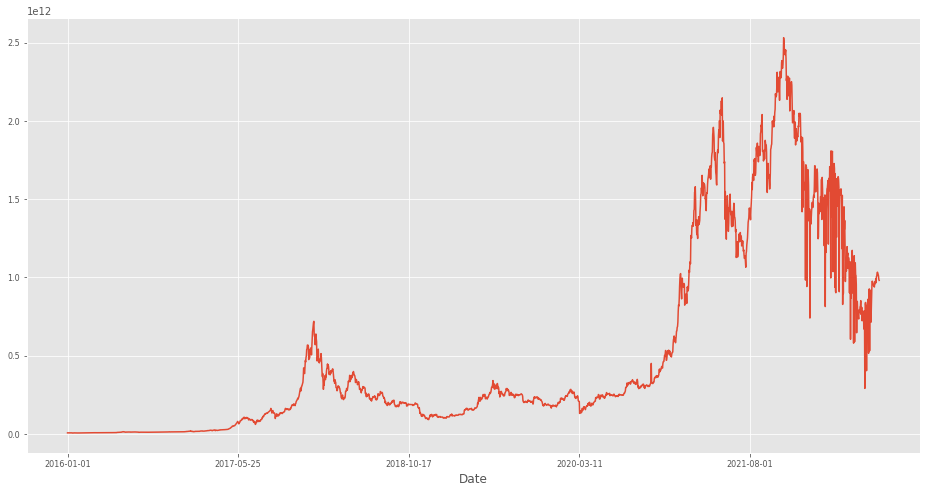

In [9]:
# How is the Market cap changing
df1.groupby("Date")["Market Cap"].sum().plot(figsize=(16, 8), fontsize=8, y ="MArket Cap" )


In [ ]:
# The graph shows a downward spike in March 2020 which was trigger the global lock down. 
# It also suggest the the downard spike triggered another phace of  increasing investments in crypto
# Also within this period, the circulating supply  doubled four fold from about 2.5 to10 units

In [19]:

#How is the Market Cap changing
dfs = df1
#dfs =dfs.iloc[:, 1:]



dfsn = dfs.groupby("Date").sum().sort_values(by ="Date", ascending =False).iloc[15:,:]
dfsn

Market Cap         Price  Circulating Suppy   Volume(24h)  \
Date                                                                      
2022-08-03  9.420779e+11  47743.132232       4.913004e+13  1.146451e+11   
2022-08-02  9.437600e+11  47992.062572       4.913002e+13  1.304753e+11   
2022-08-01  9.522561e+11  48628.466982       4.912991e+13  1.182279e+11   
2022-07-31  9.591403e+11  48779.451222       4.913009e+13  1.159888e+11   
2022-07-30  9.692953e+11  49424.660992       4.912978e+13  1.283923e+11   
...                  ...           ...                ...           ...   
2016-01-05  7.038960e+09   1068.920000       3.247100e+11  3.764793e+07   
2016-01-04  7.052694e+09   1135.550000       3.247526e+11  4.304234e+07   
2016-01-03  7.005322e+09   1116.740000       3.235213e+11  4.334402e+07   
2016-01-02  7.057446e+09   1152.450000       3.238587e+11  3.490173e+07   
2016-01-01  7.066735e+09   1062.840000       3.238263e+11  4.039011e+07   

                %h  %7d  %24hSymbol    %24h  
Date                                         
2022-08-03    -4.0  0.0         0.0     8.4  
2022-08-02   -15.4  0.0         0.0   -27.4  
2022-08-01     7.2  0.0         0.0    -9.8  
2022-07-31    -3.2  0.0         0.0   -23.7  
2022-07-30    -4.6  0.0         0.0    -3.8  
...            ...  ...         ...     ...  
2016-01-05  2061.0  0.0         0.0  3404.0  
2016-01-04   136.0  0.0         0.0  -691.0  
2016-01-03   867.0  0.0         0.0 -1330.0  
2016-01-02  -991.0  0.0         0.0  -348.0  
2016-01-01   127.0  0.0         0.0  3829.0  

[2365 rows x 8 columns]

In [72]:
# Import the data set VIX(Volatility Index of Stock Market), and compare it with the volatility of the cryptos
# We will merge this file with the prices of various cryptos and get the correlations to see of the prices are driven by external factors.
vix = pd.read_csv("~/Downloads/VIXCLS.csv", index_col="DATE")

vix=vix.sort_values(by="DATE", ascending=False)

lst =[]
#Remove NA
for i in range(len(vix["VIXCLS"])):
    if vix['VIXCLS'][i] ==".":
        lst.append(0)
    else:
        lst.append(float(vix['VIXCLS'][i]))
lst
vix["VIX"]= lst
new1 = pd.DataFrame(dfsn["Market Cap"].head(1305))
new1["Price"] = dfsn["Price"].head(1305)
new1["Volume"] = dfsn["Volume(24h)"].head(1305)
new1["VIX"]= lst
new1



Market Cap         Price        Volume    VIX
Date                                                       
2022-08-03  9.420779e+11  47743.132232  1.146451e+11  21.95
2022-08-02  9.437600e+11  47992.062572  1.304753e+11  23.93
2022-08-01  9.522561e+11  48628.466982  1.182279e+11  22.84
2022-07-31  9.591403e+11  48779.451222  1.159888e+11  21.33
2022-07-30  9.692953e+11  49424.660992  1.283923e+11  22.33
...                  ...           ...           ...    ...
2018-12-21  1.155329e+11   4712.060000  2.136833e+10  11.11
2018-12-20  1.218245e+11   5018.540000  2.530065e+10  10.96
2018-12-19  1.091316e+11   4401.380000  1.909865e+10   9.93
2018-12-18  1.077784e+11   4411.340000  1.650867e+10  10.03
2018-12-17  1.025505e+11   4217.660000  1.459082e+10  10.44

[1305 rows x 4 columns]

In [23]:
#There is a positve correlation between the Market Price fluctions and the volatility of the stock maket
new1.corr()

Market Cap     Price    Volume       VIX
Market Cap    1.000000  0.946952 -0.010989  0.249504
Price         0.946952  1.000000 -0.003593  0.320875
Volume       -0.010989 -0.003593  1.000000  0.155581
VIX           0.249504  0.320875  0.155581  1.000000

In [37]:
#Detect outliers using the golden ration 1.618 * std as benchmark
#We are assume that cryptos that have more frequent outliers are more volatile and riskier both in terms of lossing money and possible failure of the crypto

#To answer the question of volatility we look at the outliers of the 10 days moving averages. 
#We assume that a number is an outliers if in absolute value it is greater that the 1.618(So called Golden ratio) of the standard deviation.

def outliers(series):
        series = list(series)
        arr2 = []
        
        for i in list(range(len(series)-10)):
            arr =[]
         
            
            for j in range(i, i+10):
                arr.append(series[j])
                #print(arr)
            if (series[i]-np.mean(arr))> 1.618*np.std(arr) :
                arr2.append((series[i]-np.mean(arr)))
            if (series[i]-np.mean(arr))< -1.618*np.std(arr) :
                arr2.append((series[i]-np.mean(arr)))
            else:
                arr2.append(0)
            
        return list(arr2+[0,0,0,0,0,0,0,0,0])

                
                
                
l = [4,7,8,6,9,6,12,8,9,9,10,7,7,6,7,8,9,8,8,8,8,8,8,8,8,8 -67,7,9,9,7]   
#outliers(l) 
  

In [28]:
#This function counts the positive and negative outliers and find their ratios.
def nonzero(list):
    count=0
    minus=0
    for i in list:
        if i > 0:
            count +=1
        if i<0:
            minus +=1
    return round(100*count/len(list),2),      round(100* minus/len(list), 2),    round((round(100* minus/len(list), 2))/ (round(100*count/len(list),2)+0.001),2)
nonzero(outliers(l))

(6.45, 9.68, 1.5)

In [29]:
symbols3 =set(df1["Symbol"].unique())
symbols3
# Plot the graphs of different crypto parameters

import plotly.express as px
for ele in list(symbols3)[40:]:     
    de =dfs.groupby("Symbol").get_group("{}".format(ele))
    de.index =de.Date

    if len(de)>1200:
        
        de =de.head(1200)
        fig = px.line(de, x=de.index, y='Price', title='Time Series for Market Cap of {}'.format(ele))

        fig.update_xaxes(rangeslider_visible=True)
        fig.show()

In [30]:
df1 =dfs
df1.groupby(["Date"])["Market Cap"].sum()[df1.groupby(["Date"])["Market Cap"].sum() ==df1.groupby(["Date"])["Market Cap"].sum().max()]








Date
2021-11-08    2.531757e+12
Name: Market Cap, dtype: float64

How is the market dominance changed?

In [31]:
df1.groupby(["Date"])["Market Cap"].sum().tail(5)







Date
2022-08-14    1.027755e+12
2022-08-15    1.017444e+12
2022-08-16    1.009926e+12
2022-08-17    9.873063e+11
2022-08-18    9.812977e+11
Name: Market Cap, dtype: float64

In [32]:
marketcap =df1.iloc[:20, 1:3].sort_values(by="Market Cap", ascending=False)

marketcap["Ratio %"] = marketcap["Market Cap"]*100/marketcap["Market Cap"].sum()

marketcap["Market Cap"].head().sum()
# As at August 18, 2022, Bitcoin and Etherum  remains the dominant crypto asset with a market dominace of about 60% 
# This  translates to over $840b out of over $1tr total. capiatalistion


837818071361.79

In [33]:
# Get the unique symbols sorted out
symbol2= list(set(dfo["Symbol"]))
symbol2

['DOGE',
 'LTC',
 'BUSD',
 'DAI',
 'USDC',
 'UNI',
 'SOL',
 'SHIB',
 'TRX',
 'LEO',
 'ETH',
 'USDT',
 'XRP',
 'FTT',
 'ADA',
 'AVAX',
 'ETC',
 'DOT',
 'MATIC',
 'BTC',
 'WBTC',
 'BNB']

In [34]:
newarr = []

for ele in symbol2:
    dfoo = dfo.groupby(["Symbol"]).get_group("{}".format(ele))
    # For each unique crypto, create a new column called Year from dates
    
    dfoo["Year"]=list(map(lambda x: int(x[:4]), dfoo["Date"]))
    # Change the index as the date
    dfoo.index =dfoo["Date"]
    #Slice the DataFrame to exclude the Date and avoid ambiguity
    dfoo = dfoo.iloc[:, 1:]
    #Get the maximum for each year
    dfoonew =dfoo.groupby(["Year"]).max()[["High"]]
    #Get the manimum for each year
    dfoonew["Low"]= dfoo.groupby(["Year"]).min()[["Low"]]
    #Get the latest prices for each year
    dfoonew["Present"] = list(dfoo.groupby(["Year"])[["High"]].head(1)["High"])[::-1]
    #Create a new column for the percentage changes
    
    dfoonew['% Change'] = list(map(lambda x,y: round(100*(x/(y+0.001)),1), dfoonew["High"], dfoonew["Low"]))
    #Create a column for the percentage of present value of the crpto
    dfoonew["% of Present Value"] = list(map(lambda x,y: round(100*(y/(x+0.001)),1), dfoonew["High"], dfoonew["Present"]))
    #Get the Round of the geometric mean of the percentage changes
    newarr.append(round((dfoonew["% Change"].product())**(1/len(dfoonew))))
    
    print("Annual Geometric Mean of {} = ".format(ele), round((dfoonew["% Change"].product())**(1/len(dfoonew))),)
    #Plot the graphs
    #dfoonew["% Change"].plot.bar(figsize=(16, 8), fontsize=8)
    #plt.title('Annual % Change of {}'.format(ele))
    #plt.xlabel('Years')
    #plt.ylabel('Change')
    #plt.show()

Annual Geometric Mean of DOGE =  637
Annual Geometric Mean of LTC =  742
Annual Geometric Mean of BUSD =  110
Annual Geometric Mean of DAI =  149
Annual Geometric Mean of USDC =  128
Annual Geometric Mean of UNI =  219
Annual Geometric Mean of SOL =  2266
Annual Geometric Mean of SHIB =  0
Annual Geometric Mean of TRX =  725
Annual Geometric Mean of LEO =  235
Annual Geometric Mean of ETH =  591
Annual Geometric Mean of USDT =  112
Annual Geometric Mean of XRP =  698
Annual Geometric Mean of FTT =  438
Annual Geometric Mean of ADA =  1242
Annual Geometric Mean of AVAX =  1187
Annual Geometric Mean of ETC =  643
Annual Geometric Mean of DOT =  513
Annual Geometric Mean of MATIC =  1553
Annual Geometric Mean of BTC =  466
Annual Geometric Mean of WBTC =  602
Annual Geometric Mean of BNB =  688


/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/3782098286.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/3782098286.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/3782098286.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [35]:
#geomean = pd.DataFrame(zip(symbol2,newarr))
#geomean
# In a typical year, one make 43 percent maximum profit on an arbitrary crypto

pd.DataFrame(zip(symbol2,newarr))[1].mean()


633.8181818181819

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Month Geometric Mean of DOGE =  41


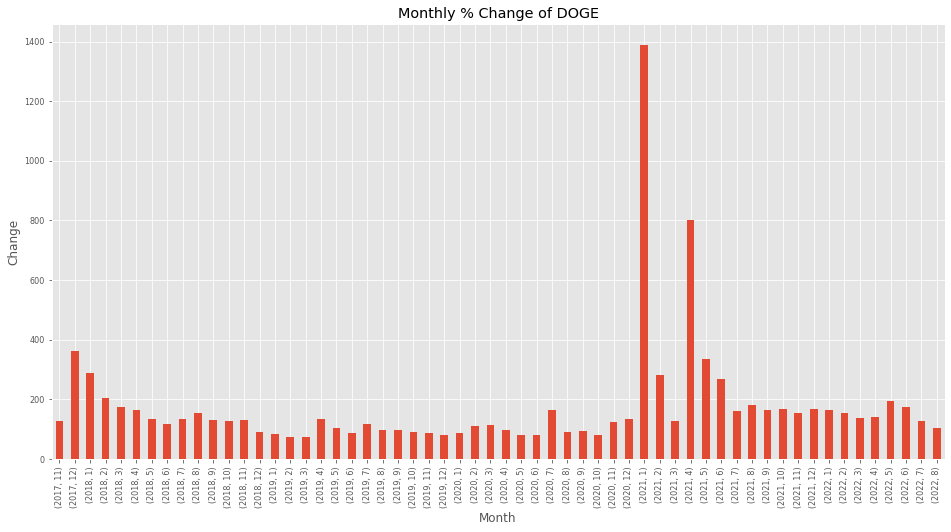

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Month Geometric Mean of LTC =  59


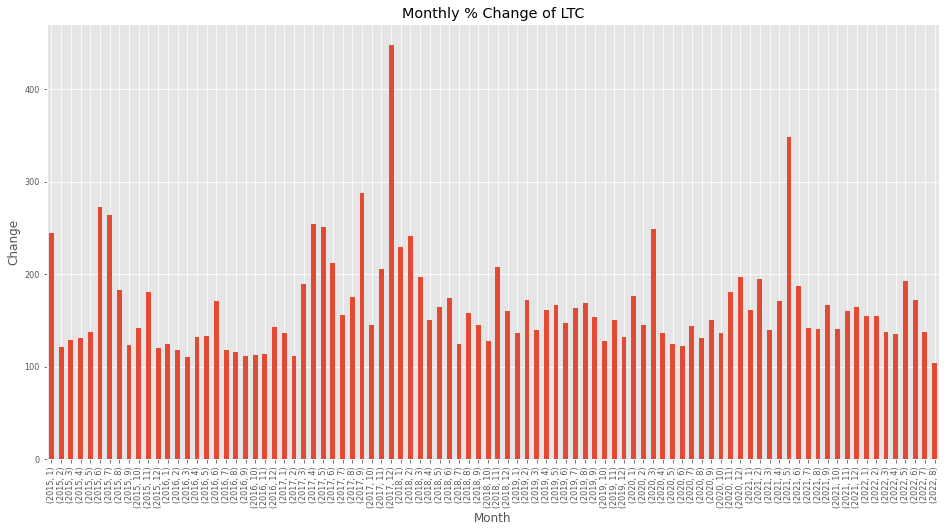

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Month Geometric Mean of BUSD =  3


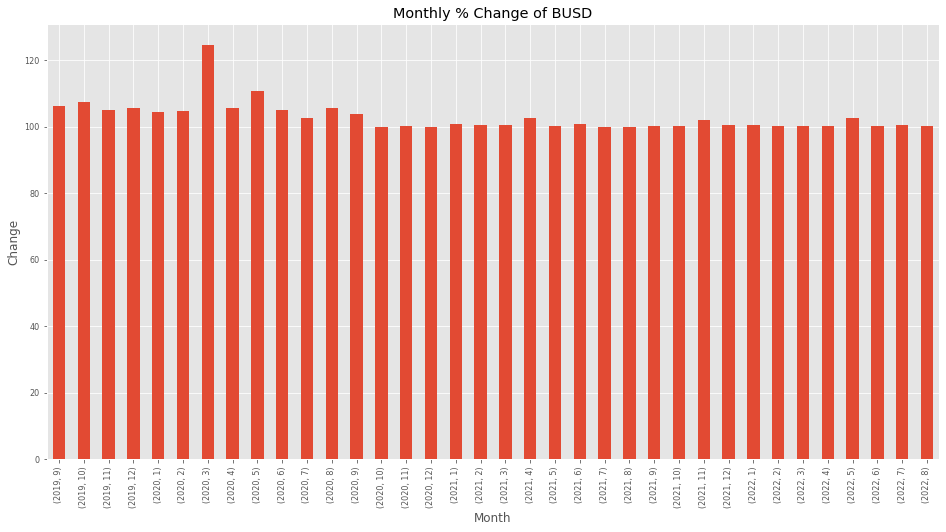

Month Geometric Mean of DAI =  8


/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



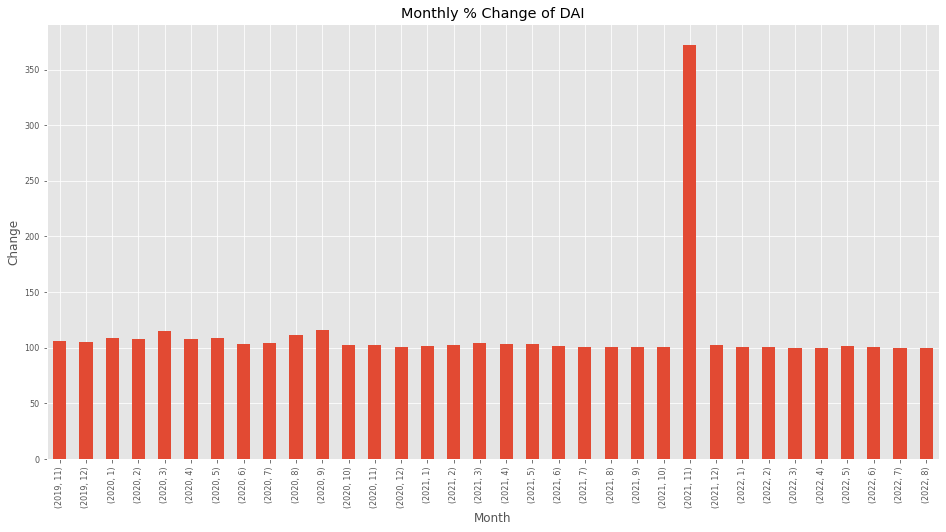

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Month Geometric Mean of USDC =  5


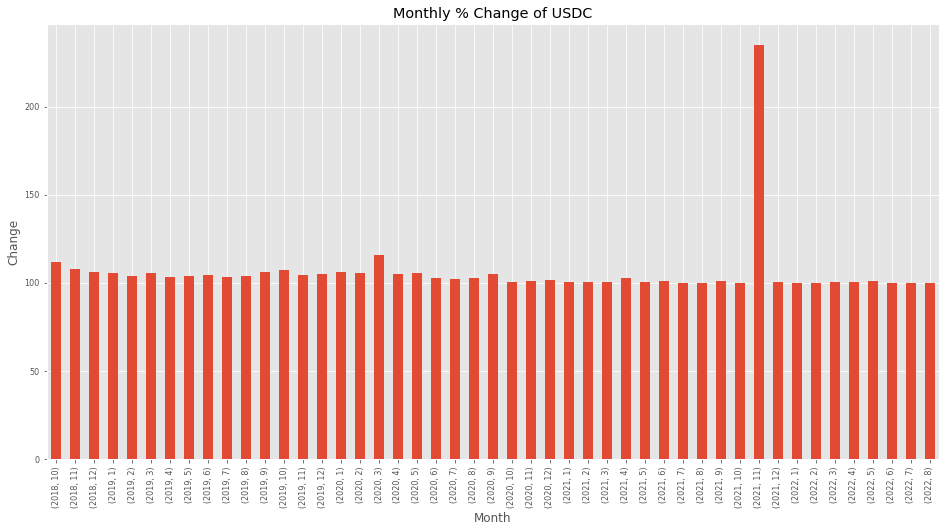

Month Geometric Mean of UNI =  -43


/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



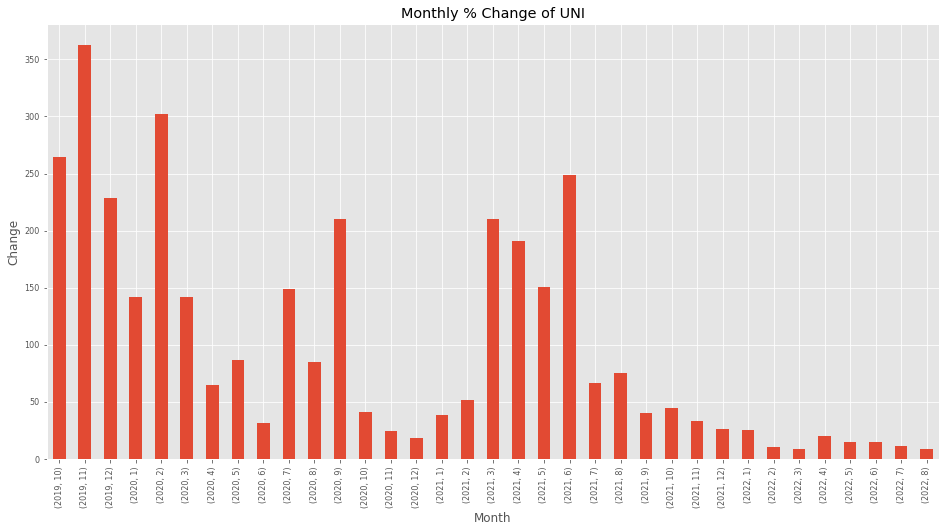

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Month Geometric Mean of SOL =  110


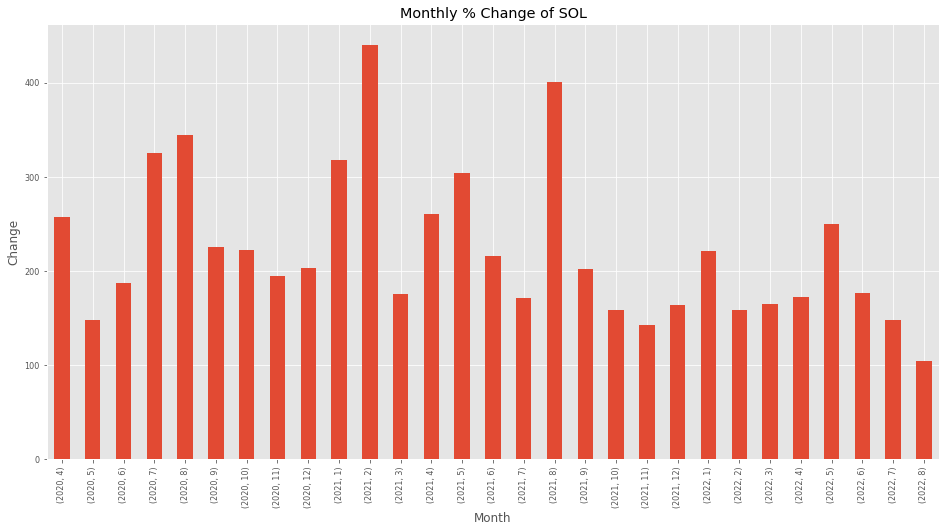

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Month Geometric Mean of SHIB =  -100


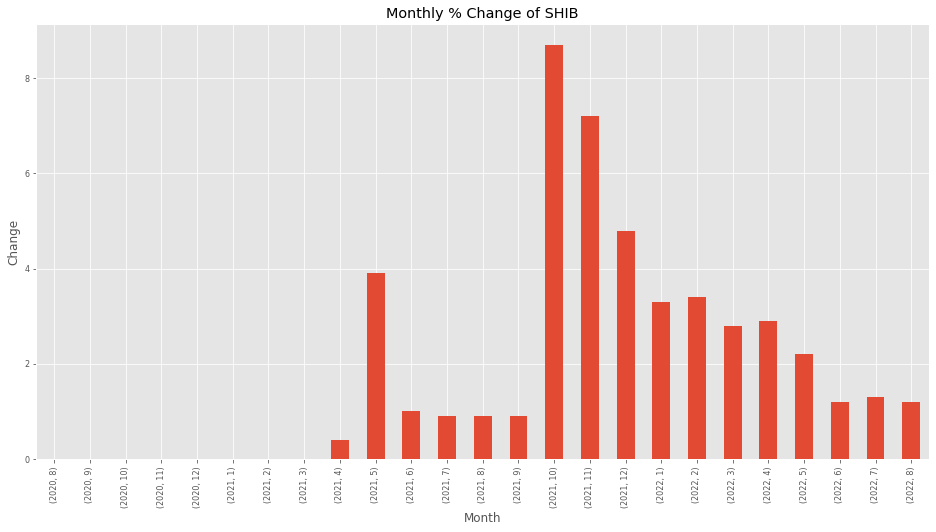

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Month Geometric Mean of TRX =  65


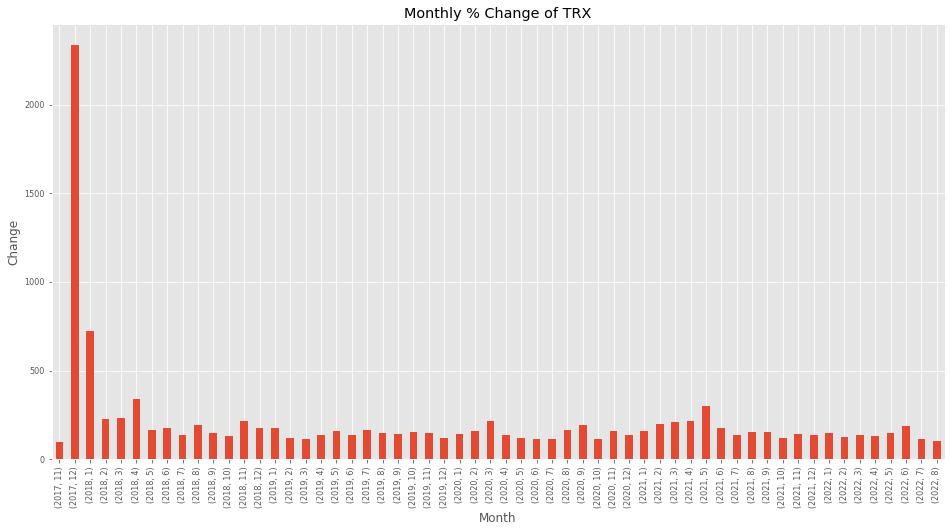

Month Geometric Mean of LEO =  24


/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



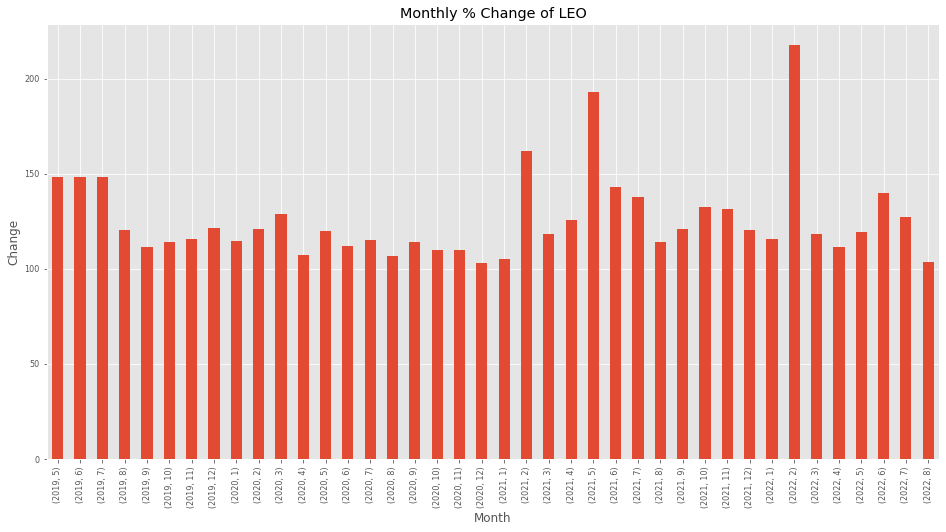

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Month Geometric Mean of ETH =  58


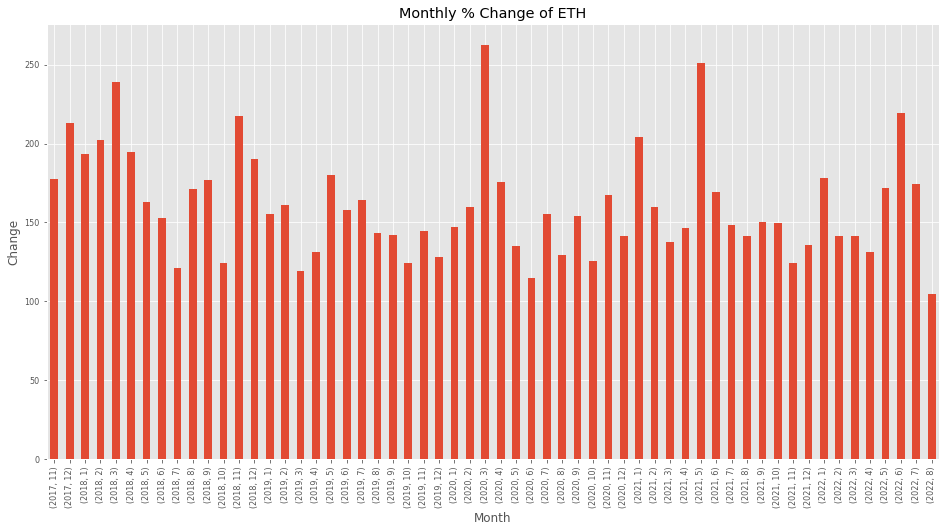

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Month Geometric Mean of USDT =  4


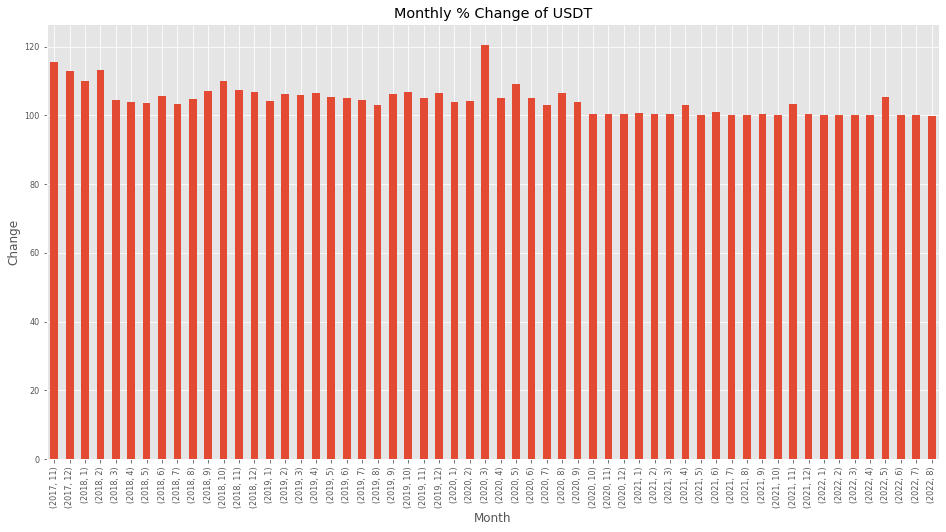

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Month Geometric Mean of XRP =  70


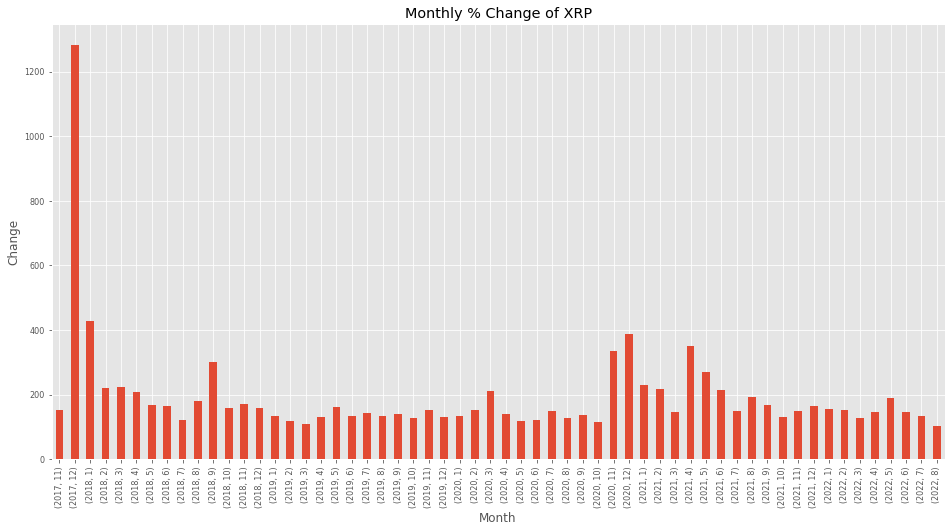

Month Geometric Mean of FTT =  48


/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



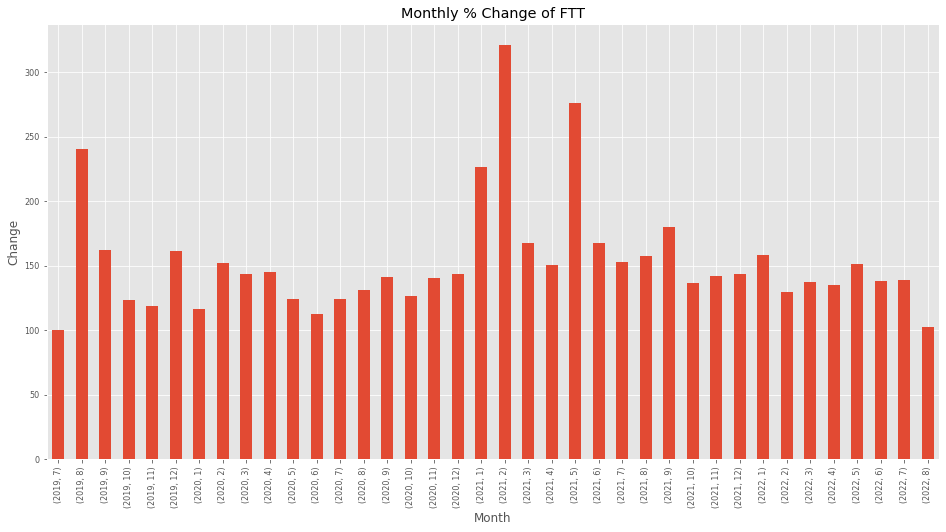

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Month Geometric Mean of ADA =  80


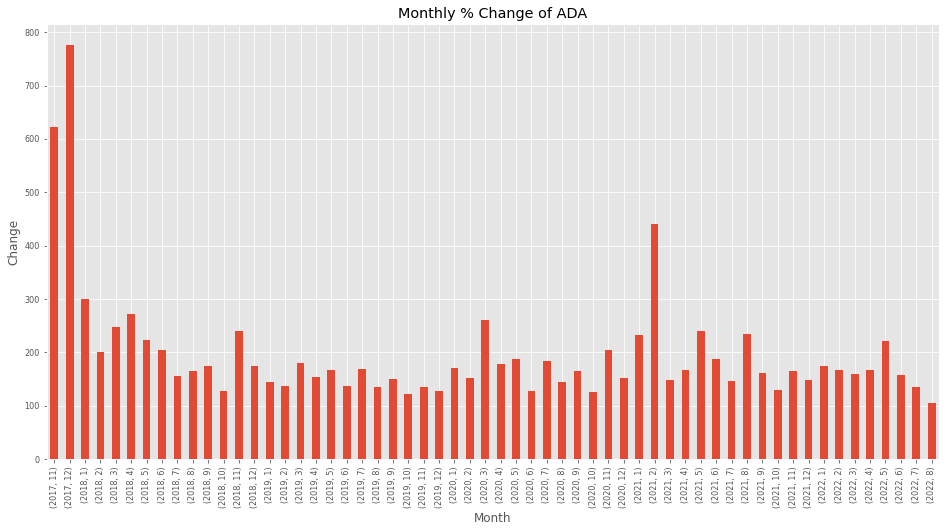

Month Geometric Mean of AVAX =  107


/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



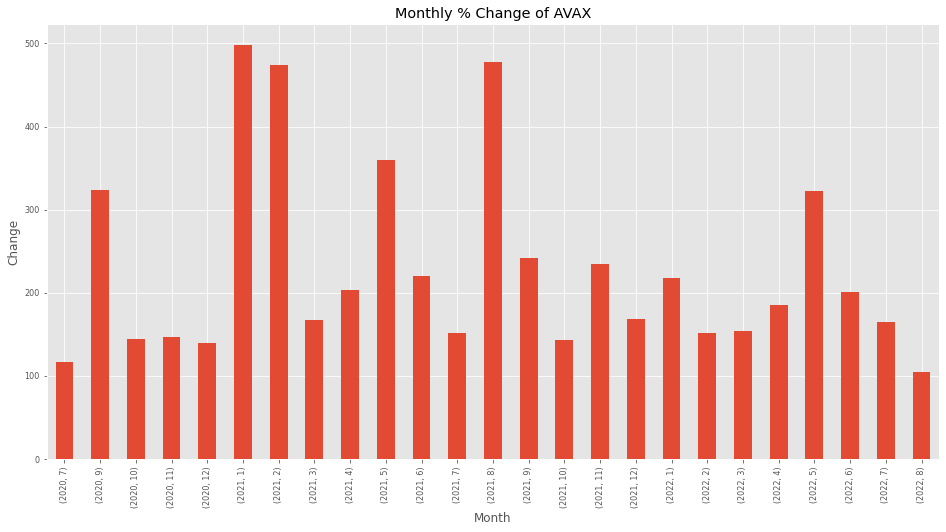

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Month Geometric Mean of ETC =  73


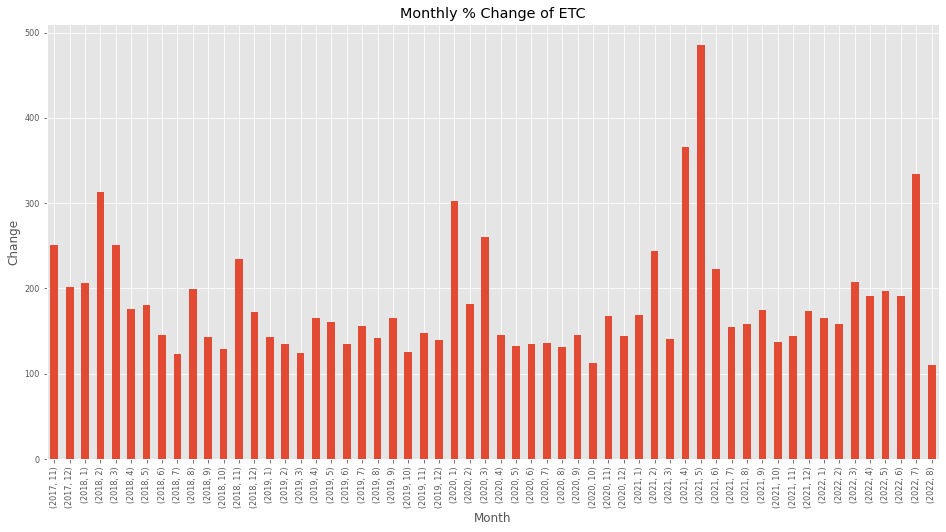

Month Geometric Mean of DOT =  83


/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



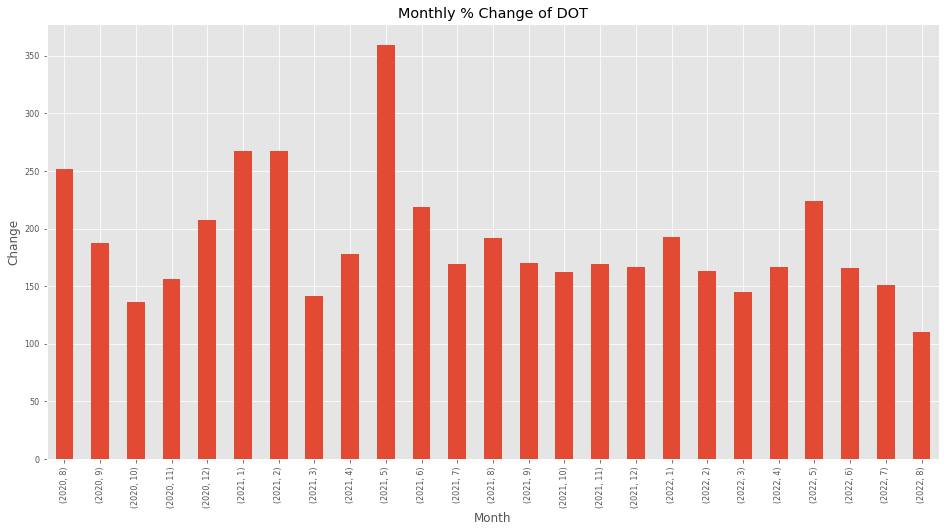

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Month Geometric Mean of MATIC =  95


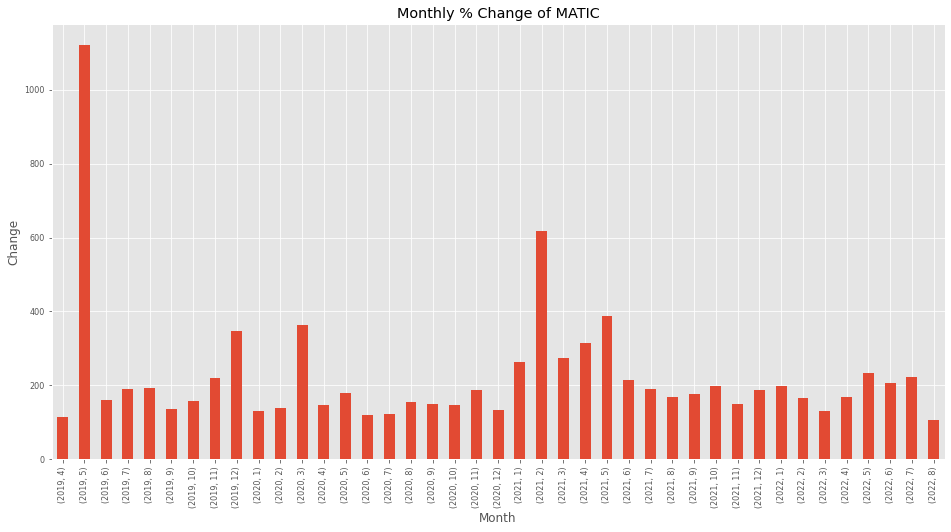

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Month Geometric Mean of BTC =  40


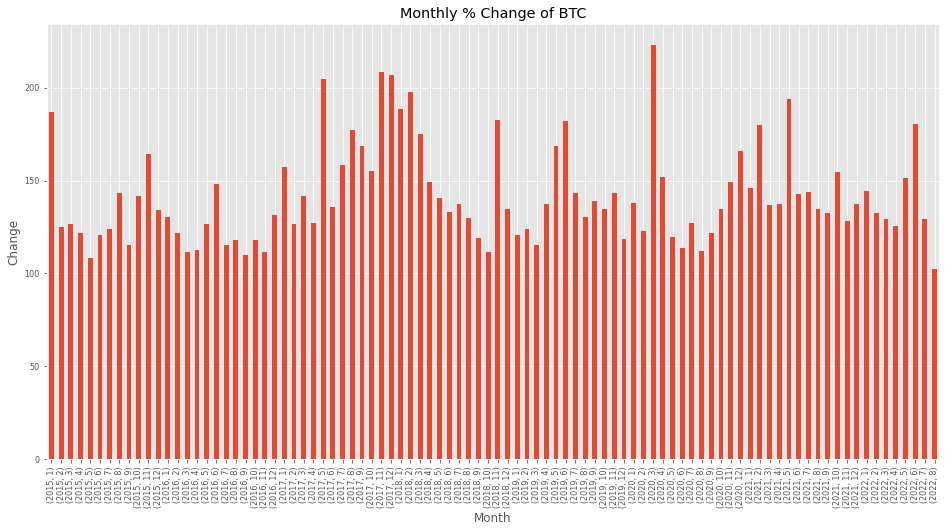

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Month Geometric Mean of WBTC =  48


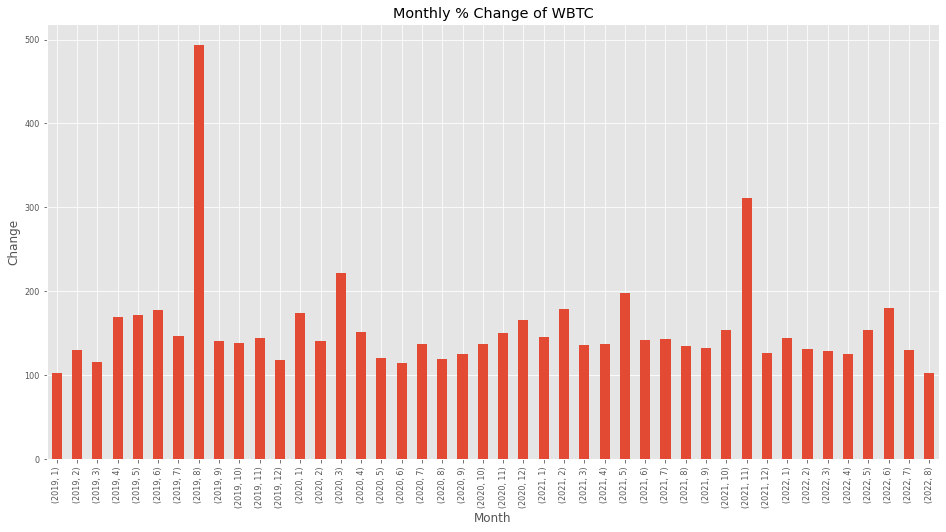

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_868/336756581.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Month Geometric Mean of BNB =  63


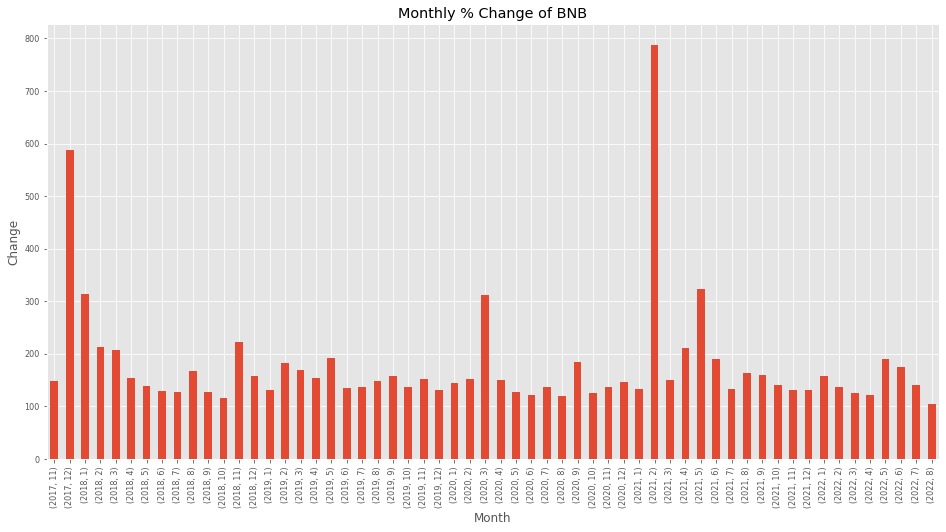

In [36]:
newarr = []

for ele in symbol2:
    dfoo = dfo.groupby(["Symbol"]).get_group("{}".format(ele))
    # For each unique crypto, create a new column called Year from dates
    
    dfoo["Year"]=list(map(lambda x: int(x[:4]), dfoo["Date"]))
    dfoo["Month"]=list(map(lambda x: int(x[5:7]), dfoo["Date"]))
    # Change the index as the date
    dfoo.index =dfoo["Date"]
    #Slice the DataFrame to exclude the Date and avoid ambiguity
    dfoo = dfoo.iloc[:, 1:]
    #Get the maximum for each year
    dfoonew =dfoo.groupby(["Year", "Month"]).max()[["High"]]
    #Get the manimum for each year
    dfoonew["Low"]= dfoo.groupby(["Year", "Month"]).min()[["Low"]]
    #Get the latest prices for each year
    dfoonew["Present"] = list(dfoo.groupby(["Year", "Month"])[["High"]].head(1)["High"])[::-1]
    #Create a new column for the percentage changes
    
    dfoonew['% Change'] = list(map(lambda x,y: round(100*(x/(y+0.001)),1), dfoonew["High"], dfoonew["Low"]))
    #Create a column for the percentage of present value of the crpto
    dfoonew["% of Present Value"] = list(map(lambda x,y: round(100*(y/(x+0.001)),1), dfoonew["High"], dfoonew["Present"]))
    #Get the Round of the geometric mean of the percentage changes
    newarr.append(round((dfoonew["% Change"].product())**(1/len(dfoonew))))
    
    print("Month Geometric Mean of {} = ".format(ele), -100+round((dfoonew["% Change"].product())**(1/len(dfoonew))),)
    #Plot the graphs
    dfoonew["% Change"].plot.bar(figsize=(16, 8), fontsize=8)
    plt.title('Monthly % Change of {}'.format(ele))
    plt.xlabel('Month')
    plt.ylabel('Change')
    plt.show()

In [ ]:
#datasetsample = df1.groupby("Symbol").get_group("BTC")
#datasetsample["Price"]

In [38]:
#Merge the two dataframes

df2= df.merge(df1, how='inner', on=['Date','Symbol'])
df2.index = df2["Date"]
df2=df2.iloc[:,4:]
df2=df2.drop(columns="Volume(24h)")
df2=df2.drop(columns="Close")
df2=df2.drop(columns="Name")

In [ ]:
#df2.columns

In [39]:
df2.groupby(["Date", "Symbol"])

dataset=df2
dataset

Volume   Adj Close Symbol       nVolume         nHigh  \
Date                                                                      
2022-08-01  5.353469e+10    1.000182   USDT  6.430434e-04  6.167801e-06   
2022-08-01  1.185493e+09   41.150829    SOL  1.423981e-05  2.656680e-04   
2022-08-01  4.000000e+00    0.000092    UNI  4.804685e-14  5.785234e-10   
2022-08-01  8.430939e+08    0.999395    DAI  1.012700e-05  6.166356e-06   
2022-08-01  7.862051e+08    8.142303    DOT  9.443670e-06  5.511653e-05   
...                  ...         ...    ...           ...           ...   
2016-01-03  3.963380e+07  430.010986    BTC  4.760698e-07  2.674318e-03   
2016-01-02  3.020260e+06    3.502160    LTC  3.627850e-08  2.174708e-05   
2016-01-02  3.009660e+07  433.437988    BTC  3.615117e-07  2.688617e-03   
2016-01-01  2.791170e+06    3.508980    LTC  3.352673e-08  2.177112e-05   
2016-01-01  3.627890e+07  434.334015    BTC  4.357717e-07  2.689751e-03   

                    nLow        nClose         nOpen  %Change_Per_Day  \
Date                                                                    
2022-08-01  1.504928e-05  1.480285e-05  1.480828e-05         0.011357   
2022-08-01  6.185474e-04  6.090389e-04  6.263615e-04         2.740983   
2022-08-01  1.380788e-09  1.358190e-09  1.380338e-09         1.579593   
2022-08-01  1.503087e-05  1.479121e-05  1.479252e-05        -0.016487   
2022-08-01  1.220054e-04  1.205074e-04  1.276388e-04         5.563255   
...                  ...           ...           ...              ...   
2016-01-03  6.390523e-03  6.364232e-03  6.418649e-03         0.822693   
2016-01-02  5.254675e-05  5.183254e-05  5.203988e-05         0.373226   
2016-01-02  6.498319e-03  6.414952e-03  6.434104e-03         0.272425   
2016-01-01  5.220157e-05  5.193347e-05  5.151049e-05        -0.846667   
2016-01-01  6.432790e-03  6.428214e-03  6.376354e-03        -0.838828   

            Market Cap_x  Market Cap_y   Price  Circulating Suppy    %h  %7d  \
Date                                                                           
2022-08-01  5.354442e+10  6.621146e+10    1.00       6.197978e+09   0.0  NaN   
2022-08-01  4.878404e+10  1.447988e+10   41.79       4.652054e+07   0.9  NaN   
2022-08-01  3.670744e-04  6.244499e+09    8.38       4.486546e+07   1.5  NaN   
2022-08-01  8.425841e+08  7.449419e+09    1.00       4.489162e+08   0.0  NaN   
2022-08-01  6.401520e+09  8.092257e+09    8.19       8.757932e+07  -0.4  NaN   
...                  ...           ...     ...                ...   ...  ...   
2016-01-03  1.704297e+10  6.467437e+09  430.01       1.504015e+07  32.0  NaN   
2016-01-02  1.057743e+07  1.536583e+08    3.50       4.387534e+07  -3.0  NaN   
2016-01-02  1.304501e+10  6.517388e+09  433.44       1.503650e+07 -10.0  NaN   
2016-01-01  9.794160e+06  1.539109e+08    3.51       4.386196e+07  -4.0  NaN   
2016-01-01  1.575716e+10  6.529296e+09  434.33       1.503290e+07  12.0  NaN   

            %24hSymbol  %24h      7d  
Date                                  
2022-08-01         NaN  -0.0     0.0  
2022-08-01         NaN  -1.4    13.8  
2022-08-01         NaN   0.1    18.2  
2022-08-01         NaN   0.1     0.0  
2022-08-01         NaN  -5.2    21.0  
...                ...   ...     ...  
2016-01-03         NaN -82.0   1.36%  
2016-01-02         NaN -36.0   2.46%  
2016-01-02         NaN -26.0   4.26%  
2016-01-01         NaN  84.0  -2.95%  
2016-01-01         NaN  79.0  -4.19%  

[20851 rows x 18 columns]

In [40]:
symbols=list(set(dataset["Symbol"]))
symbols

['DOGE',
 'LTC',
 'BUSD',
 'DAI',
 'USDC',
 'UNI',
 'SOL',
 'SHIB',
 'TRX',
 'LEO',
 'ETH',
 'USDT',
 'XRP',
 'FTT',
 'ADA',
 'AVAX',
 'ETC',
 'DOT',
 'MATIC',
 'BTC',
 'WBTC',
 'BNB']

In [ ]:
#btc = dataset[dataset.loc[:,"Symbol"]=="BTC"].sort_values(by="Date",ascending=False)
#btc


In [ ]:
How are the currencies correlated. Which cryptos have the highest corelation and which have the most negative.
For the prices we plot the graph below

In [84]:
new2 =new1

m= new2["Price"]
v = (new2["VIX"])

m  = pd.DataFrame(m)
v =pd.DataFrame(v)
vixm = pd.concat([m,v], axis = 1).head(1305)
vixm.corr()
#There is significant correlation of +0.321 between the volatility from external sources and the Price.

Price       VIX
Price  1.000000  0.320875
VIX    0.320875  1.000000

ADA




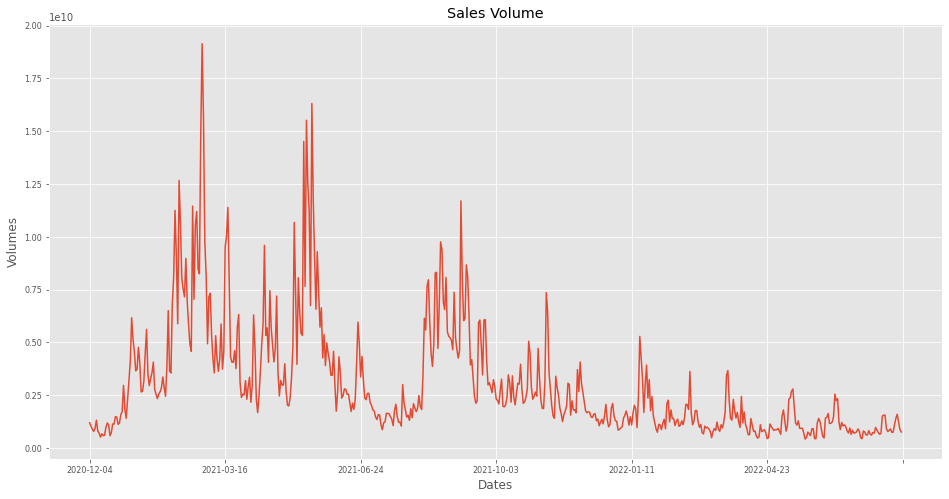

AVAX




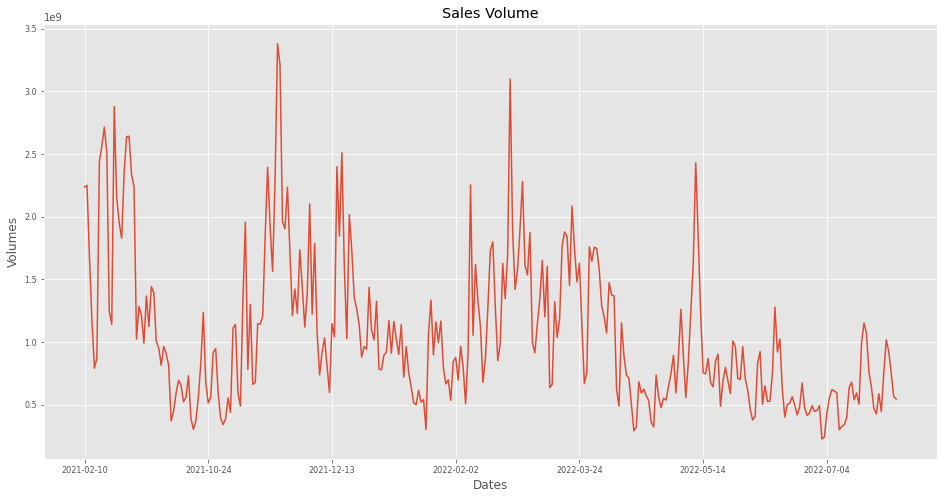

BNB




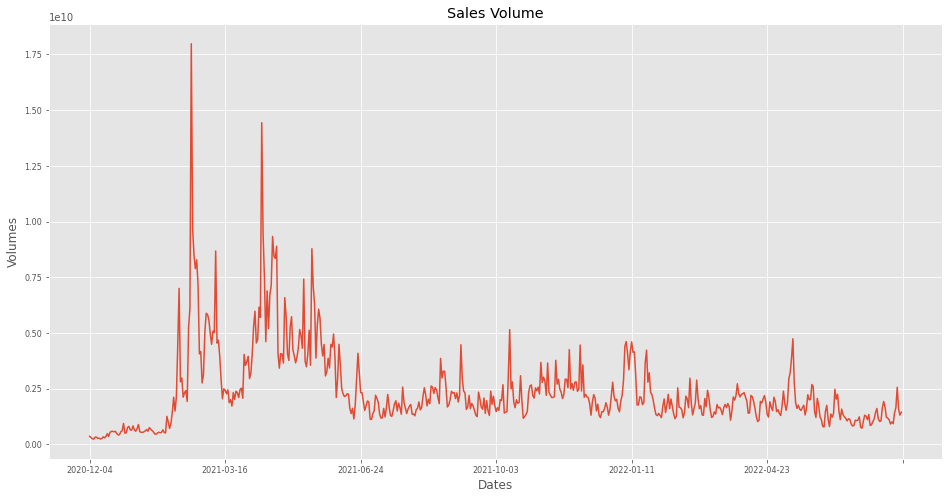

BTC




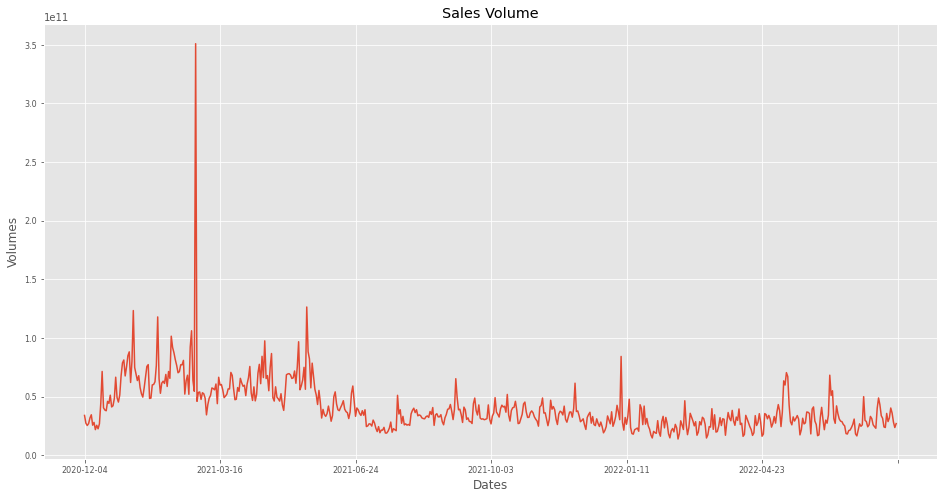

BUSD




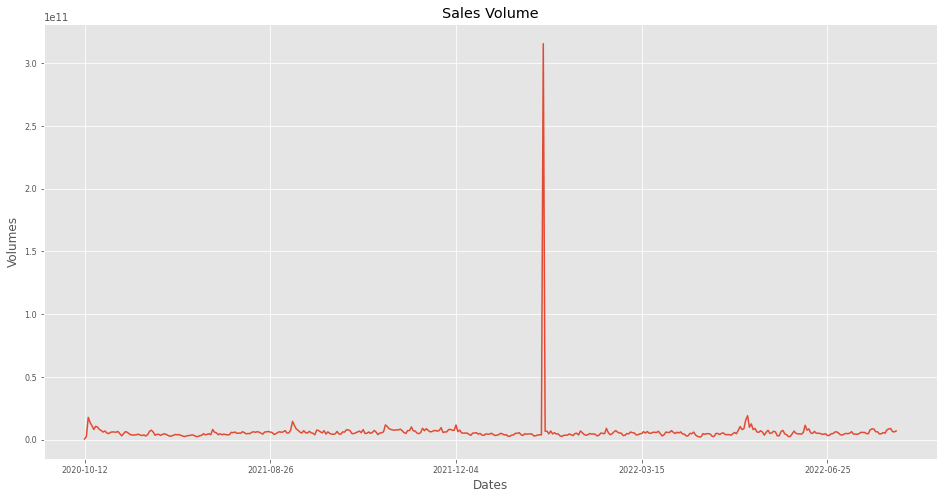

DAI




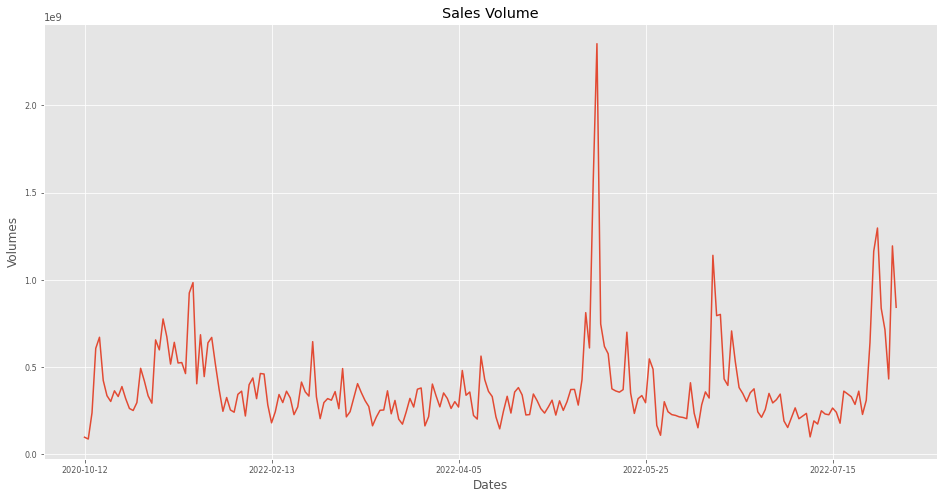

DOGE




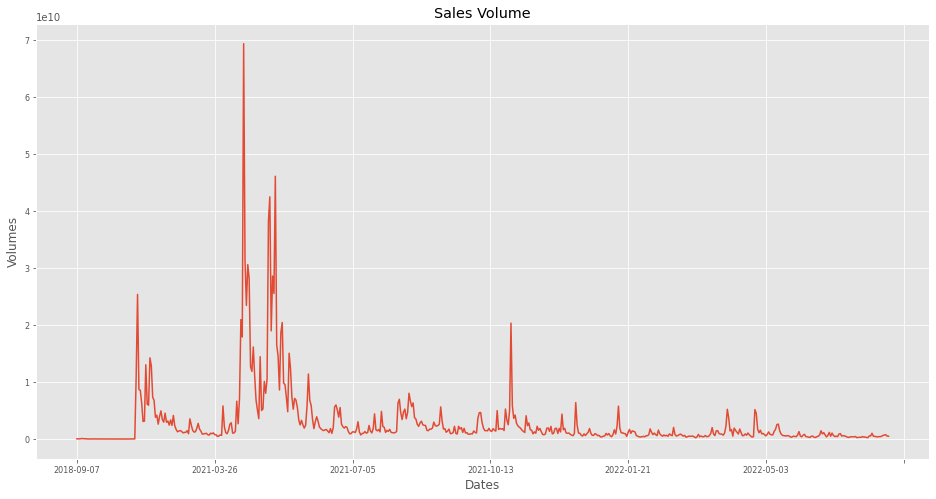

DOT




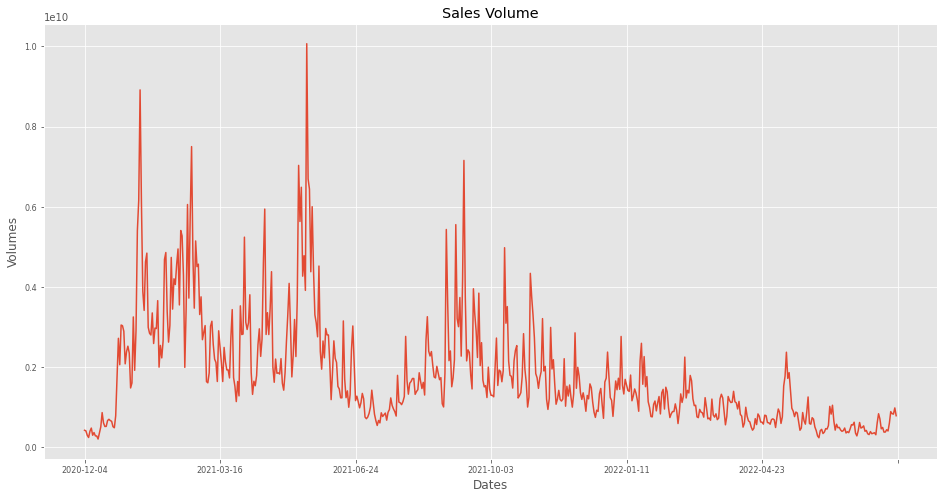

ETC




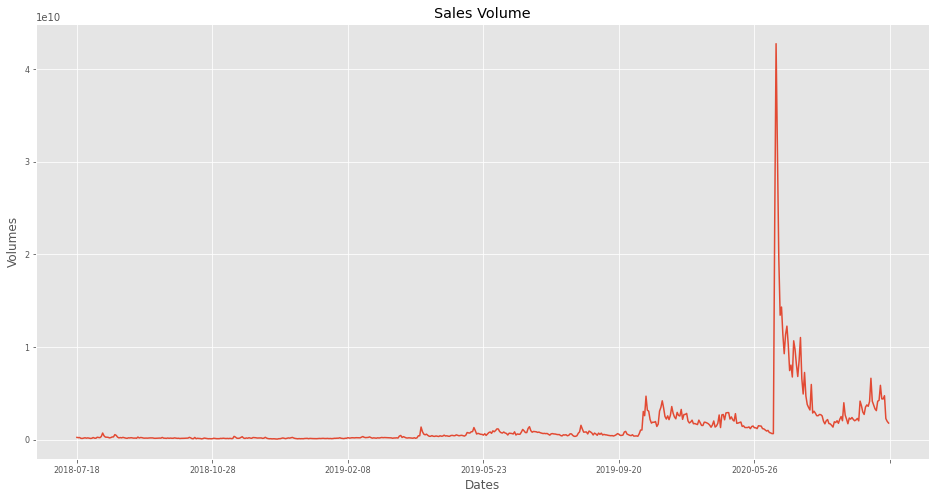

ETH




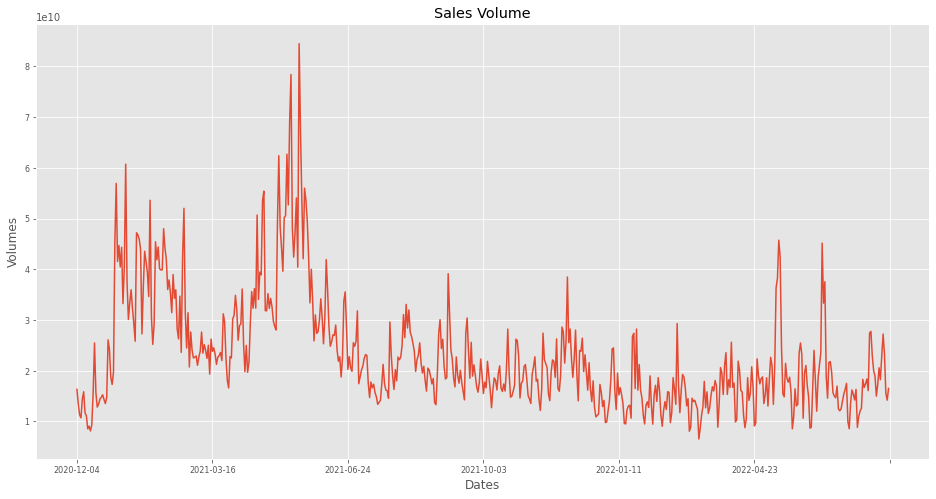

FTT




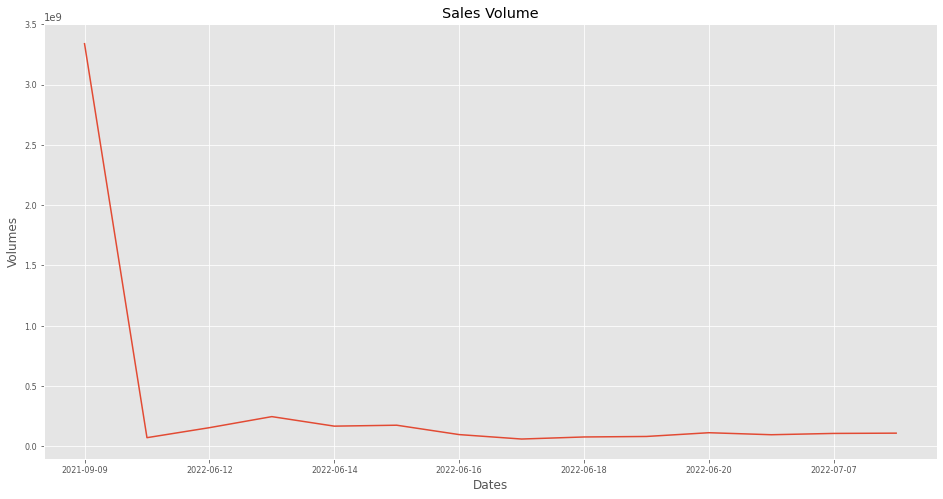

LEO




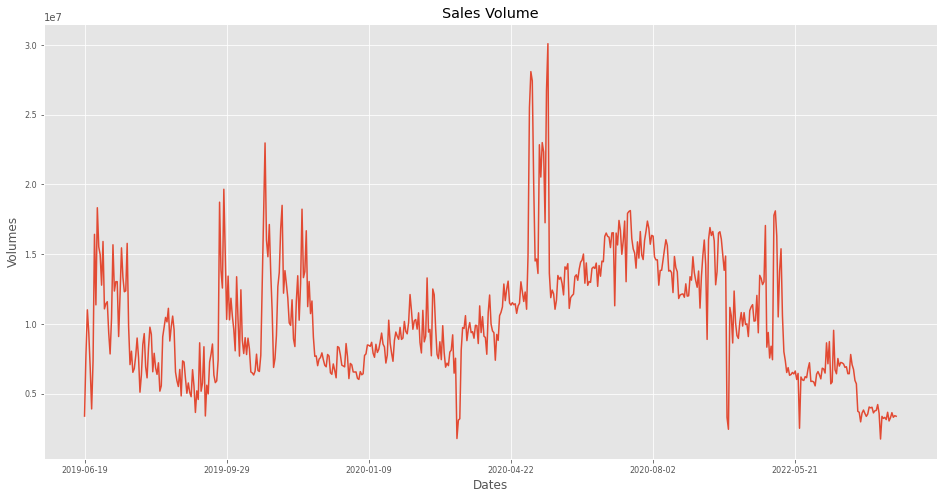

LTC




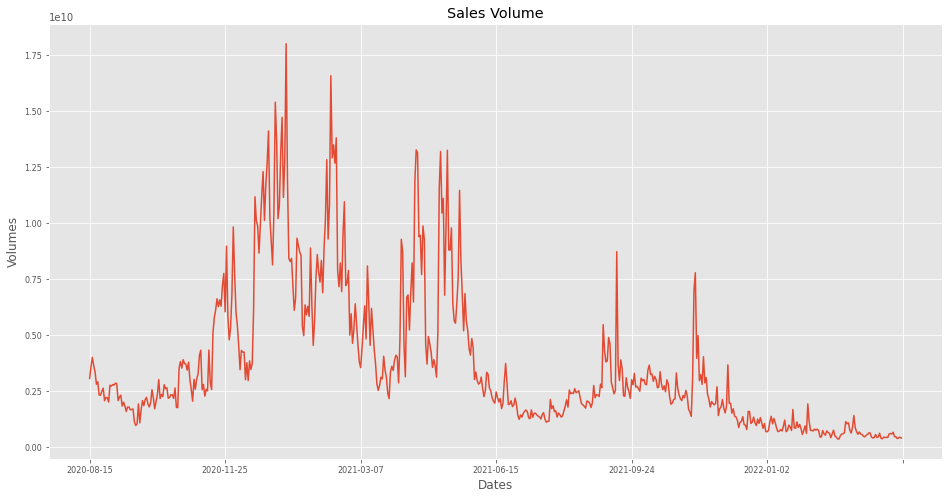

MATIC




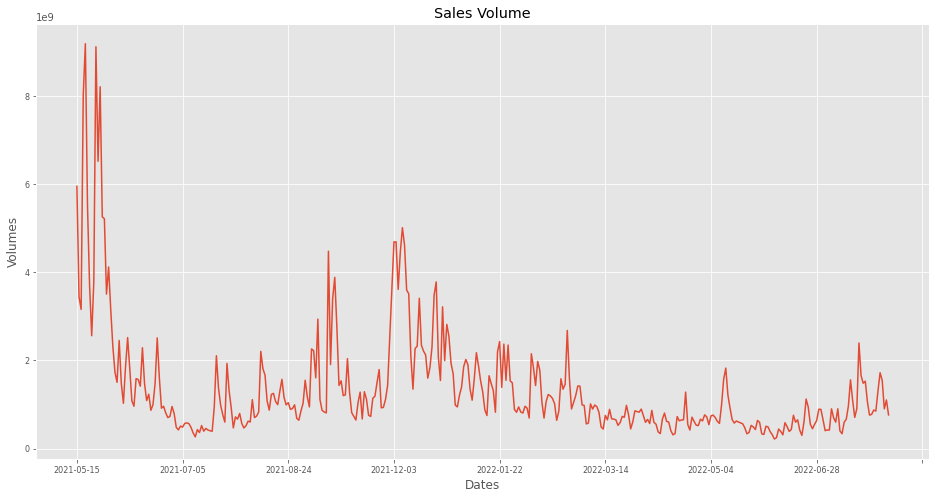

SHIB




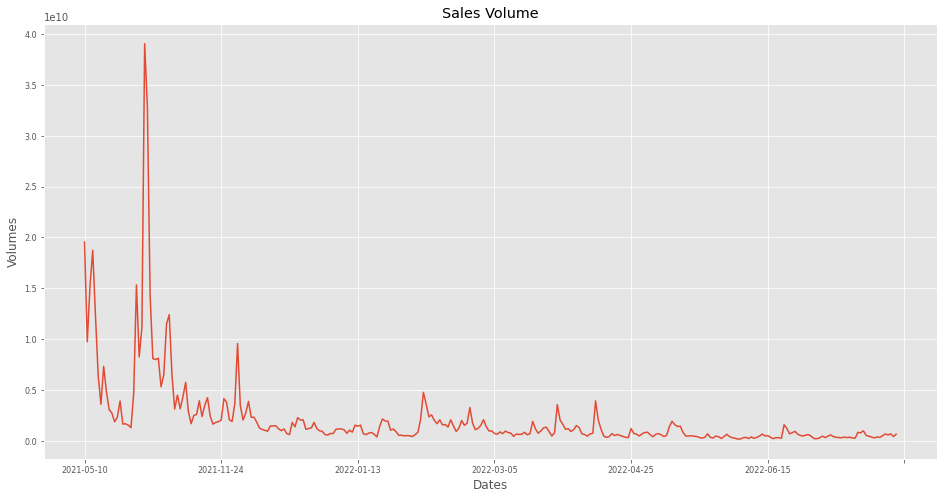

SOL




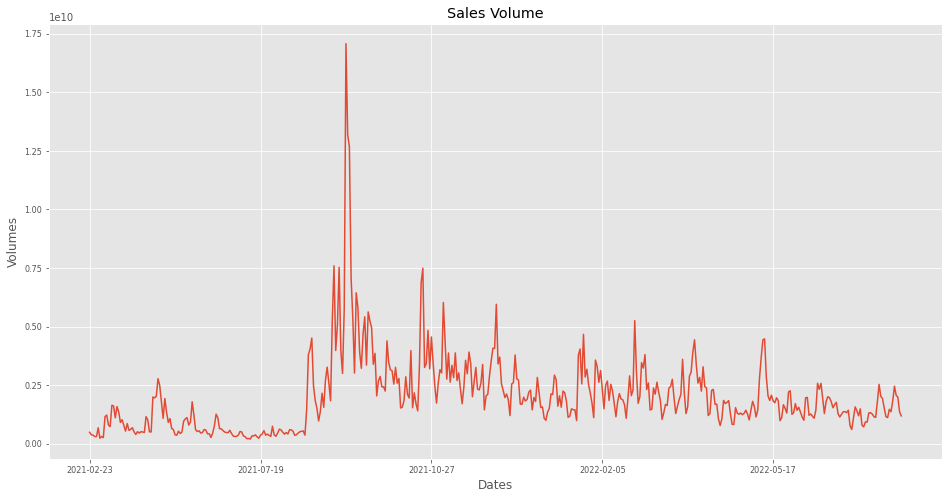

TRX




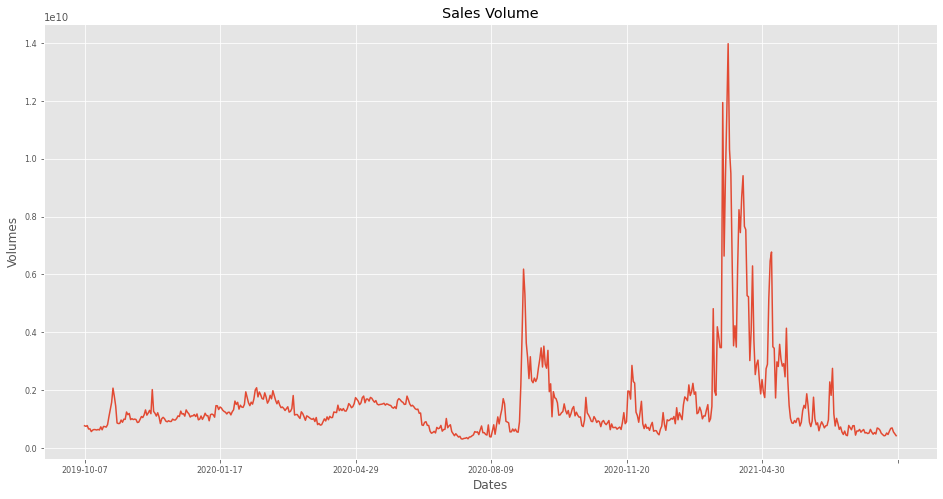

UNI




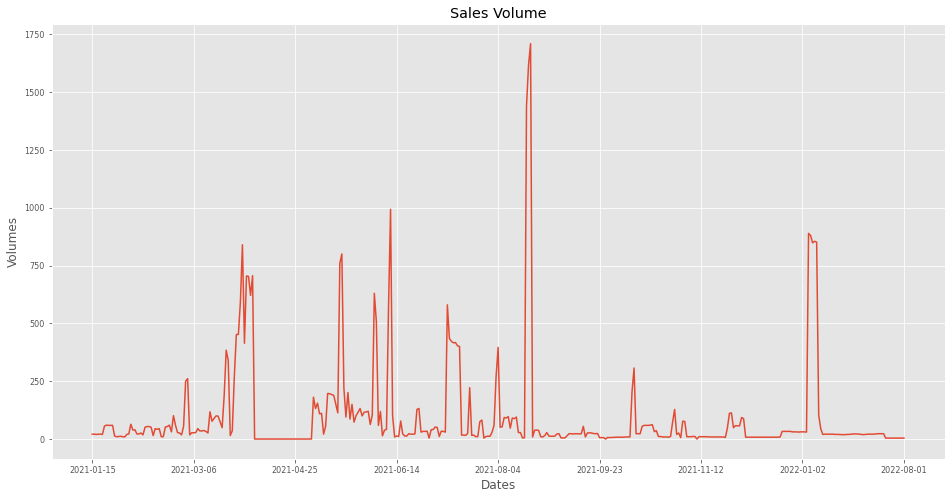

USDC




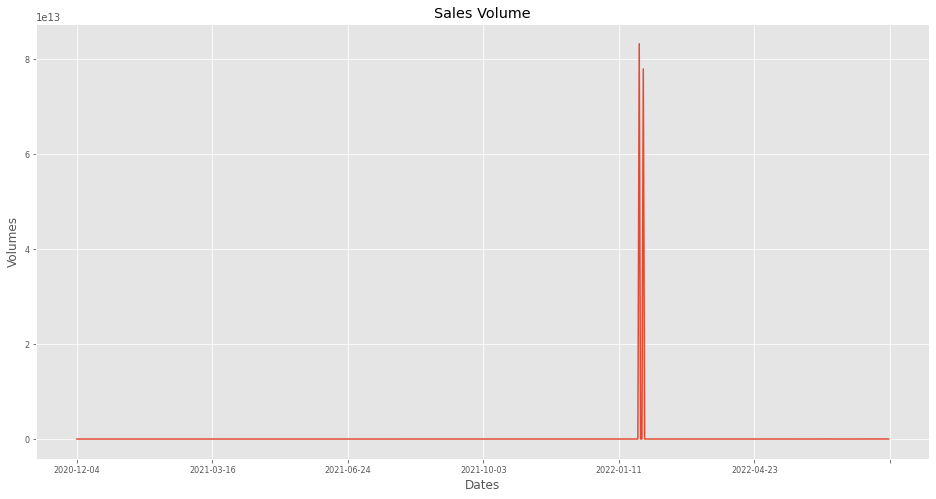

USDT




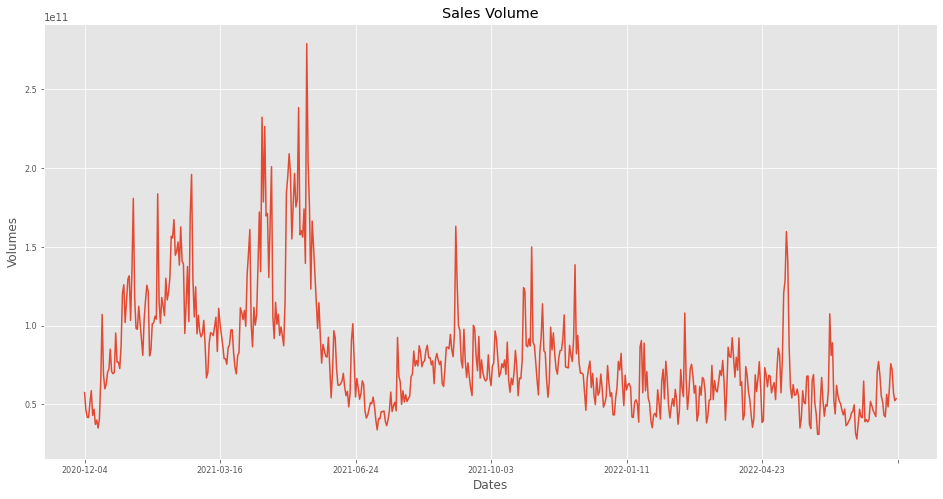

WBTC




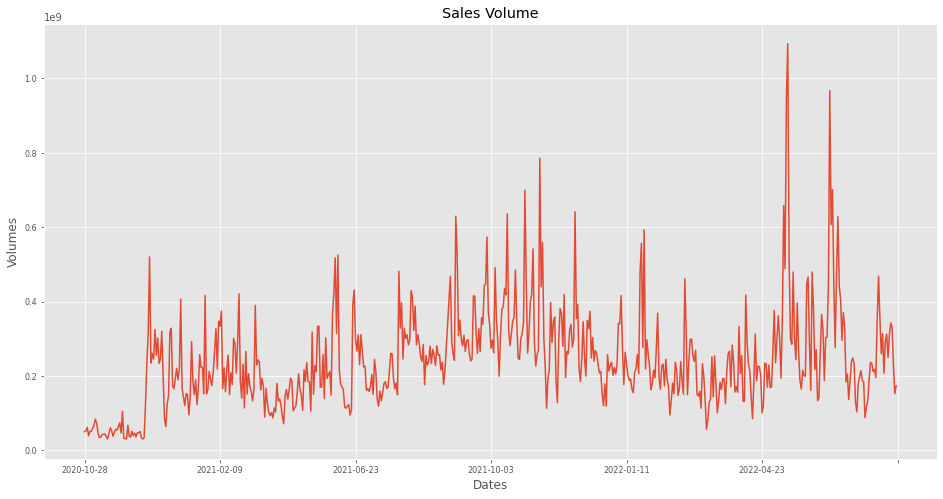

XRP




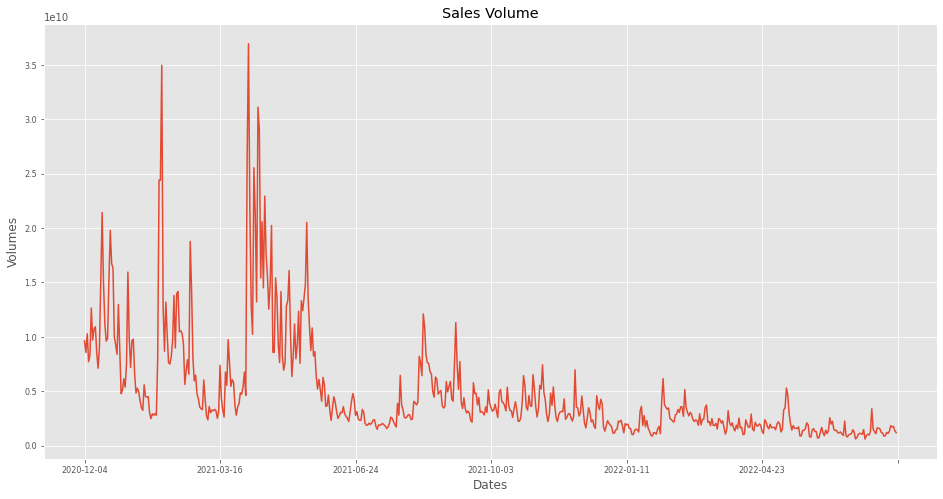

In [85]:
newlist= sorted(list(set(dataset["Symbol"])))
for ele in newlist:
    print(ele)
    print("\n")
    dataset[dataset.loc[:,"Symbol"]==f"{ele.upper()}"].sort_values(by="Date",ascending=True)['Volume'].tail(600).plot(figsize=(16, 8), fontsize=8)
    plt.title('Sales Volume')
    plt.xlabel('Dates')
    plt.ylabel('Volumes')
    plt.show()


In [ ]:
How are the prices changing and how does the volatilty determine the future of the currencies.

In [99]:
# We apply the oulier functions here
# We assume that the ratio of negatives over positive odds is a measure of the volatility.
array = []
for ele in sorted(symbol2):
    if len(dataset[dataset.loc[:,"Symbol"]=="{}".format(ele.upper())])>350:
        arr =[]
        dataset2 =dataset[dataset.loc[:,"Symbol"]=="{}".format(ele.upper())].sort_values(by="Date",ascending=False).head(330)
       
        dataset2["outliers"] = outliers(dataset2["Price"])[:330]
        #dataset2.outliers.plot(figsize=(16, 8),color="green", fontsize=8, title="Currency = {},  odds = {}".format(ele.upper(), nonzero(outliers(dataset2["outliers"]))), xlabel ="Dates",ylabel= "Diff")
        array.append("{}  {}".format(ele.upper(), nonzero(outliers(dataset2["outliers"]))))
        #plt.show()
print(pd.DataFrame(array))








                            0
0      ADA  (3.8, 9.65, 2.54)
1     BNB  (5.46, 9.77, 1.79)
2      BTC  (5.19, 7.78, 1.5)
3    BUSD  (2.37, 3.26, 1.37)
4     DOGE  (6.0, 6.86, 1.14)
5      DOT  (3.24, 9.71, 3.0)
6      ETC  (6.8, 8.22, 1.21)
7     ETH  (4.36, 8.14, 1.87)
8     LEO  (6.53, 5.11, 0.78)
9     LTC  (5.19, 8.36, 1.61)
10  MATIC  (5.46, 8.05, 1.47)
11    SOL  (4.64, 7.83, 1.69)
12    TRX  (5.46, 9.77, 1.79)
13     UNI  (4.91, 7.8, 1.59)
14   USDC  (3.24, 5.29, 1.63)
15    USDT  (1.5, 4.79, 3.19)
16   WBTC  (4.91, 6.94, 1.41)
17     XRP  (5.73, 8.02, 1.4)


In [ ]:
#age = []
#keys =[]

#data = datasetnew.groupby(["Symbol"]).get_group("BTC").iloc[:,:5].sort_index(axis=1)

#print(len(data))
#outliers(data["Price"])


In [90]:
datasetnew=df1
datasetnew.index =datasetnew["Date"]
datasetnew = datasetnew.iloc[:, 2:].sort_values("Date")
datasetnew

Market Cap       Price  Circulating Suppy   Volume(24h)     %h  \
Date                                                                           
2016-01-01  2.080740e+06     27.6800       7.517984e+07  5.672080e+03   65.0   
2016-01-01  6.514440e+06     14.3900       4.525524e+08  5.787200e+03    5.0   
2016-01-01  2.197585e+06      1.4400       1.522041e+06  9.334570e+03 -234.0   
2016-01-01  2.859829e+06     77.7200       3.679620e+07  1.244220e+03  -28.0   
2016-01-01  3.117577e+06     13.8200       2.255715e+07  1.264010e+03  239.0   
...                  ...         ...                ...           ...    ...   
2022-08-18  4.810129e+10    298.1400       6.133726e+07  1.041815e+09   -1.7   
2022-08-18  1.831734e+10      0.3710       9.377588e+09  9.277863e+08   -2.0   
2022-08-18  1.739572e+10      0.5126       3.934048e+09  6.428772e+08   -2.9   
2022-08-18  5.732327e+09  23183.2000       4.726200e+04  1.214195e+08   -0.7   
2022-08-18  5.064715e+09      5.3100       5.395413e+07  3.576578e+06   -0.2   

            %7d  %24hSymbol   %24h       7d Symbol  
Date                                                
2016-01-01  NaN         NaN   59.0    2.87%    BLK  
2016-01-01  NaN         NaN -101.0   -1.78%   MAID  
2016-01-01  NaN         NaN  143.0   -6.38%   CLAM  
2016-01-01  NaN         NaN  -23.0   12.88%    EMC  
2016-01-01  NaN         NaN -679.0  -14.33%    RBY  
...         ...         ...    ...      ...    ...  
2022-08-18  NaN         NaN   -2.7     -7.9    BNB  
2022-08-18  NaN         NaN   -2.3     -2.5    XRP  
2022-08-18  NaN         NaN   -4.5     -3.5    ADA  
2022-08-18  NaN         NaN   -0.6     -3.3   WBTC  
2022-08-18  NaN         NaN    0.5     13.1    LEO  

[47600 rows x 10 columns]

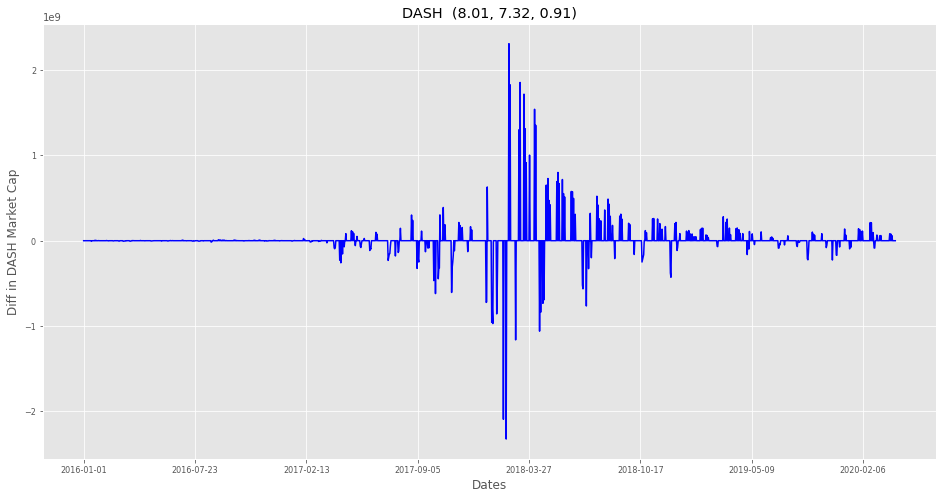

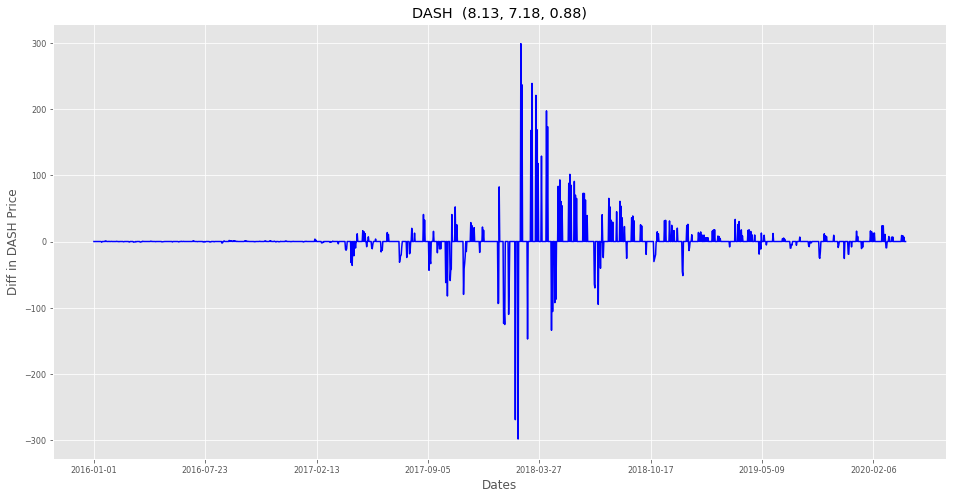

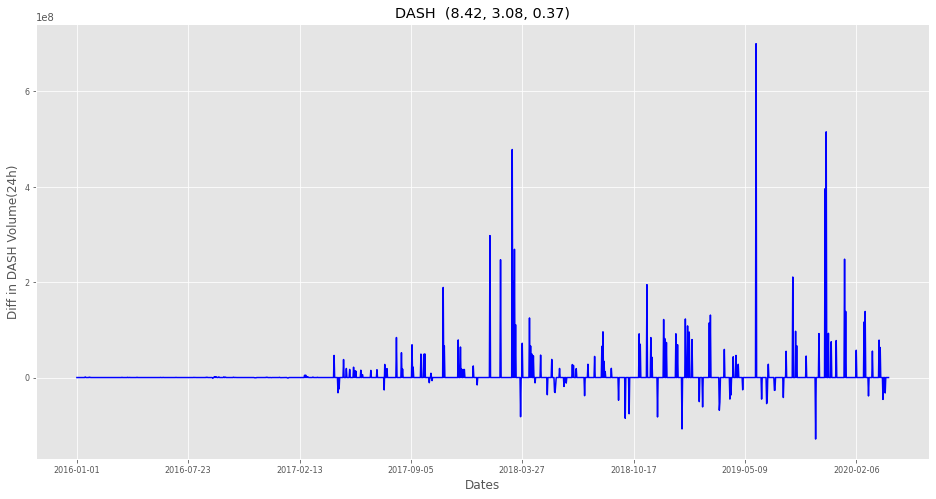

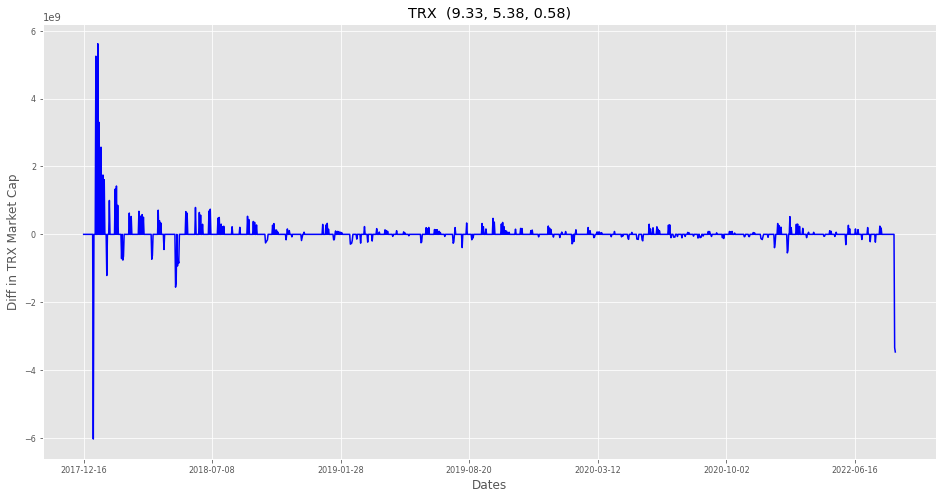

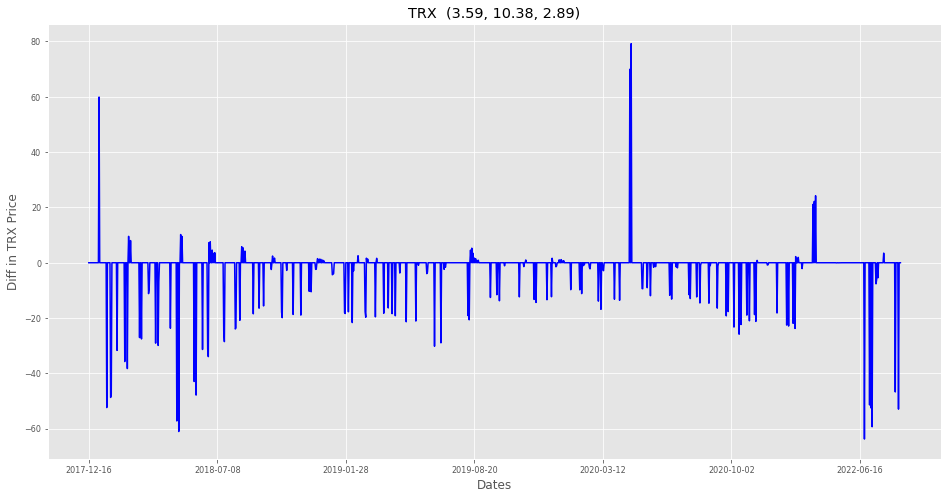

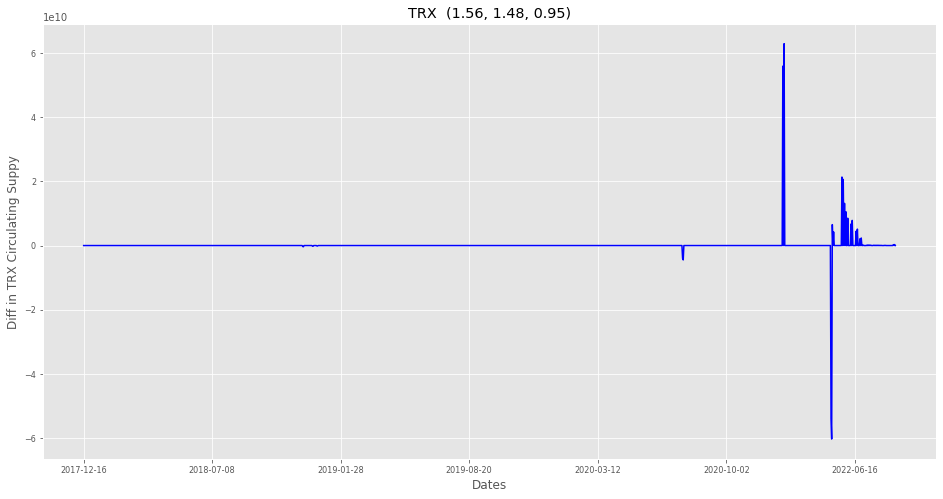

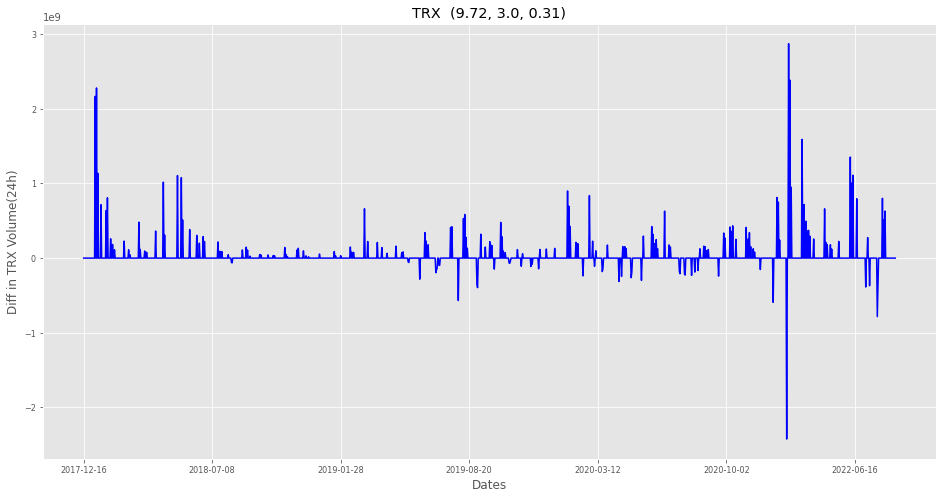

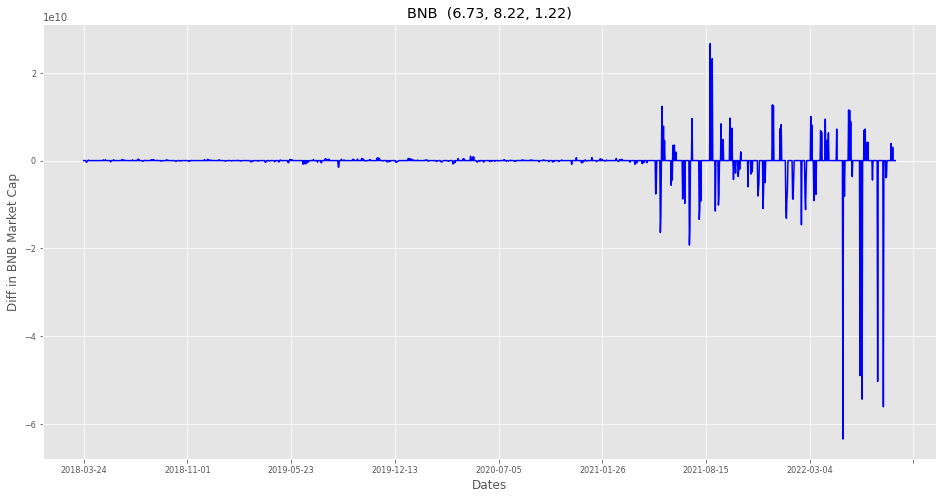

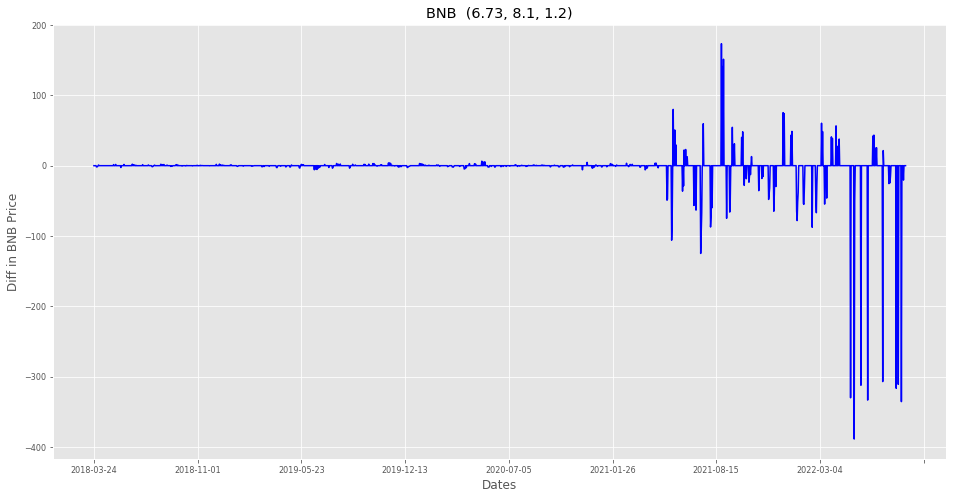

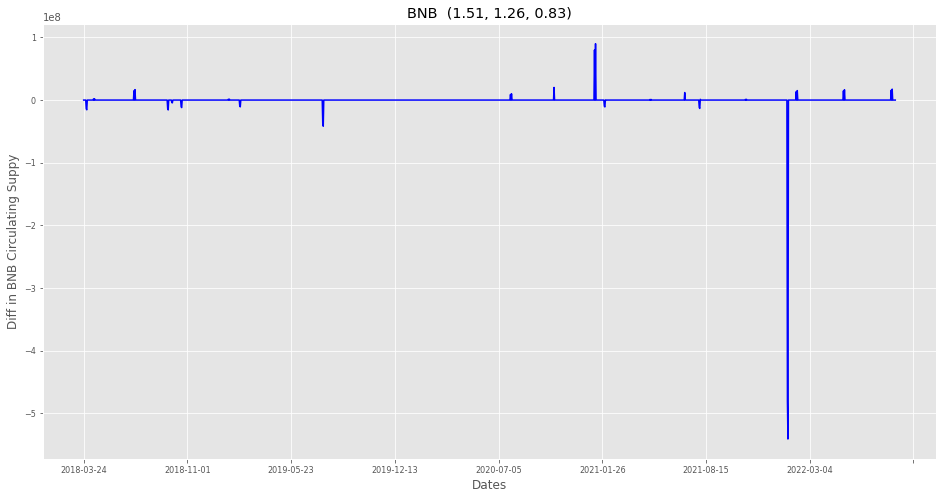

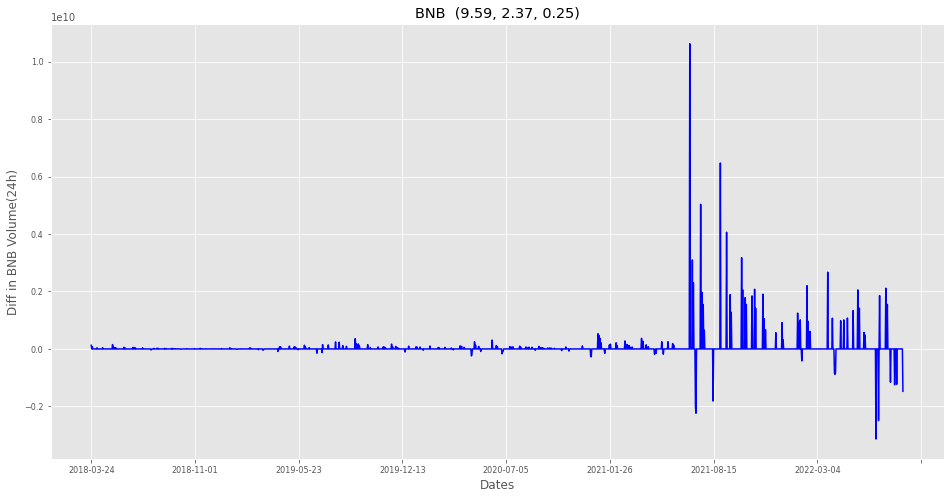

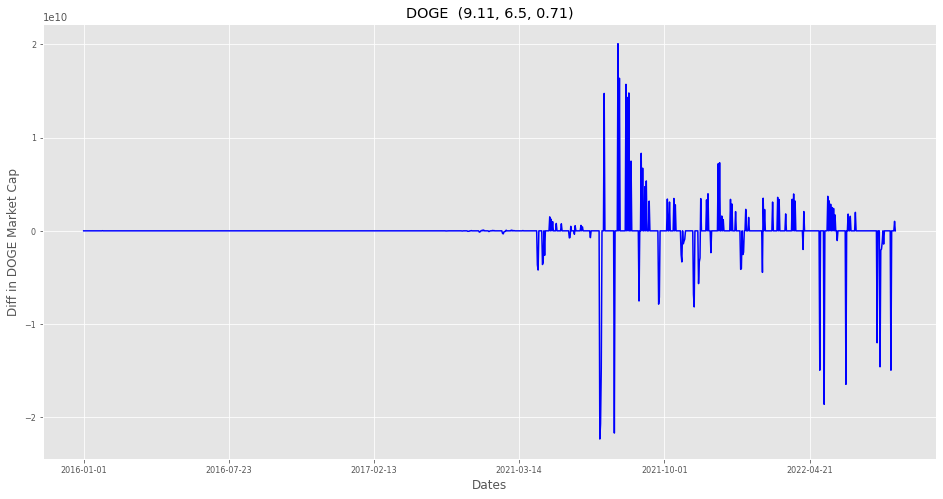

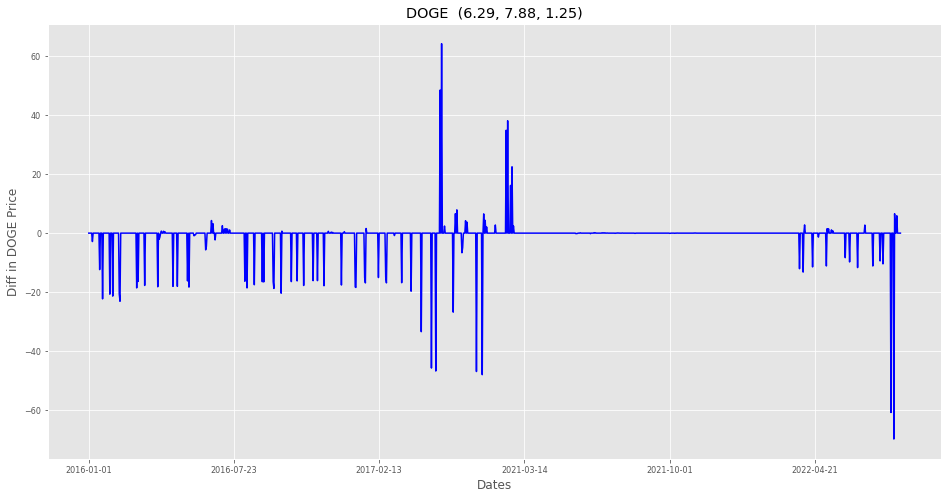

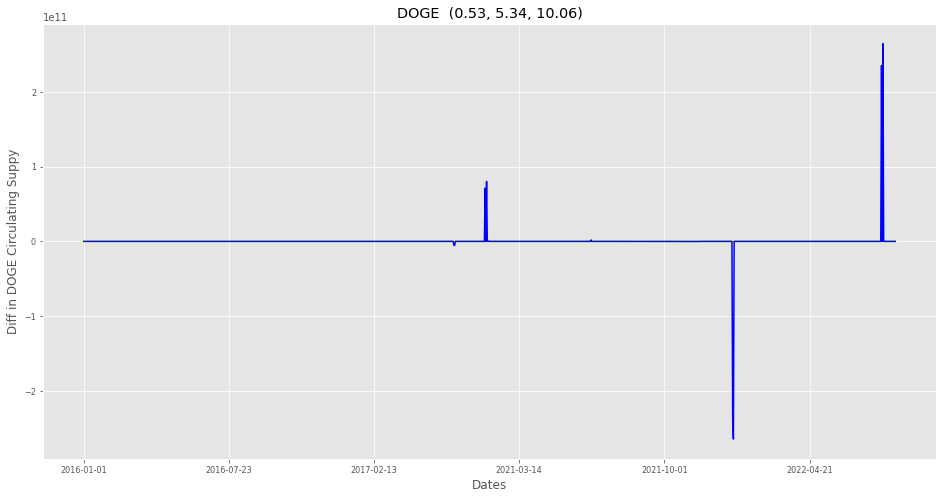

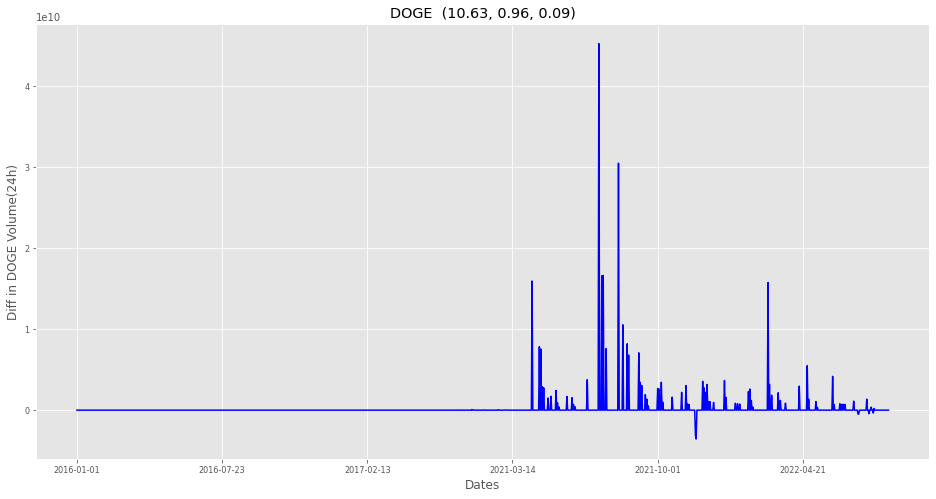

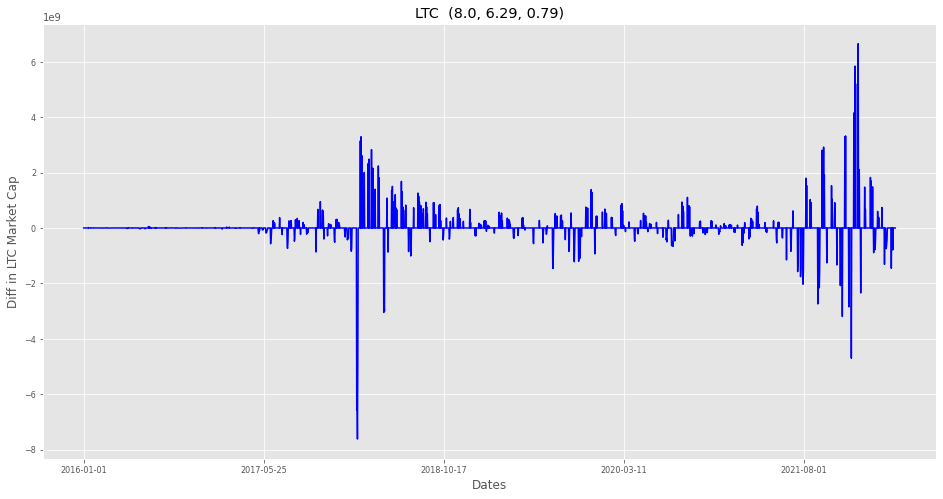

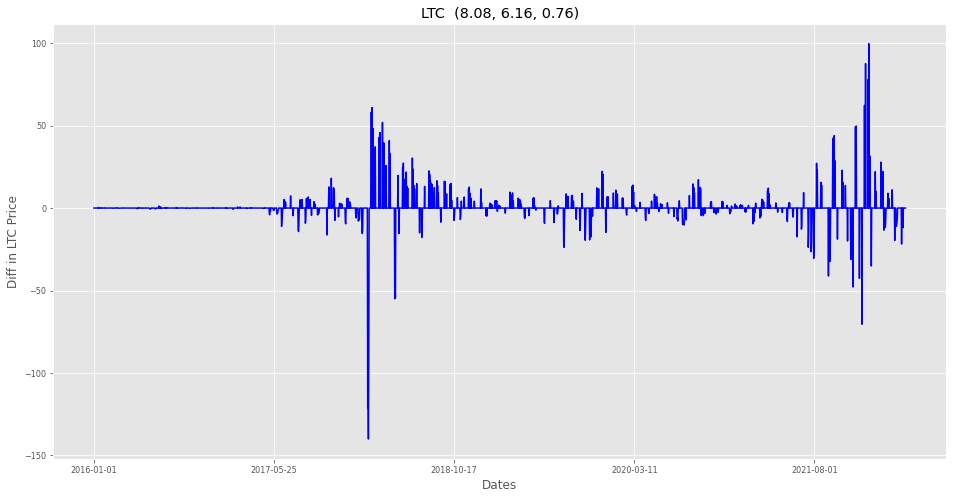

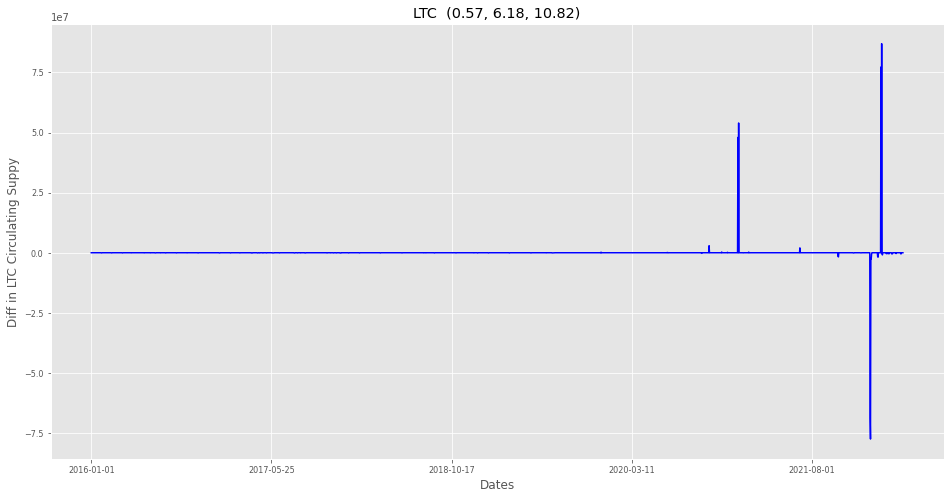

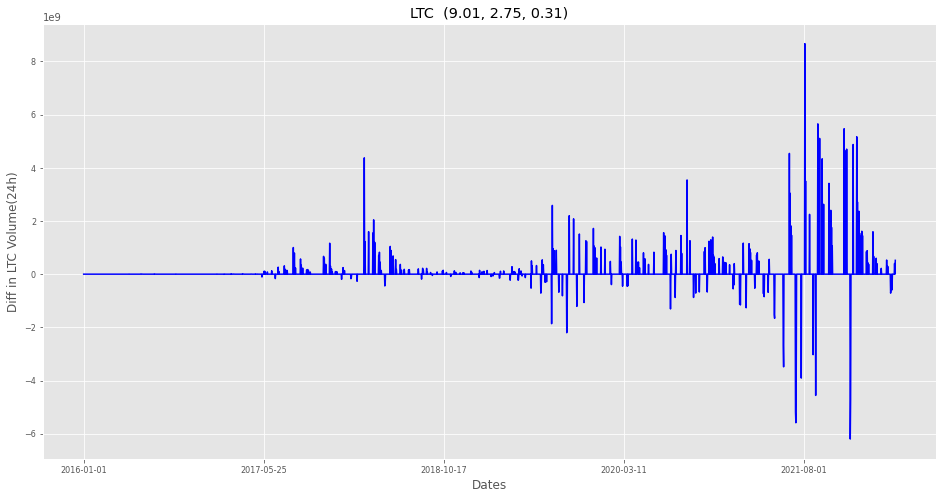

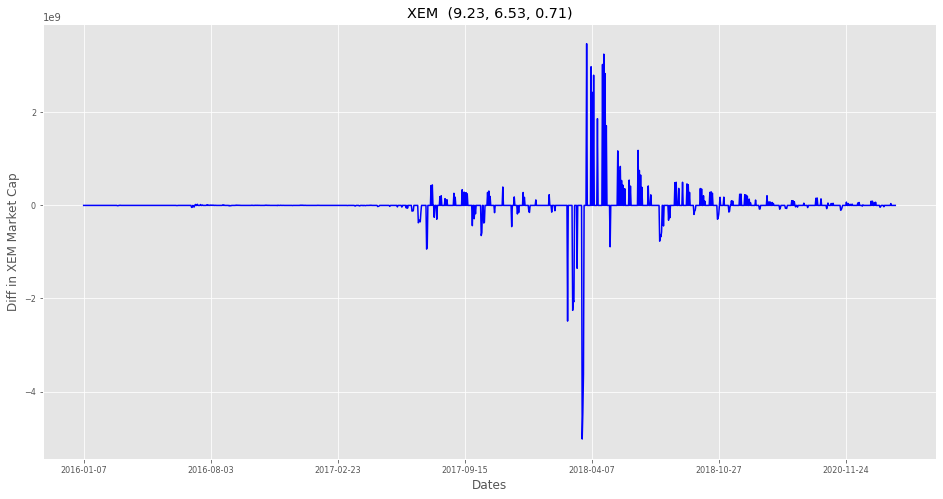

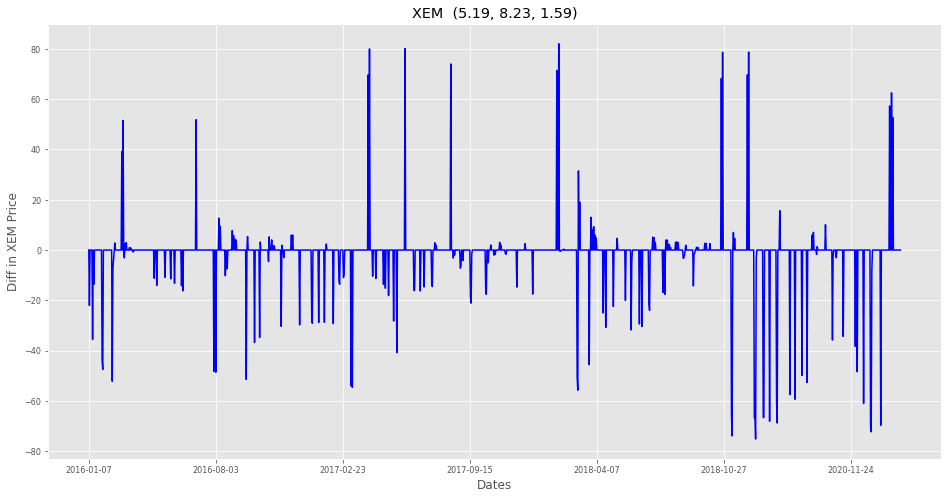

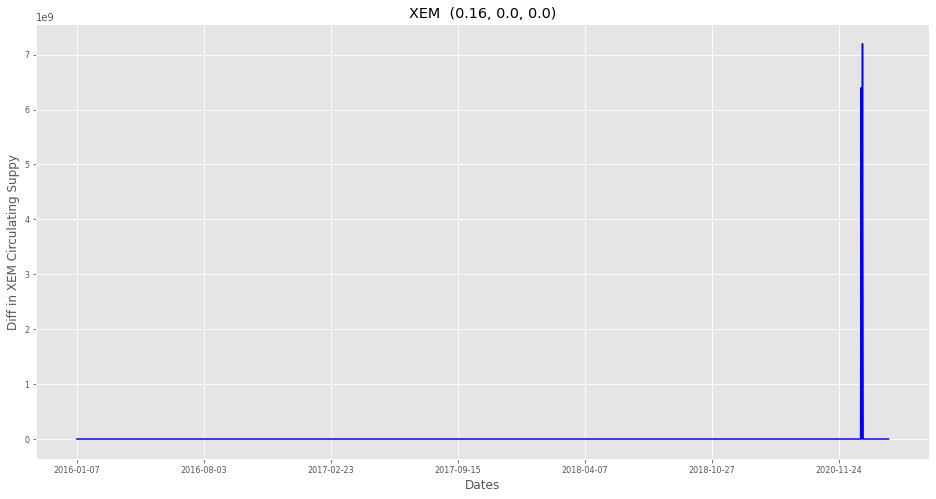

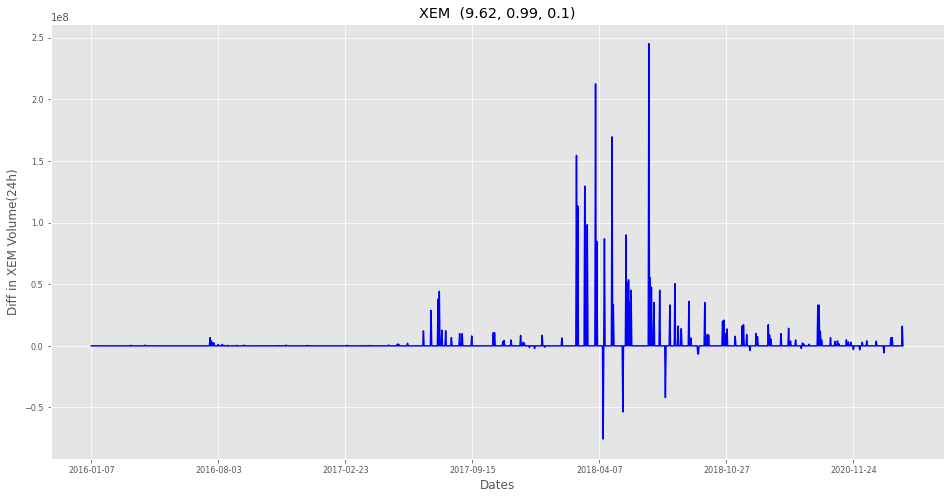

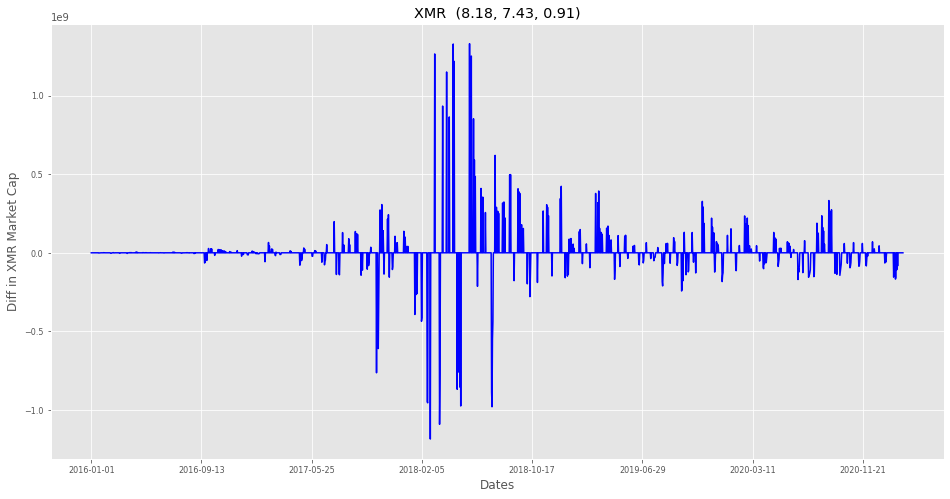

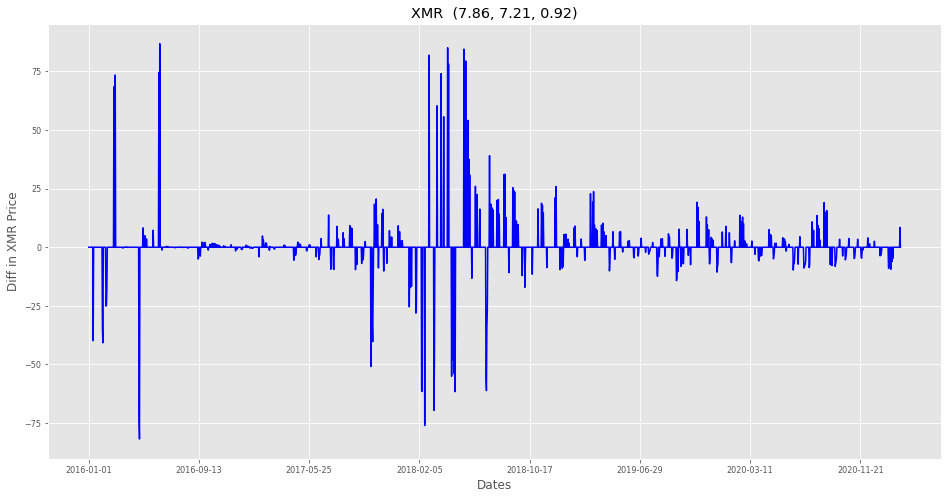

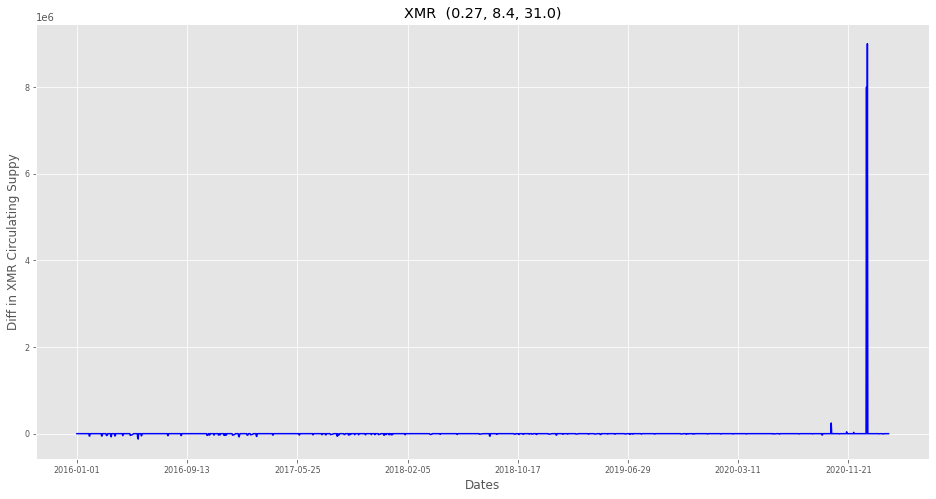

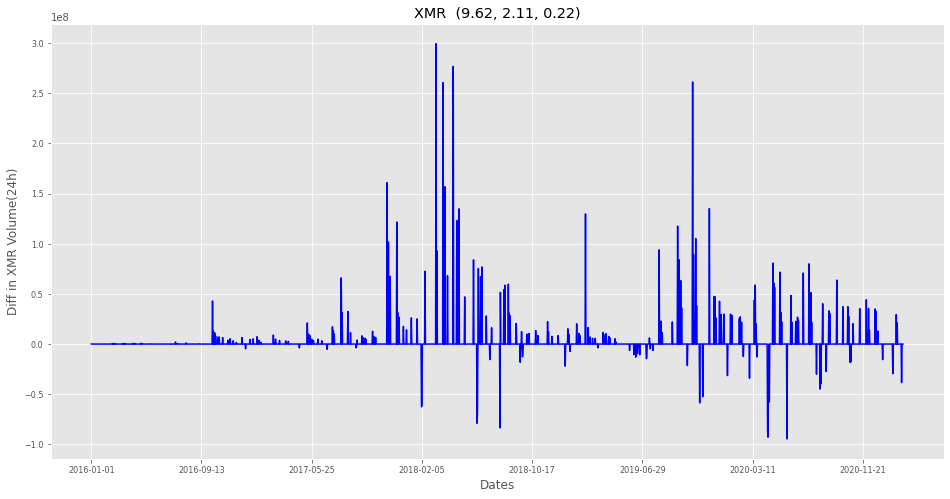

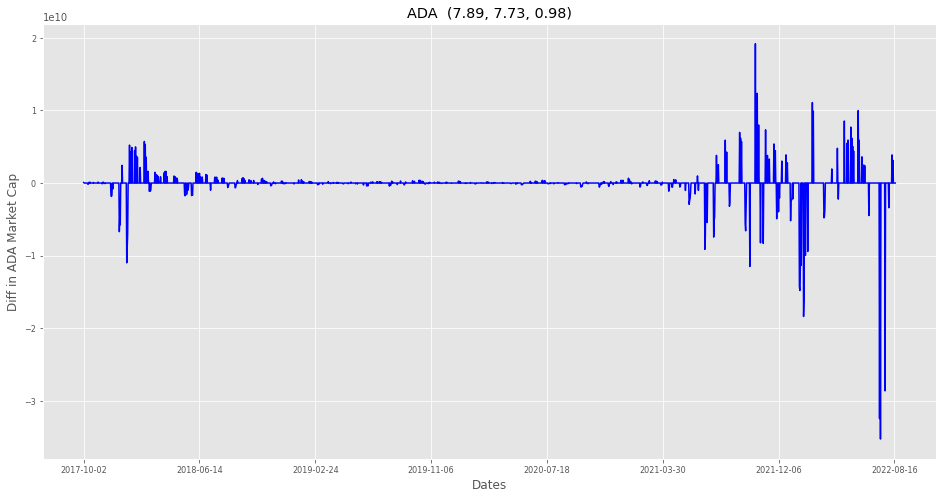

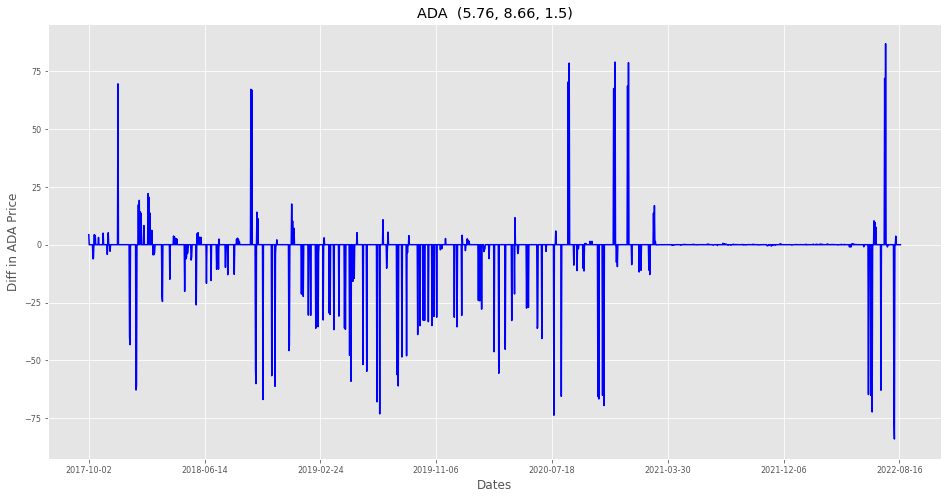

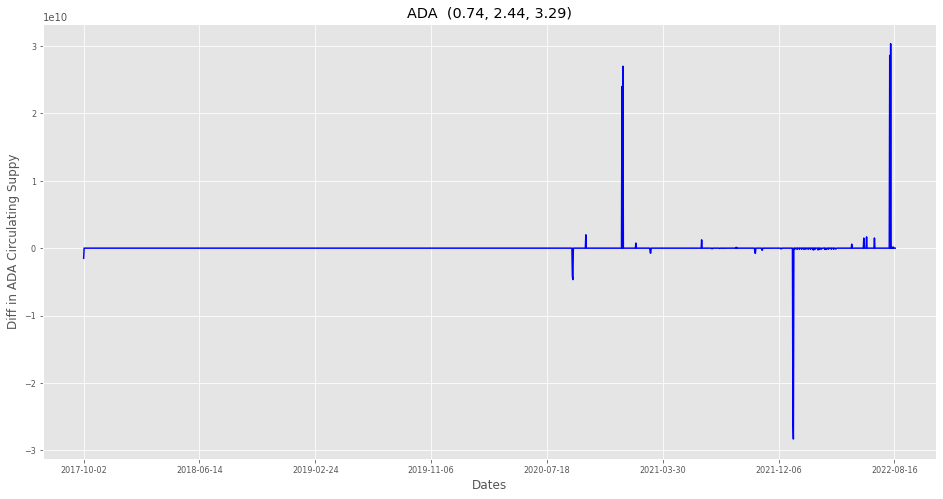

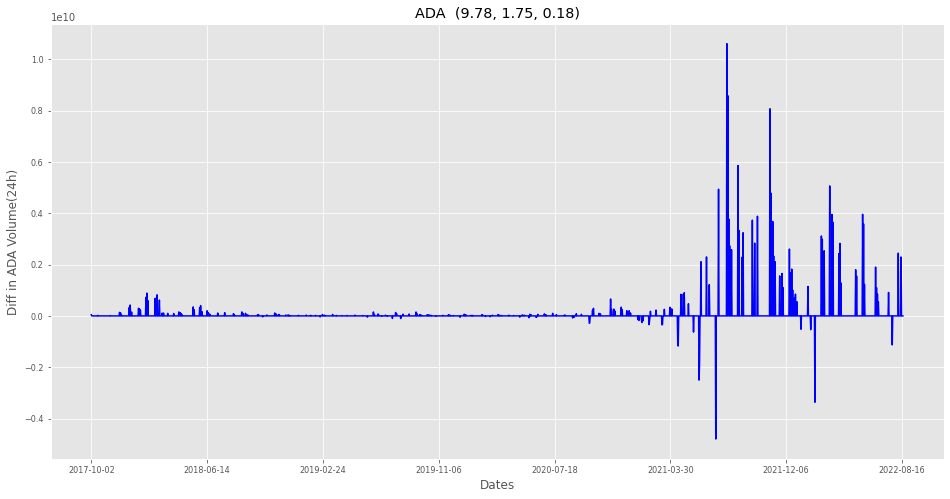

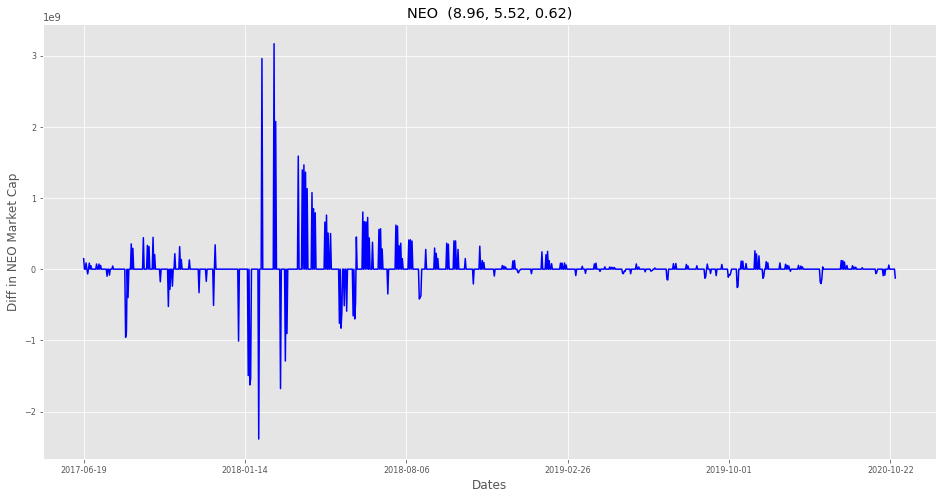

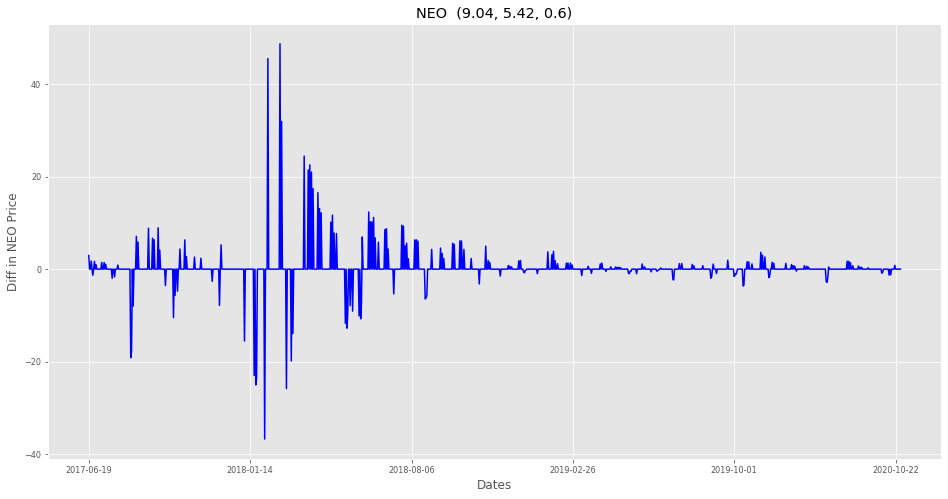

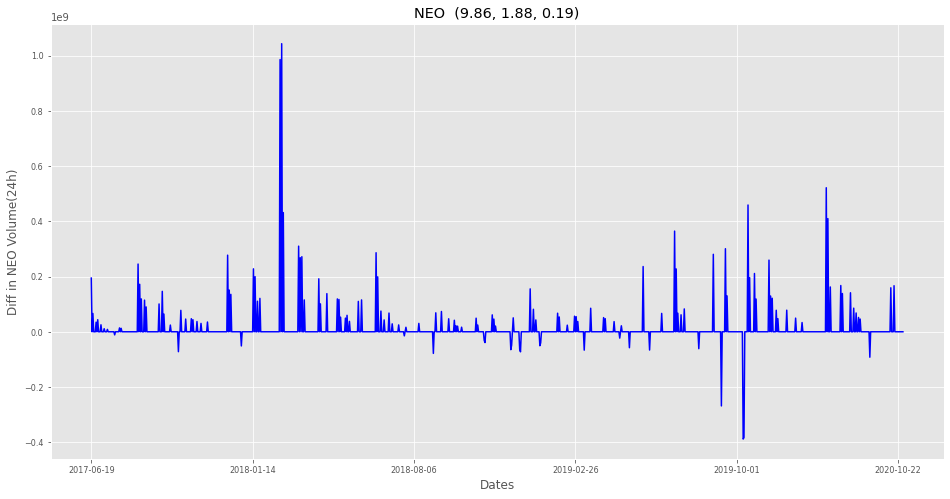

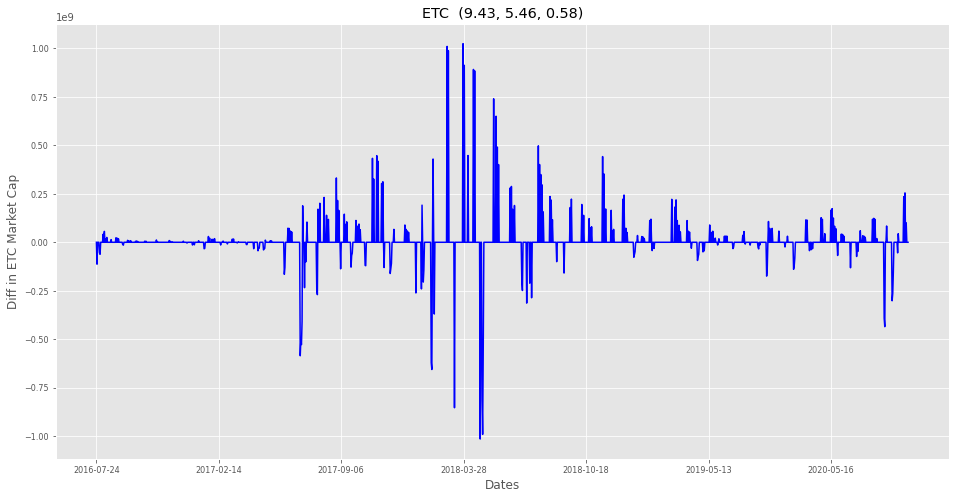

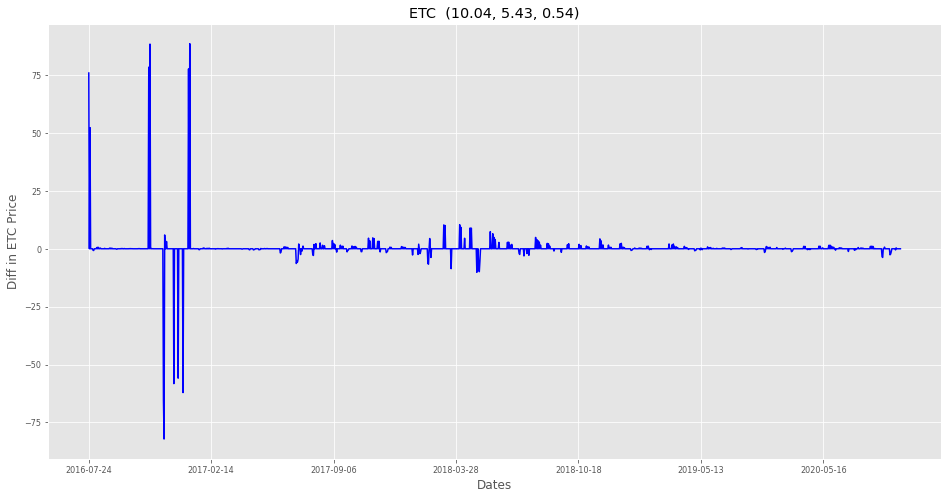

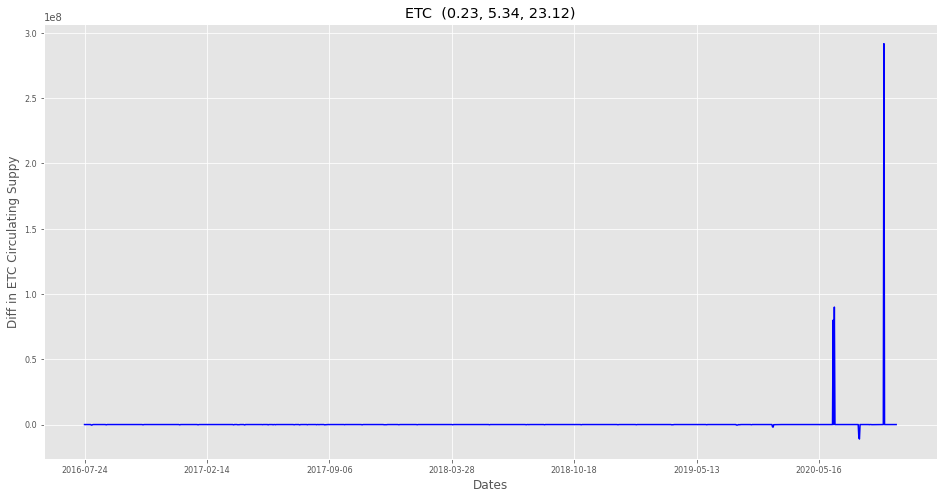

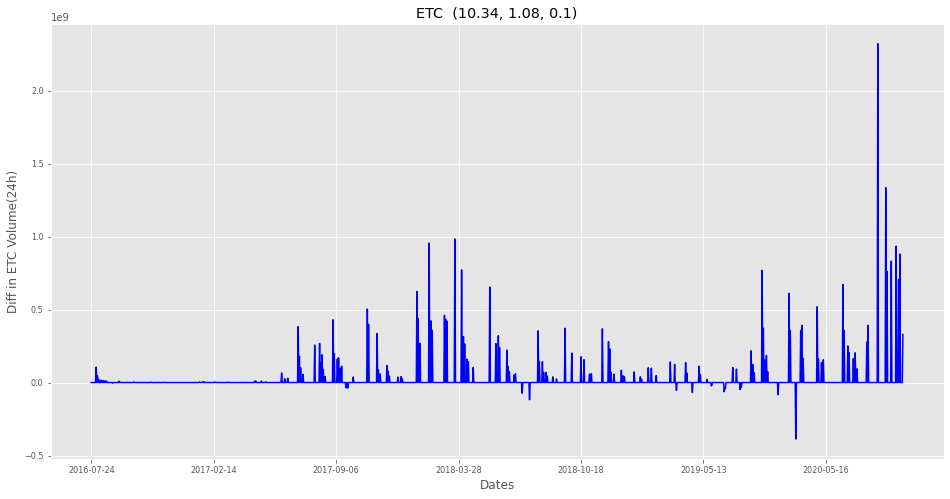

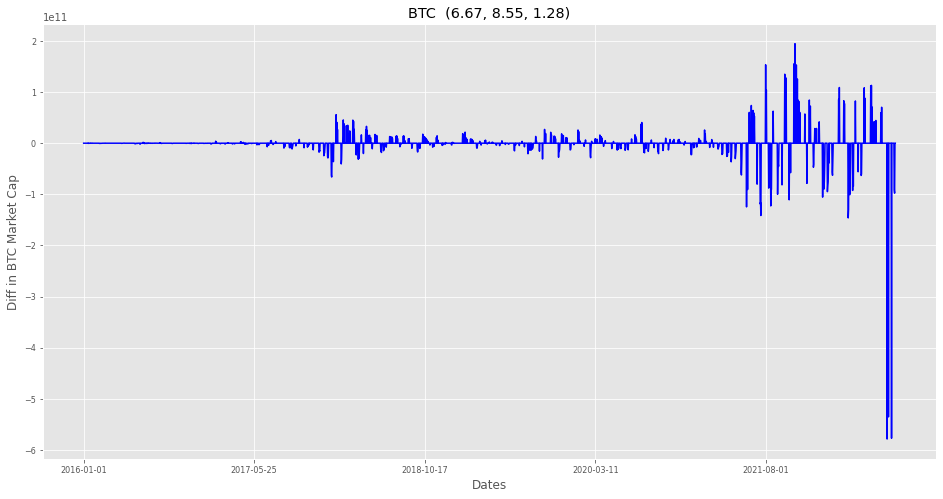

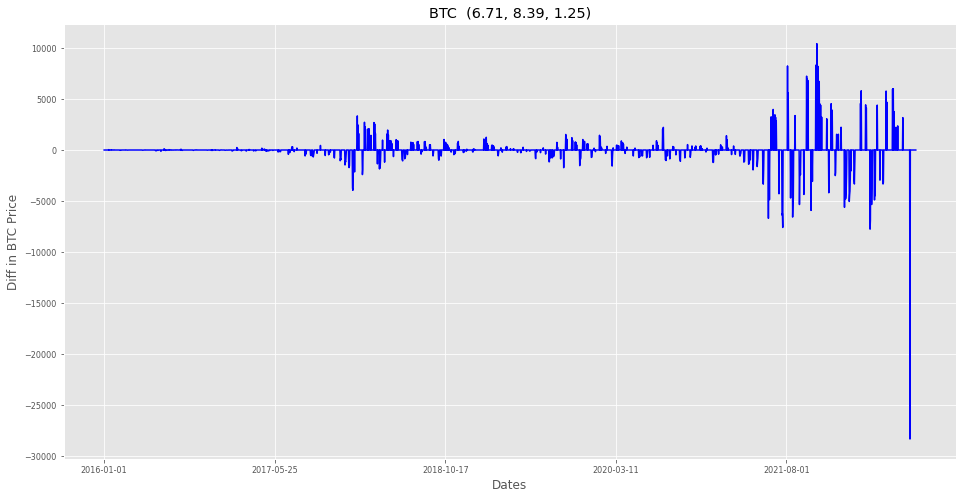

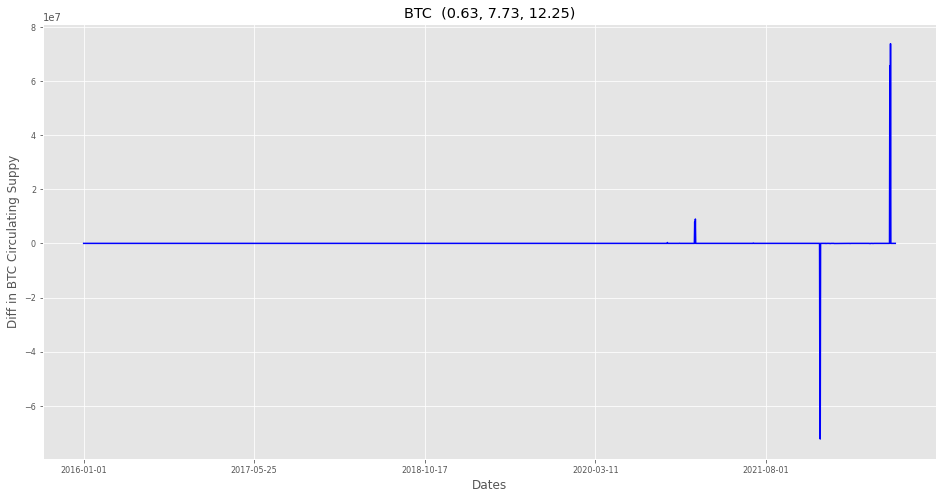

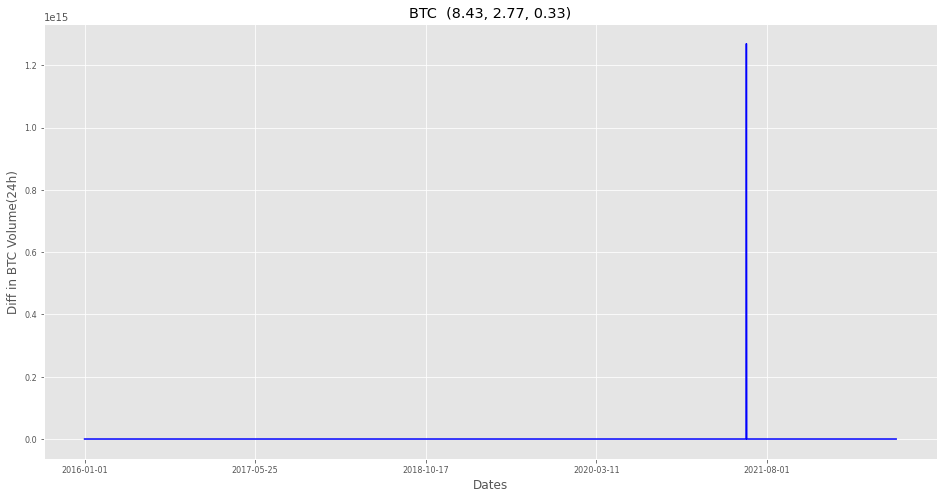

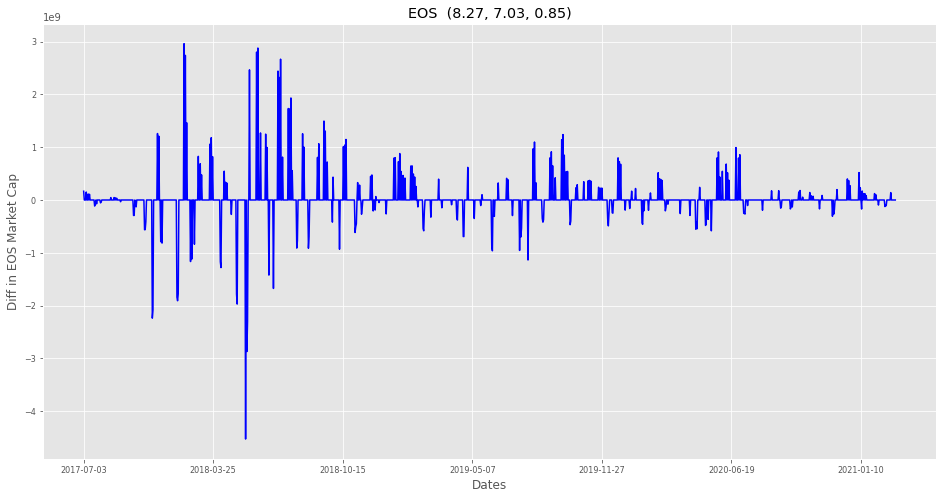

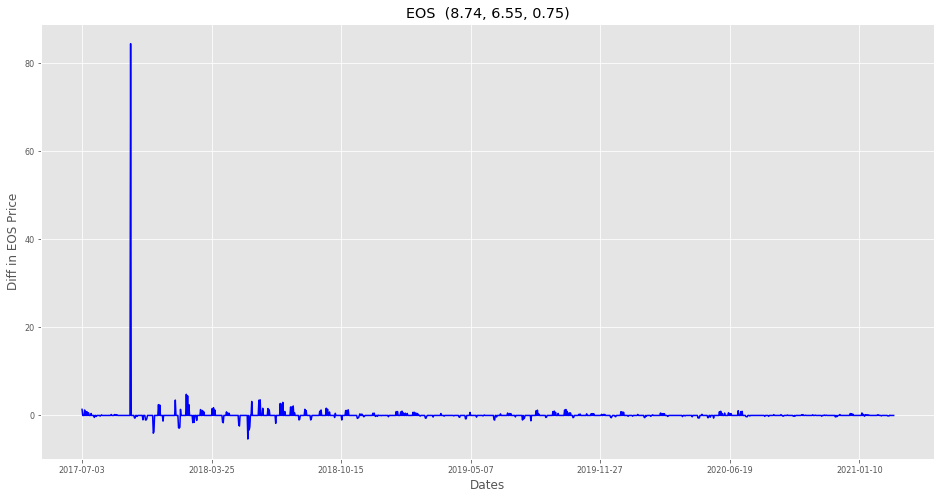

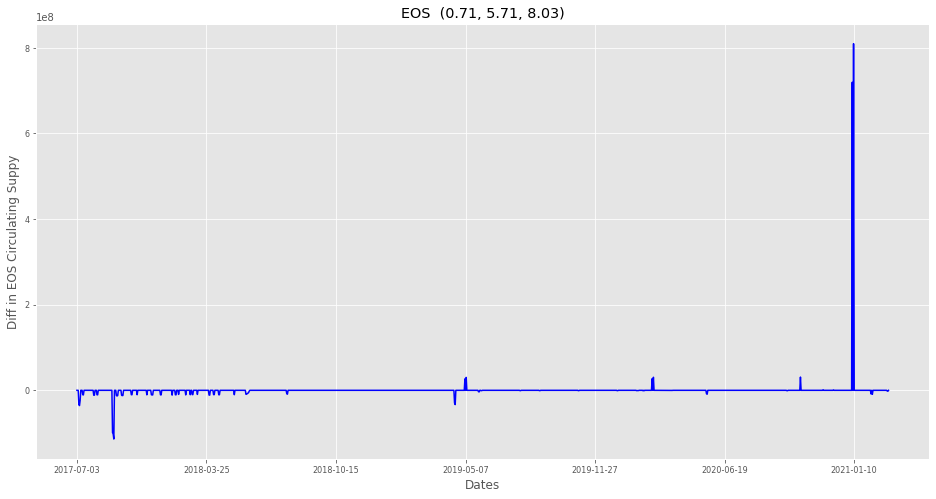

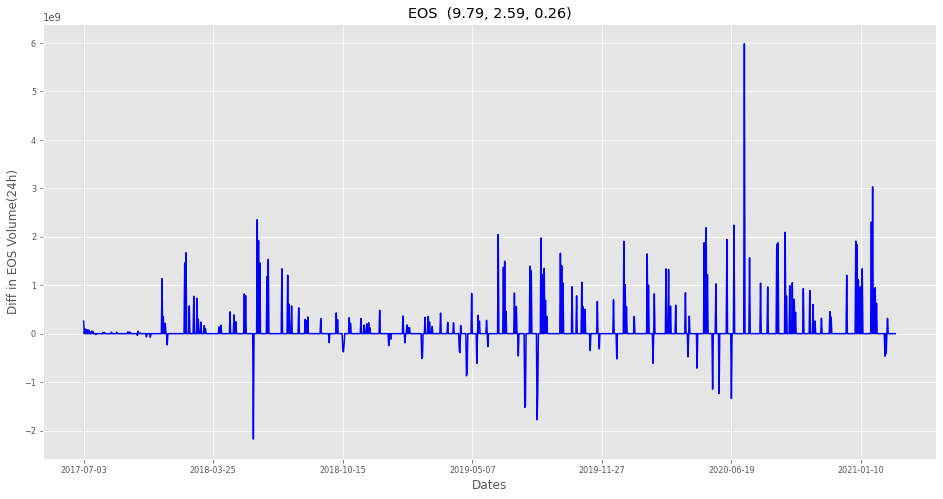

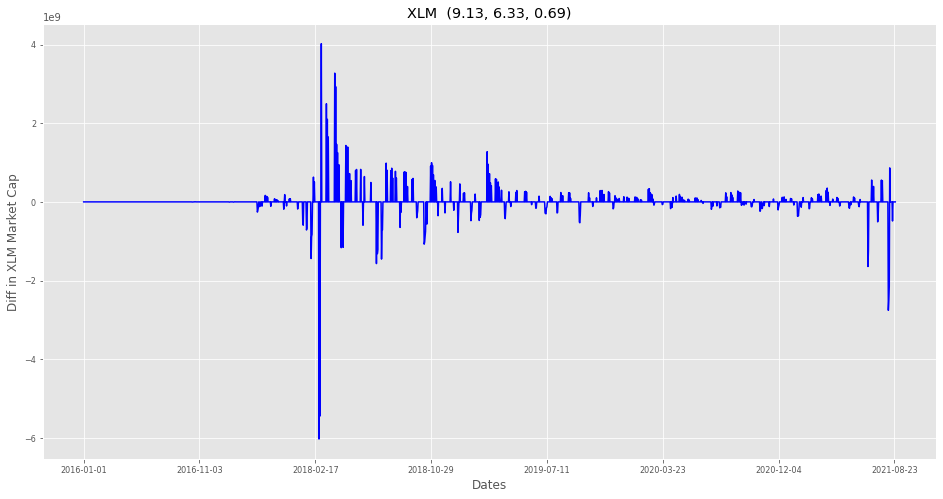

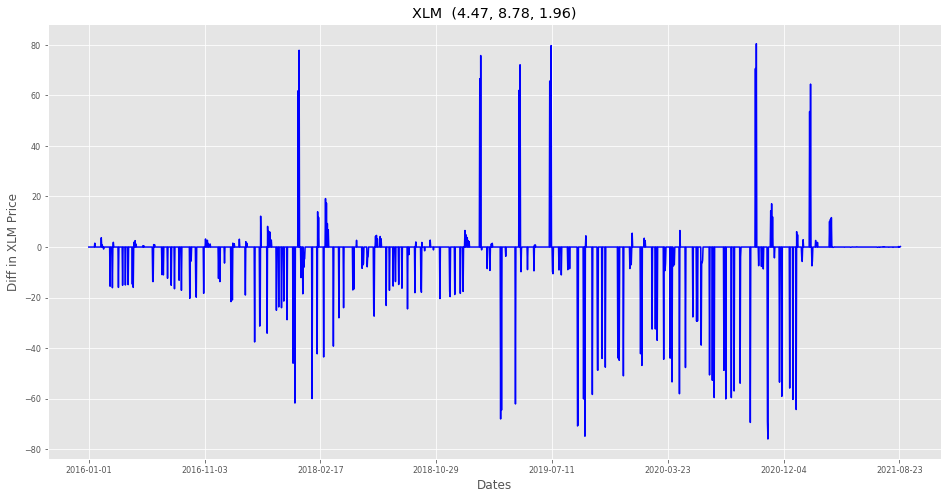

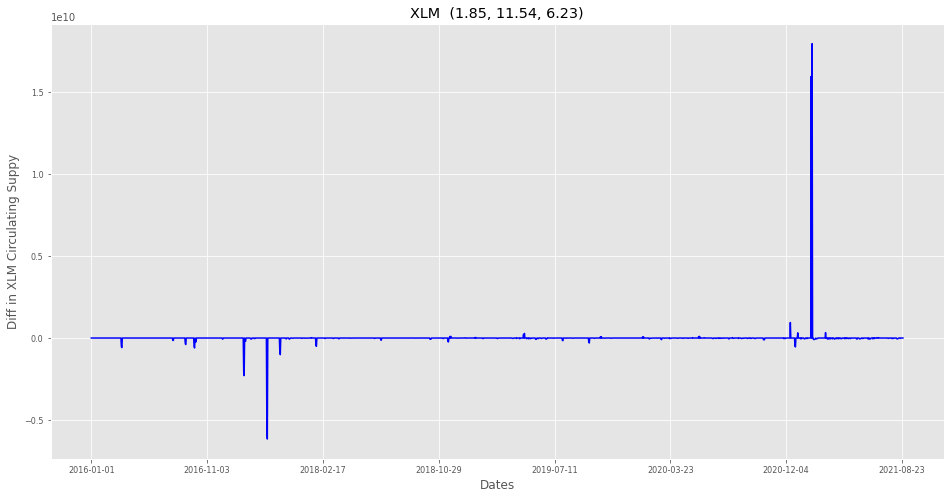

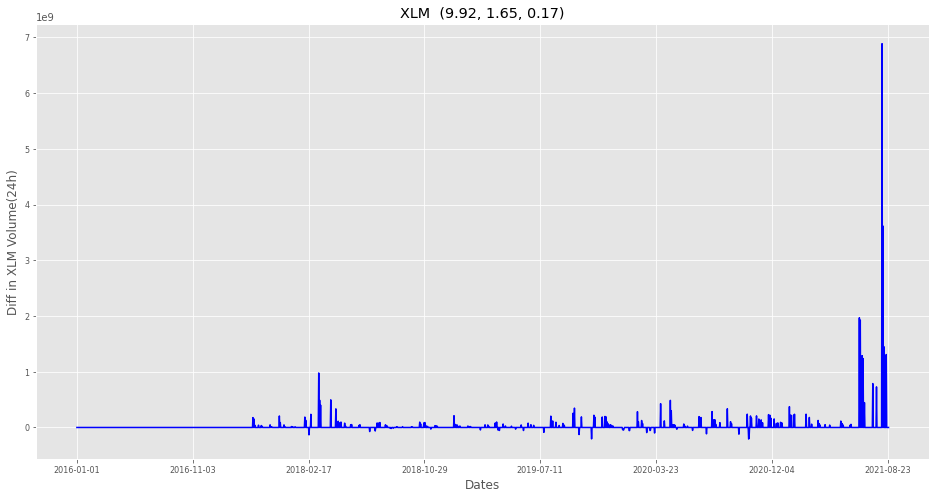

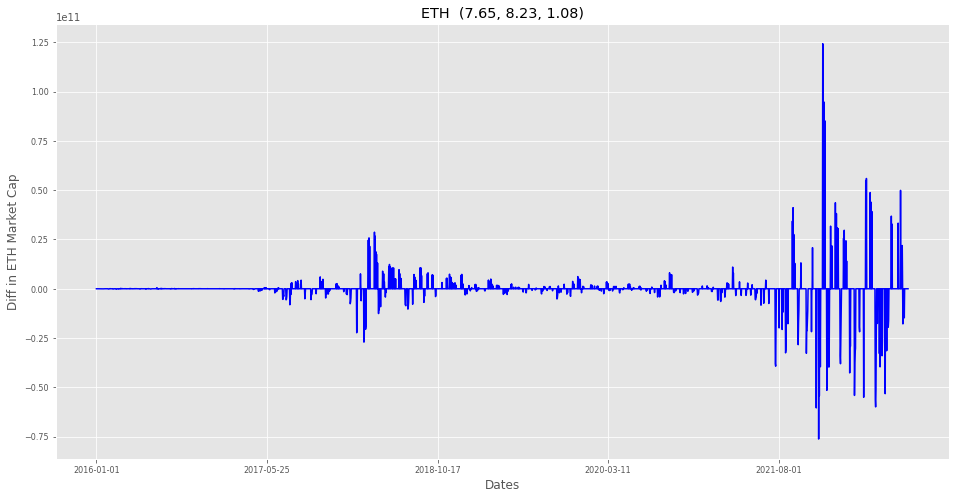

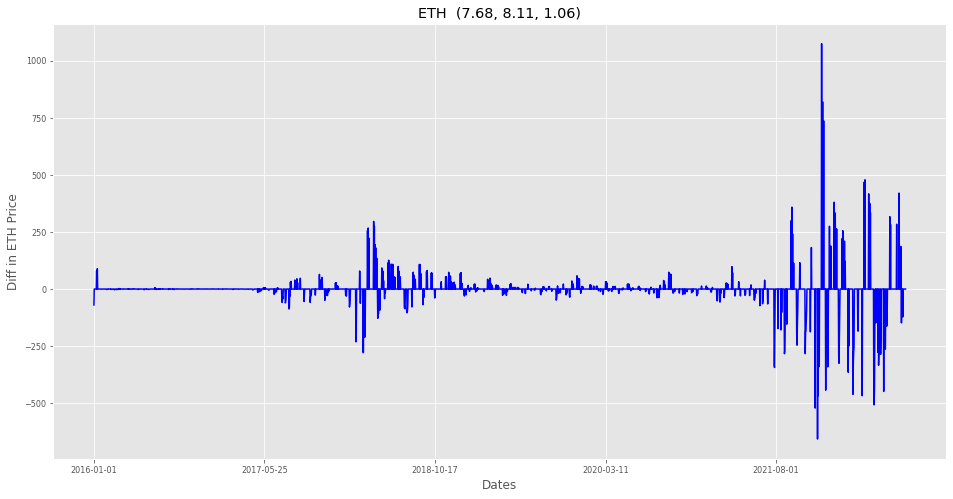

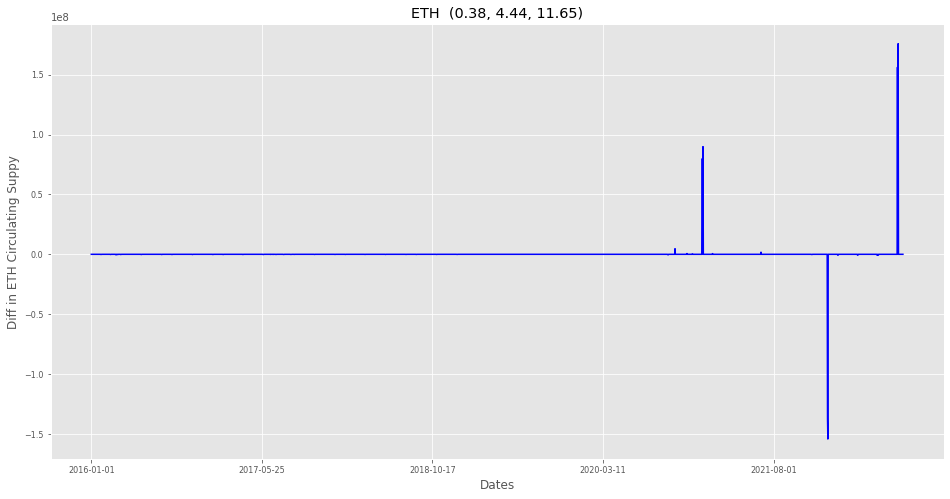

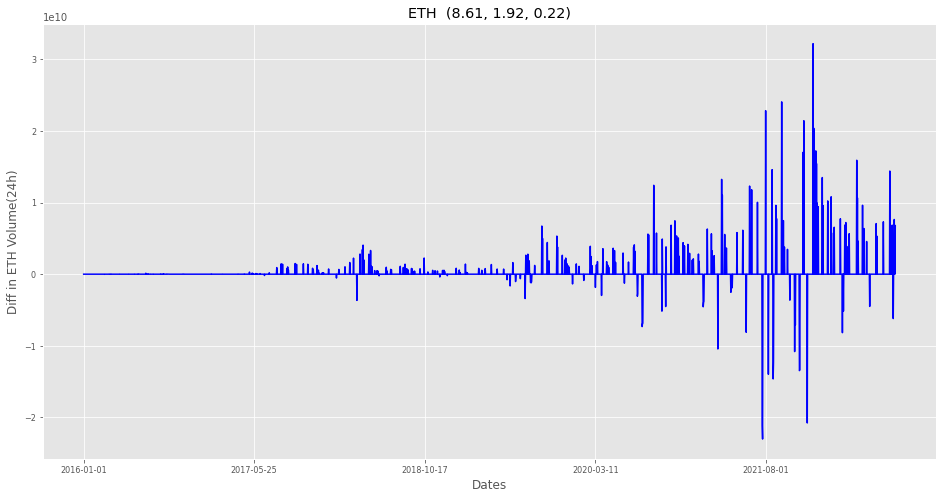

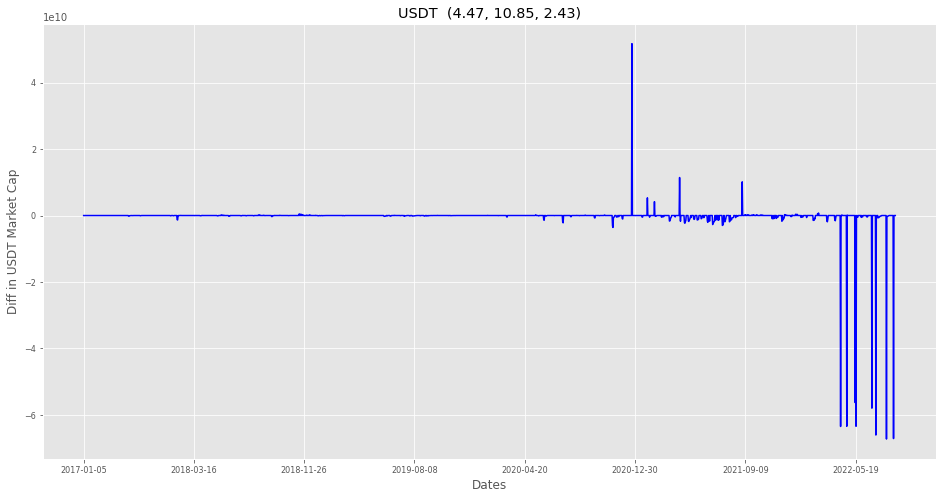

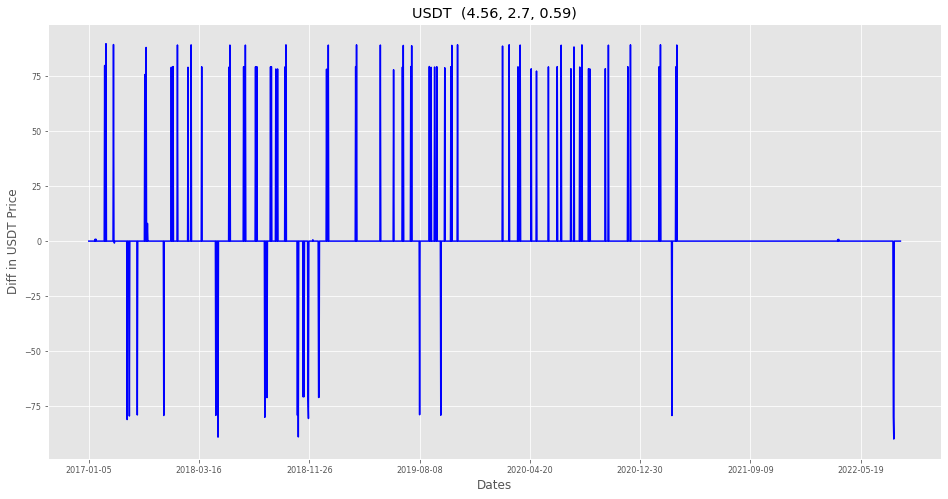

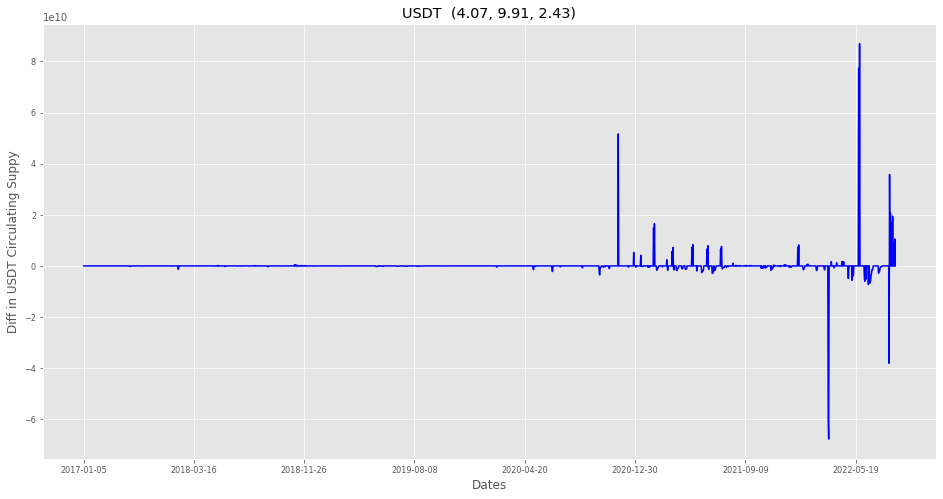

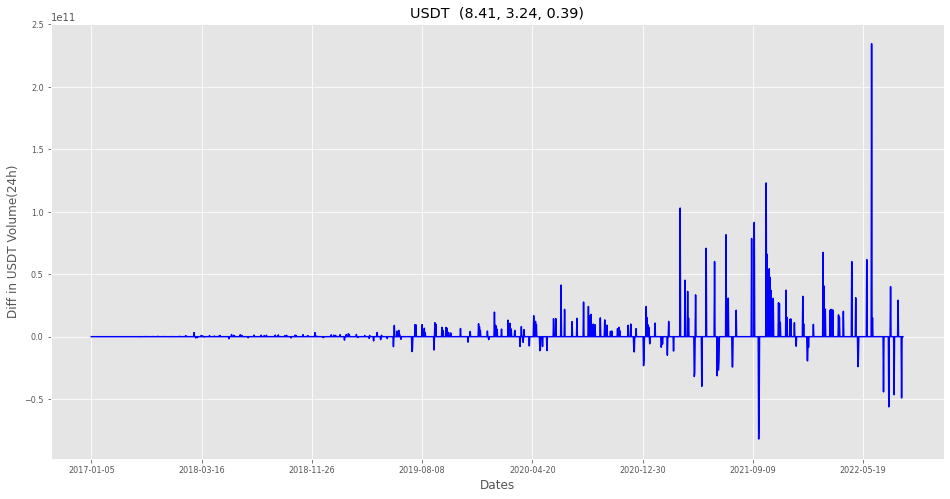

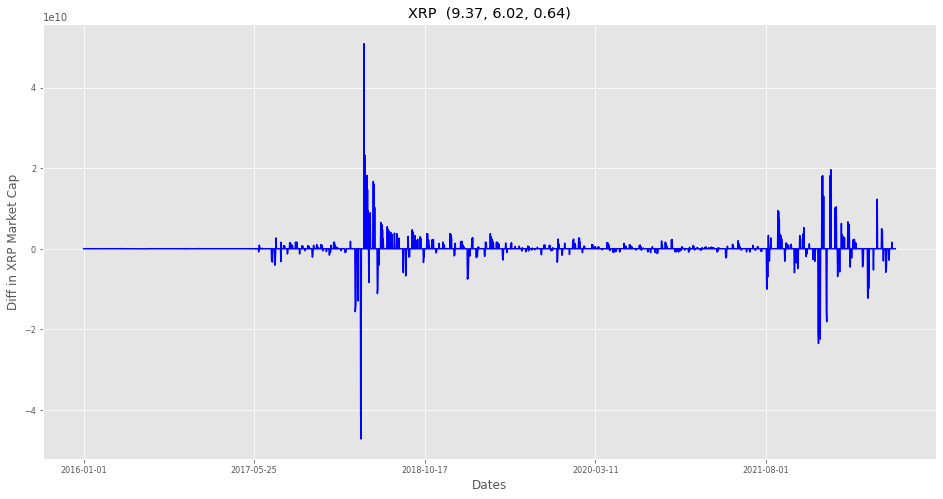

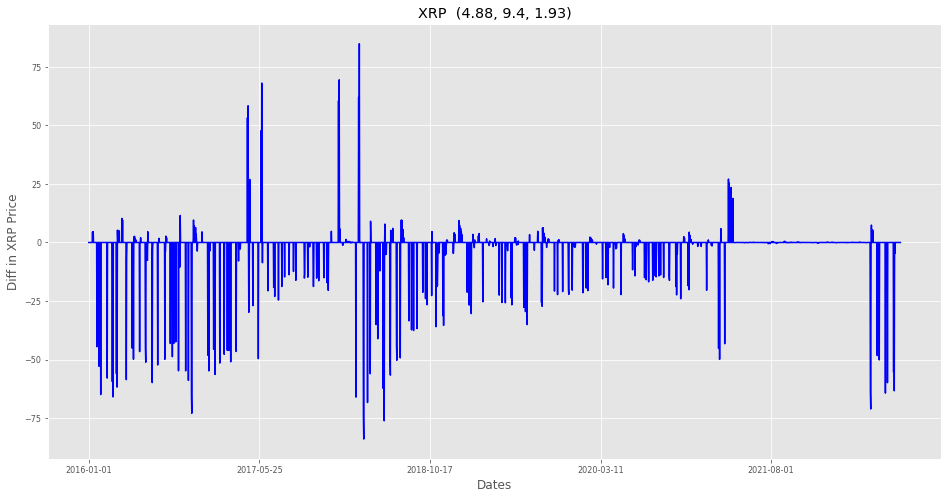

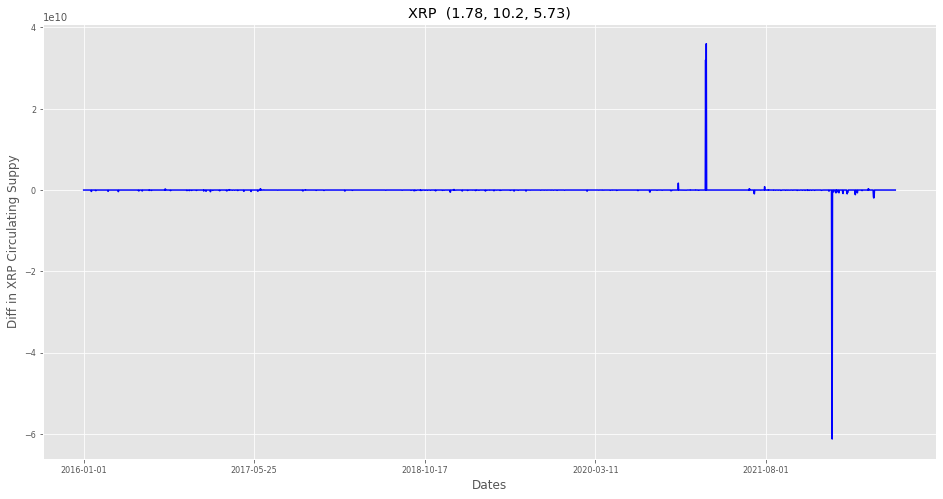

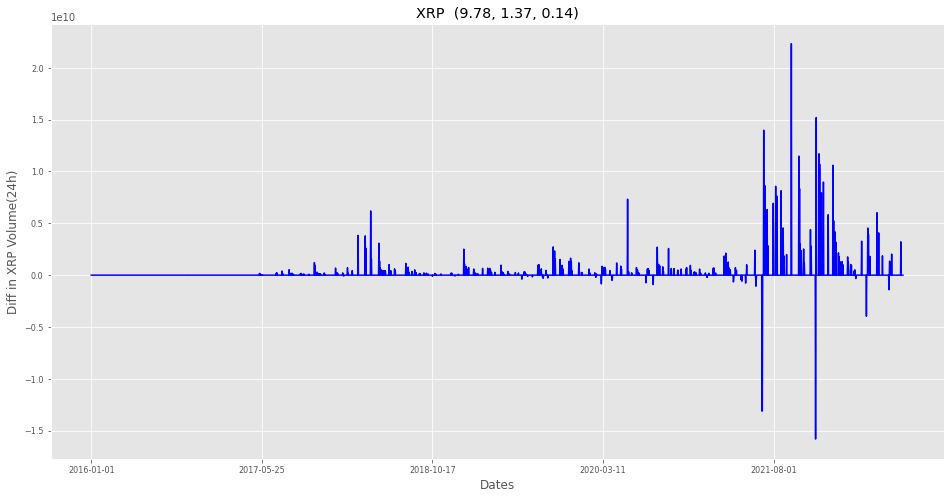

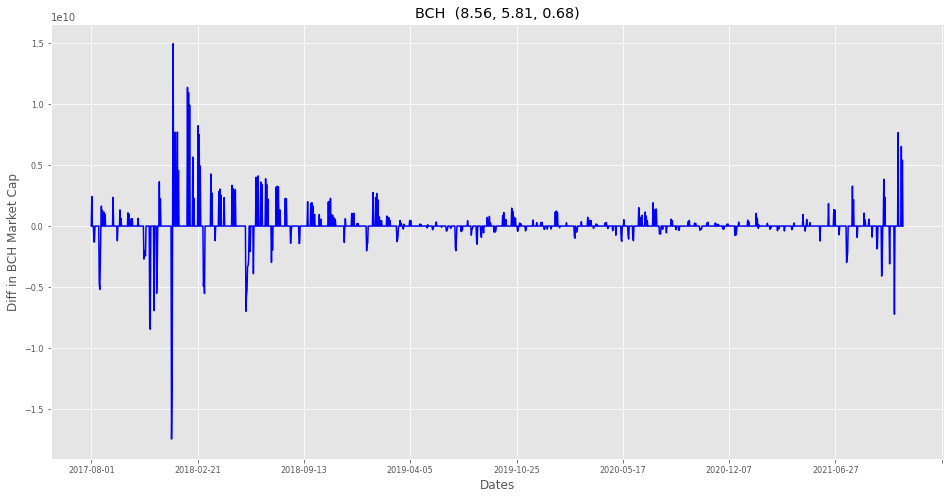

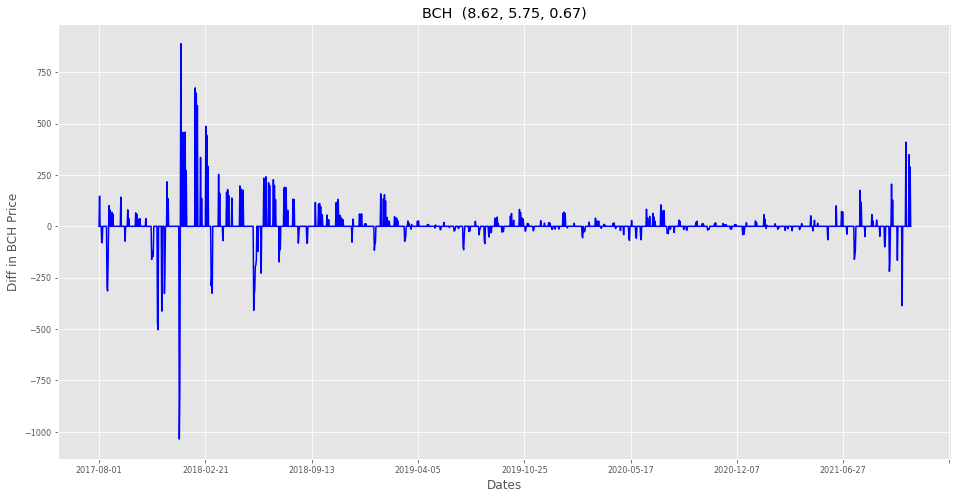

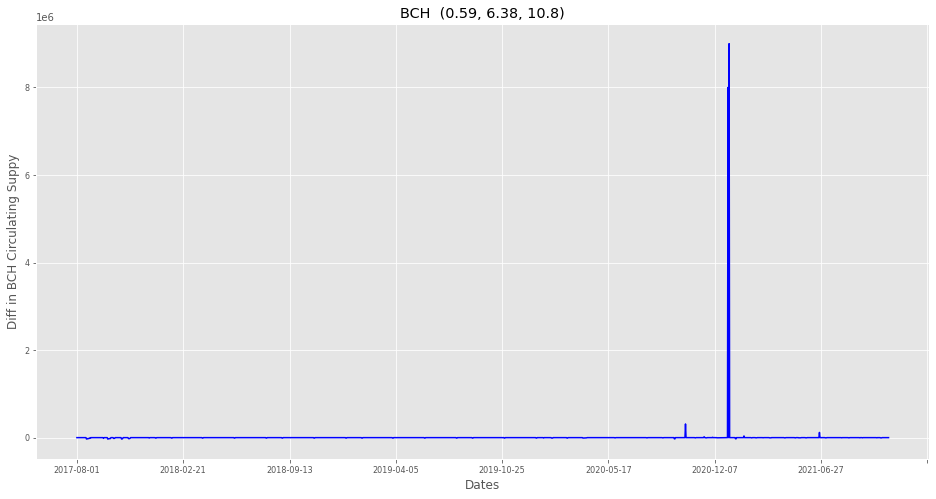

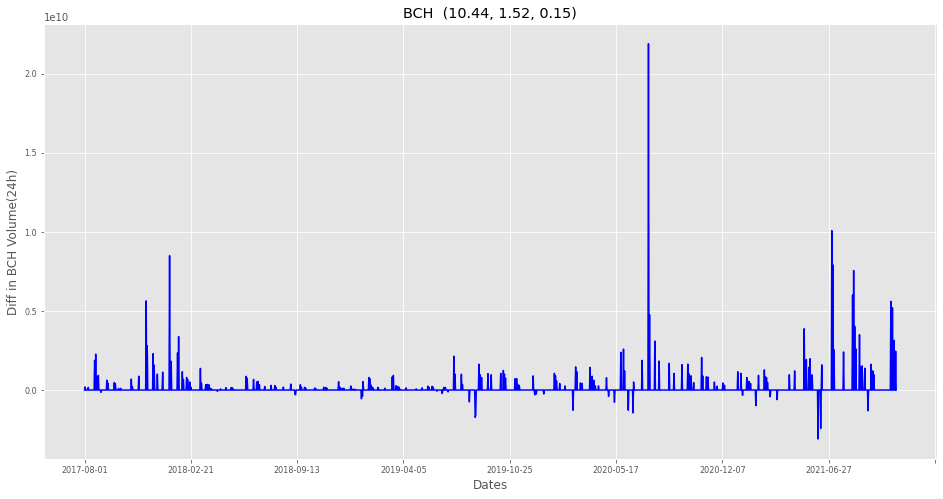

In [113]:


newsymbol = list(set(datasetnew["Symbol"]))
newsymbol
age = []
keys =[]
n =1000    
for ele in newsymbol:
    # for each crypto currency
    data = datasetnew.groupby(["Symbol"]).get_group("{}".format(ele)).iloc[:,:5].sort_index(axis=1)
    temp= []
    # for each column in the crypo
    for para in datasetnew.columns[0:4]:

        # Extract the name of the crypto and the number of days it has survived
        #age.append("{}:{}".format(ele,  len(data)))
        #If the length agrees with the length of the outliers and it has survived for n days
        if len(data)==len(outliers(data["{}".format(para)])[:len(data)]) and len(data)>n:

            data["outliers"] = outliers(data["{}".format(para)])[:len(data)]
            # Plot the outliers against the dates
        
            data.outliers.plot(figsize=(16, 8),color="blue", fontsize=8, title="{}  {}".format(ele.upper(), nonzero(outliers(data["outliers"]))), xlabel ="Dates",ylabel= "Diff in {} {}".format(ele, para))
            array.append("{}  {}".format(ele.upper(), nonzero(outliers(data["outliers"]))))
            plt.show()
           
            temp.append(nonzero(outliers(data["outliers"]))[0])
            temp.append(nonzero(outliers(data["outliers"]))[1])
            temp.append(nonzero(outliers(data["outliers"]))[2])
    
    #temp.append(int(data.index[0][:4]))
    #temp.append(int(data.index[len(data)-1][:4]))
    if len(temp) >= 10:
       
        temp.append(int(data.index[0][:4]))
        temp.append(int(data.index[len(data)-1][:4]))
        temp.append(len(data))
        keys.append("{}:{}".format(ele,  len(data)))
        age.append(temp)
        #print(ele, len(data))

#What is the average age? How many make it to 1000 days
    
    

In [102]:
#Summary
d = dict(zip(list(keys),list(age)))
new = pd.DataFrame.from_dict(d, orient ='index')
new = new.interpolate(method ='linear', limit_direction ='forward')
new.columns= ['pos_mcap', 'neg_nmcap', 'odd_mcap','pos_price', 'neg_price', 'odd_price','pos_csup', 'neg_csup', 'odd_csup','pos_vol', 'neg_vol', 'odd_vol','startyr', 'endyr', 'age']

new




pos_mcap  neg_nmcap  odd_mcap  pos_price  neg_price  odd_price  \
TRX:1264       9.33       5.38      0.58       3.59      10.38       2.89   
BNB:1566       6.73       8.22      1.22       6.73       8.10       1.20   
LTC:2254       8.00       6.29      0.79       8.08       6.16       0.76   
XEM:1279       9.23       6.53      0.71       5.19       8.23       1.59   
XMR:1842       8.18       7.43      0.91       7.86       7.21       0.92   
ADA:1753       7.89       7.73      0.98       5.76       8.66       1.50   
ETC:1327       9.43       5.46      0.58      10.04       5.43       0.54   
BTC:2380       6.67       8.55      1.28       6.71       8.39       1.25   
EOS:1254       8.27       7.03      0.85       8.74       6.55       0.75   
XLM:1753       9.13       6.33      0.69       4.47       8.78       1.96   
ETH:2380       7.65       8.23      1.08       7.68       8.11       1.06   
USDT:1841      4.47      10.85      2.43       4.56       2.70       0.59   
XRP:2380       9.37       6.02      0.64       4.88       9.40       1.93   
BCH:1528       8.56       5.81      0.68       8.62       5.75       0.67   

           pos_csup  neg_csup  odd_csup  pos_vol  neg_vol  odd_vol  startyr  \
TRX:1264       1.56      1.48      0.95     9.72     3.00     0.31     2017   
BNB:1566       1.51      1.26      0.83     9.59     2.37     0.25     2018   
LTC:2254       0.57      6.18     10.82     9.01     2.75     0.31     2016   
XEM:1279       0.16      0.00      0.00     9.62     0.99     0.10     2016   
XMR:1842       0.27      8.40     31.00     9.62     2.11     0.22     2016   
ADA:1753       0.74      2.44      3.29     9.78     1.75     0.18     2017   
ETC:1327       0.23      5.34     23.12    10.34     1.08     0.10     2016   
BTC:2380       0.63      7.73     12.25     8.43     2.77     0.33     2016   
EOS:1254       0.71      5.71      8.03     9.79     2.59     0.26     2017   
XLM:1753       1.85     11.54      6.23     9.92     1.65     0.17     2016   
ETH:2380       0.38      4.44     11.65     8.61     1.92     0.22     2016   
USDT:1841      4.07      9.91      2.43     8.41     3.24     0.39     2017   
XRP:2380       1.78     10.20      5.73     9.78     1.37     0.14     2016   
BCH:1528       0.59      6.38     10.80    10.44     1.52     0.15     2017   

           endyr   age  
TRX:1264    2022  1264  
BNB:1566    2022  1566  
LTC:2254    2022  2254  
XEM:1279    2021  1279  
XMR:1842    2021  1842  
ADA:1753    2022  1753  
ETC:1327    2022  1327  
BTC:2380    2022  2380  
EOS:1254    2021  1254  
XLM:1753    2021  1753  
ETH:2380    2022  2380  
USDT:1841   2022  1841  
XRP:2380    2022  2380  
BCH:1528    2021  1528

In [104]:
#What is the lifespan of a typical crypto:
np.mean(new["age"])

1771.5

In [111]:
#What is the averge odd a crypto that has survived over 1200 days. 
#Answer is 0.96

np.mean(new["odd_mcap"])

0.9585714285714285

In [114]:
What is the average odd for currencies that failed before 2022
np.mean(new[new["endyr"]<2022]["odd_mcap"])

0.768

In [116]:
surv = new[new["endyr"]>=2021]
np.mean(surv["pos_csup"])


1.075

In [118]:
 
# The averge lifespan of a crpto studied is 291 days and only 25 percent of the cryptos make it to this.
#print(np.mean(age))
#This number might be much lower in general considering that many of the cryptos didnt even make it to just a few days.



15

In [140]:

dv = df1.iloc[:,1:]


dv.groupby("Symbol").get_group("BTC")["Price"][dv.groupby("Symbol").get_group("BTC")["Price"] == dv.groupby("Symbol").get_group("BTC")["Price"].max()]

Date
2021-11-08    67566.83
Name: Price, dtype: float64

In [152]:
#The maximum volume of Bitcoin 3.509679e+11 was attained on 2021-02-26
dv1 = dfo.iloc[:,:]
dv1.index =dv1["Date"]

dv1.groupby("Symbol").get_group("BTC")["Volume"][dv1.groupby("Symbol").get_group("BTC")["Volume"] == dv1.groupby("Symbol").get_group("BTC")["Volume"].max()]

Date
2021-02-26    3.509679e+11
Name: Volume, dtype: float64

In [153]:
#The maximum price of Bitcoin $68789.625 was attained on 2021-11-10
#dv1 = dfo.iloc[:,:]
#dv1.index =dv1["Date"]

dv1.groupby("Symbol").get_group("BTC")["High"][dv1.groupby("Symbol").get_group("BTC")["High"] == dv1.groupby("Symbol").get_group("BTC")["High"].max()]

Date
2021-11-10    68789.625
Name: High, dtype: float64

In [154]:
# An unusual peak was noticed the graph on this date 2021-02-26
#This corresponds to the highest volume ever traded. Detail of this can be found here <https://fortune.com/2021/02/26/bitcoin-price-dropping-down/>
# according to the article The bearish grip in the crypto market has led to heavy losses of crypto investors’ funds at the wrong side of the current trade, as roughly $120 billion worth of crypto assets evaporated into thin air within a day.

#The flagship crypto that surged to a record price level of over $58,000 last weekend has now depreciated by over $11,000, as the present price shows that it trades around the $46,800 price level.
#dv1 = dfo.iloc[:,:]
#dv1.index =dv1["Date"]

dv1.groupby("Symbol").get_group("BTC")["Volume"][dv1.groupby("Symbol").get_group("BTC")["Volume"] == dv1.groupby("Symbol").get_group("BTC")["Volume"].max()]

Date
2021-02-26    3.509679e+11
Name: Volume, dtype: float64

In [ ]:
 # For further study: What is behind. the sharp drop in the prices.How does a drop in bitcoin affect the drop in the market proportionatedly
#2018
#What is the effect of chinese policy on bitcoin
#Binance frezing of bitcoin wallets
#What is behind the sudden fluctuations in the prices in recent days?

In [ ]:
# Web scraping files

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup



df =pd.DataFrame(columns=['Date', 'Name', 'Market Cap', 'Price', 'Circulating Suppy', 'Volume(24h)', "%h", "%7d","%24h" 'Symbol'])
#number=20
date_=[]
number = 20

#for x in range(1, 2):
    #for y in range(1,3):
        #date_.append("20210{}0{}".format(x,y))
#print(type(date_))
# Web scrapinf file
import datetime
date1 = datetime.date(2016, 1, 1)
date2 = datetime.date(2022, 8, 19)
#date_= []
for i in range(int((date2-date1).days)):
    date1 += datetime.timedelta(days=1)
    date_.append((str(date1)[:4]+str(date1)[5:7]+str(date1)[8:10]))
print(date_)



for date in date_:
    def scrape(date, number=20):
        # StoringInfo variables
        name =[]
        marketCap=[]
        price=[]
        circulatingSupply=[]
        circulatingSupply1=[]
        circulatingSupply2=[]
        circulatingSupply3= []
        circulatingSupply4 = []
        symbol = []
        # URL to scrape
        url = 'https://coinmarketcap.com/historical/' + date
        # Request a website

        webpage = requests.get(url)

        # parse the text
        soup = BeautifulSoup(webpage.text, 'html.parser')

        # Get table row element
        tr = soup.find_all('tr', attrs={'class': 'cmc-table-row'})

        count = 0

        for row in tr:

            if count == number:
                break
            else:
                count += 1

                # Store name of the crypto currency

                name_col = row.find('td', attrs={
                    'class': 'cmc-table__cell cmc-table__cell--sticky cmc-table__cell--sortable cmc-table__cell--left cmc-table__cell--sort-by__name'})

                cryptoname = name_col.find('a', attrs={'class': 'cmc-table__column-name--name cmc-link'}).text.strip()

                # Market cap
                marketcap = row.find('td', attrs={
                    'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__market-cap'}).text.strip()

                # Price
                crytoprice = row.find('td', attrs={
                    'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__price'}).text.strip()

                # Circulating supply and symbol
                circulatingSupplySymbol = row.find('td', attrs={
                    'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__circulating-supply'}).text.strip()
                circulatingSupplySymbol1 = row.find('td', attrs={
                    'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__volume-24-h'}).text.strip()
                circulatingSupplySymbol2 = row.find('td', attrs={
                    'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-1-h'}).text.strip()
                circulatingSupplySymbol3 = row.find('td', attrs={
                    'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-24-h'}).text.strip()
                circulatingSupplySymbol4 = row.find('td', attrs={
                    'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-7-d'}).text.strip()

                supply = circulatingSupplySymbol.split(' ')[0]
                supply1 = circulatingSupplySymbol1.split(' ')[0]
                supply2 = circulatingSupplySymbol2.split(' ')[0]
                supply3 = circulatingSupplySymbol3.split(' ')[0]
                supply4 = circulatingSupplySymbol4.split(' ')[0]
                sym = circulatingSupplySymbol.split(' ')[1]
                # append the data
                name.append(cryptoname)
                marketCap.append(marketcap)
                price.append(crytoprice)
                circulatingSupply.append(supply)
                circulatingSupply1.append(supply1)
                circulatingSupply2.append(supply2)
                circulatingSupply3.append(supply3)
                circulatingSupply4.append(supply4)
                symbol.append(sym)
        return name, list(map(lambda x: float("".join(x[1:].split(","))), marketCap)), list(map(lambda x: float("".join(x[1:].split(","))), price)), list(map(lambda x: float("".join(x[1:].split(","))), circulatingSupply)), list(map(lambda x: float("".join(x[1:].split(","))), circulatingSupply1)), list(map(lambda x: float("".join(x[:-2].split(","))), circulatingSupply2)), list(map(lambda x: float("".join(x[:-2].split(","))), circulatingSupply3)), list(map(lambda x: float("".join(x[:-2].split(","))), circulatingSupply4)), symbol


        # Scraping
    name, marketCap, price, circulatingSupply, circulatingSupply1, circulatingSupply2, circulatingSupply3, circulatingSupply4, symbol = scrape(date, number)



    df1=pd.DataFrame()

    df1['Date'] = [date]*number
    df1['Name'] = name
    df1['Market Cap'] = marketCap
    df1['Price'] = price
    df1['Circulating Suppy'] = circulatingSupply
    df1['Volume(24h)'] = circulatingSupply1
    df1['%h'] = circulatingSupply2
    df1['%24h'] = circulatingSupply3
    df1['7d'] = circulatingSupply4
    df1['Symbol'] = symbol
    df=pd.concat([df, df1], axis=0)
    print(df1)
print(df)

df.to_csv("PythonProjectAgain1.csv")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import pandas_datareader as web
import datetime as dt


crypto_currency ="BTC"
against_currency ="USD"


start = dt.datetime(2016,1,1)
end = dt.datetime.now()


data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo',start, end )


# Prepare Date
#print(data)

scalar =MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data["Close"].values.reshape(-1, 1))

prediction_days = 60
 #predict future 30 days
 #future_day = 30
#x_train, y_train = [], []
#for x in range(prediction_days, len(scaled_data)):
    #x_train.append(scaled_data[x-prediction_days: x,0])
    #y_train.append(scaled_data[x+future_day,0])





x_train, y_train = [], []
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days: x,0])
    y_train.append(scaled_data[x,0])



x_train, y_train = np.array(x_train, np.array(y_train))



x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))




#create Neural network
#pip install numpy 1.19.5 if issues with numpy
model =Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(s_train.shape[1], 1)))
model.add(LSTM(Dropout(0,2)))
model.add(LSTM(units=50, return_sequence=True))
model.add(Dropout(0,2))
model.add(LSTM(units=50))
models.add(Dropout(0,2))
model.add(Dense(units=1))


model.compile(optimizer = "adam", loss= "mean_squared_error" )

model.fit(x_train, y_train, epochs=25, batch_size=32 )


#Testing the Model


test_start = dt.datetime(2022,7,28)
test_end = dt.datetime(2022,7,30)
actual_prices = test_data["Close"].values


total_dataset=pd.concat((data["Close"], test_data[close]), axis=0)

model_inputs =total_dataset[len(total_dataset)-len(test_data)].values

model_inputs = model_inputs.reshape(-1,1)
model_input = scaler.fit_transform(model_inputs)


x_test = []

for x in range(prediction_days, len(model_input)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test =np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
prediction_prices= model.predict(x_test)

prediction_prices= scaler.inverse_transform(prediction_prices)



# Visualisation

plt.plot(actual_prices, color="black", label="Actual Prices" )
plt.plot(predicted_prices, color="green", label="Predicted Prices" )
plt.title(f'{cryptocurrency} price prediction')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.show()













#Predict Next Day


real_data = [model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs)+1, 0]]
real_data=np.array(real_data)
real_data=np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))
real_data=np.reshape(real_data, (real.data.shape[0], real_data.shape[1],1))
prediction = scaler.inverse_transform(prediction)
#print(prediction)






























#import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize =(16,8))
plt.title("Closing Stock Prices")
plt.plot(df["nClose"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD($)",fontsize=18)
plt.show()











In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup



df =pd.DataFrame(columns=['Date', 'Name', 'Market Cap', 'Price', 'Circulating Suppy', 'Volume(24h)', "%h", "%7d","%24h" 'Symbol'])
#number=20
date_=[]
number = 20

#for x in range(1, 2):
    #for y in range(1,3):
        #date_.append("20210{}0{}".format(x,y))
#print(type(date_))
# Web scrapinf file
import datetime
date1 = datetime.date(2021, 1, 1)
date2 = datetime.date(2021, 12, 31)
#date_= []
for i in range(int((date2-date1).days)):
    date1 += datetime.timedelta(days=1)
    date_.append((str(date1)[:4]+str(date1)[5:7]+str(date1)[8:10]))
#print(date_)



for date in date_:
    def scrape(date, number=20):
        # StoringInfo variables
        name =[]
        marketCap=[]
        price=[]
        circulatingSupply=[]
        circulatingSupply1=[]
        circulatingSupply2=[]
        circulatingSupply3= []
        circulatingSupply4 = []
        symbol = []
        # URL to scrape
        url = 'https://coinmarketcap.com/historical/' + date
        # Request a website

        webpage = requests.get(url)

        # parse the text
        soup = BeautifulSoup(webpage.text, 'html.parser')

        # Get table row element
        tr = soup.find_all('tr', attrs={'class': 'cmc-table-row'})

        count = 0

        for row in tr:

            if count == number:
                break
            else:
                count += 1

                # Store name of the crypto currency

                name_col = row.find('td', attrs={
                    'class': 'cmc-table__cell cmc-table__cell--sticky cmc-table__cell--sortable cmc-table__cell--left cmc-table__cell--sort-by__name'})

                cryptoname = name_col.find('a', attrs={'class': 'cmc-table__column-name--name cmc-link'}).text.strip()

                # Market cap
                marketcap = row.find('td', attrs={
                    'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__market-cap'}).text.strip()

                # Price
                crytoprice = row.find('td', attrs={
                    'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__price'}).text.strip()

                # Circulating supply and symbol
                circulatingSupplySymbol = row.find('td', attrs={
                    'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__circulating-supply'}).text.strip()
                circulatingSupplySymbol1 = row.find('td', attrs={
                    'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__volume-24-h'}).text.strip()
                circulatingSupplySymbol2 = row.find('td', attrs={
                    'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-1-h'}).text.strip()
                circulatingSupplySymbol3 = row.find('td', attrs={
                    'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-24-h'}).text.strip()
                circulatingSupplySymbol4 = row.find('td', attrs={
                    'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-7-d'}).text.strip()

                supply = circulatingSupplySymbol.split(' ')[0]
                supply1 = circulatingSupplySymbol1.split(' ')[0]
                supply2 = circulatingSupplySymbol2.split(' ')[0]
                supply3 = circulatingSupplySymbol3.split(' ')[0]
                supply4 = circulatingSupplySymbol4.split(' ')[0]
                sym = circulatingSupplySymbol.split(' ')[1]
                # append the data
                name.append(cryptoname)
                marketCap.append(marketcap)
                price.append(crytoprice)
                circulatingSupply.append(supply)
                circulatingSupply1.append(supply1)
                circulatingSupply2.append(supply2)
                circulatingSupply3.append(supply3)
                circulatingSupply4.append(supply4)
                symbol.append(sym)
        return name, list(map(lambda x: float("".join(x[1:].split(","))), marketCap)), list(map(lambda x: float("".join(x[1:].split(","))), price)), list(map(lambda x: float("".join(x[1:].split(","))), circulatingSupply)), list(map(lambda x: float("".join(x[1:].split(","))), circulatingSupply1)), list(map(lambda x: float("".join(x[:-2].split(","))), circulatingSupply2)), list(map(lambda x: float("".join(x[:-2].split(","))), circulatingSupply3)), list(map(lambda x: float("".join(x[:-2].split(","))), circulatingSupply4)), symbol


        # Scraping
    name, marketCap, price, circulatingSupply, circulatingSupply1, circulatingSupply2, circulatingSupply3, circulatingSupply4, symbol = scrape(date, number)



    df1=pd.DataFrame()
    df1['Date'] = [date]*number
    df1['Name'] = name
    df1['Market Cap'] = marketCap
    df1['Price'] = price
    df1['Circulating Suppy'] = circulatingSupply
    df1['Volume(24h)'] = circulatingSupply1
    df1['%h'] = circulatingSupply2
    df1['%24h'] = circulatingSupply3
    df1['7d'] = circulatingSupply4
    df1['Symbol'] = symbol
    df=pd.concat([df, df1], axis=0)
print(df)

df.to_csv("ProjectCoi.csv")


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import sklearn
#import tensorflow


import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
#from tensorflow.keras.layers import Dense, Dropout, LSTM
#from tensorflow.keras.models import Sequential

df = pd.read_csv("PythonProject1.csv")



lst  =["BTC", "ETH",  'PAXG', "USDT","USDC", "BNB","BUSD", "XRP", "ADA" ,"SOL", "DOGE", "DOT", "DAI", "MATIC", "SHIB", "AVAX","TRX", "UNI", "WBTC", "LEO", "ETC", "LTC", "FTT", "CRO", "LINK", "NEAR"  ]

dfnew =pd.DataFrame(columns=['Date', 'High', 'Low', 'Open', 'Close', 'Volume', "Adj Close", "Symbol"])
dfnew.set_index("Date", inplace=True)

def zero_division(n, d):
    return n / d if d else 0

for i in range(len(lst)):

    crypto_currency =f"{lst[i]}"
    against_currency ="USD"


    start = dt.datetime(2015,1,1)
    end = dt.datetime.now()



    data = pd.DataFrame(web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo',start, end )).sort_values(by=["Date"])
    dfnew = pd.concat([dfnew, data], axis = 0)
    dfnew["nVolume"]= list(map(lambda x: x/dfnew["Volume"].max(),  dfnew["Volume"]))
    dfnew["nHigh"]=list(map(lambda x: x/dfnew["High"].max(), list(dfnew["High"])))
    dfnew["nLow"] = list(map(lambda x: x / dfnew["Low"].max(), list(dfnew["Low"])))
    dfnew["nClose"] = list(map(lambda x: x / dfnew["Close"].max(), list(dfnew["Close"])))
    dfnew["nOpen"] = list(map(lambda x: x / dfnew["Open"].max(), list(dfnew["Open"])))
    dfnew["%Change_Per_Day"] = list(map(lambda x,y: 100* zero_division((x-y), x),  dfnew["Open"], dfnew["Close"]))
    dfnew['Symbol'].fillna(f"{lst[i]}", inplace=True)

print(dfnew)

dfnew.to_csv("PythonProjectYahoo1.csv")











